In [1]:
## importing relevant libraries
from utils_fn import ClassificationAnalysis, visualise_decision_trees
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# importing modules that we will use to identify which classification algorithm the best.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

## hyper-parameter tuning/ model improvements


in this file we will test tuning hyper-parameters of 2 models in particular


- randomforest
- neural networks


We will firstly train the models without tuning any hyperparameters and eximamine the output byt looking at the precision score, confusion maxtrix and  ROC/AUC curve to examine the models relative performance.

For consistency/reproducibility I will set the random state to be 22.


### Outline for the notebook:

#### * [Training/predicting RandomForestClassifier by tuning parameters](#rfc)


#### * [Training/predicting Neural Networks by tuning hyperpatameters](#mlp_clf)
- [training a base MLPclassifier with scaled data](#scaled_mlp_clf)
- [training a hyper-parameter tuned MLPclassifier with scaled data](#scaled_tuned_mlp_clf)

In [61]:
# loading the data and splitting data
df = pd.read_csv('resampled-diabetes.csv')
X = df.loc[:, 'pregnancies':'age']
y = df.loc[:, 'outcome']

# splitting data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## loading validation data

this is the data that will not be used in the training data. It will acts as a hold out set of data to validate if the hyper-parameter tuning has made a tangible difference 

In [7]:
validation_data = pd.read_csv('validation-diabetes.csv').loc[:, 'pregnancies':]
validation_data

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,1,144,82,40,0,41.300000,0.607000,28,0
1,1,0,74,20,23,27.700000,0.299000,21,0
2,0,94,70,27,115,43.500000,0.347000,21,0
3,1,111,86,19,0,30.100000,0.143000,23,0
4,2,83,66,23,50,32.200000,0.497000,22,0
5,2,84,50,23,76,30.400000,0.968000,21,0
6,1,140,74,26,180,24.100000,0.828000,23,0
7,4,123,80,15,176,32.000000,0.443000,34,0
8,8,74,70,40,49,35.300000,0.705000,39,0
9,11,141,80,41,325,38.824555,0.509329,55,1


## Training/predicting RandomForestModels by tuning hyperpatameters<a id='rfc'></a>

In [4]:
# keeping random
rfc=RandomForestClassifier(random_state=22)

param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



grid_search = GridSearchCV(estimator=rfc,param_grid=param_grid,
                           scoring='recall', refit='f1_score',
                           cv=5, verbose=4)
GridSearchModel = grid_search.fit(X_train, y_train)

# extracting parameters that resulted in the highest score in a fold of data
tuned_rfc = RandomForestClassifier(criterion='gini', max_depth=7, min_samples_split=5, min_samples_leaf=2,
                                   random_state=42)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.732 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.875 total time=   0.0s
[CV 3/5] E

[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.732 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.875 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_sampl

[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.821 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.804 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.764 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.875 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=4, 

[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.875 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.857 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.821 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.768 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_sam

[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.782 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.875 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.875 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.821 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.750 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_sam

[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.768 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.818 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=2, min_sa

[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.768 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.800 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.821 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.786 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.800 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_

[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.857 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.786 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.800 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.875 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.839 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.875 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.804 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=1, min

[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.839 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.821 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.804 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.875 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.839 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=4, min_sam

[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.727 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.875 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.804 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.696 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=3, min

[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.727 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.875 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.804 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.714 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.727 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3

[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.839 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.875 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.804 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.750 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.764 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.821 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.839 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_s

[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.857 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.804 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.750 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.764 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.821 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.839 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.821 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min

[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.821 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.750 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.782 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.875 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.804 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_

[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.839 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.800 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.821 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.839 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.821 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.818 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samp

[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.800 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.821 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.821 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=7, mi

[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.821 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.821 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.839 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=9, min_sa

[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.821 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.821 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.839 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.857 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.839 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=9, min

[CV 1/5] END criterion=log_loss, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.786 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.875 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.768 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.727 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.875 total time=   0.2s
[CV 3/5] END criterion=log_loss, m

[CV 1/5] END criterion=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.804 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.768 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.727 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.875 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_dept

[CV 1/5] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.857 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.804 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.782 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.857 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.857 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_dept

[CV 1/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.857 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.839 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.821 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.839 total time=   0.3s
[CV 2/5] END criterion=log_loss, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.2s
[CV 3/5] END criterion=log_loss, m

[CV 1/5] END criterion=log_loss, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.821 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.836 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.875 total time=   0.3s
[CV 2/5] END criterion=log_loss, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.857 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_dept

[CV 1/5] END criterion=log_loss, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.821 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.875 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.821 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.839 total time=   0.3s
[CV 2/5] END criterion=log_loss, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.857 total time=   0.3s
[CV 3/5] END criterion=log_loss, max_dept

[CV 1/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.839 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.839 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.782 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.2s
[CV 3/5] END criterion=log_loss, m

[CV 1/5] END criterion=log_loss, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.821 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.839 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.873 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.893 total time=   0.3s
[CV 2/5] END criterion=log_loss, max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.821 total time=   0.3s
[CV 3/5] END criterion=log_loss, max_dept

[CV 1/5] END criterion=log_loss, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.839 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.821 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.821 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.839 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.857 total time=   0.3s
[CV 2/5] END criterion=log_loss, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.839 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_dept

In [7]:
tuned_rfc_analysis = ClassificationAnalysis(X_test, y_test, tuned_rfc.fit(X_train, y_train), 
                       'tuned_random_forest_classifier')

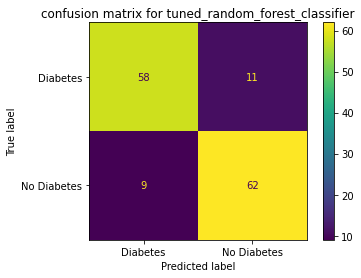

area under curve for tuned_random_forest_classifier is 0.8569095733823229


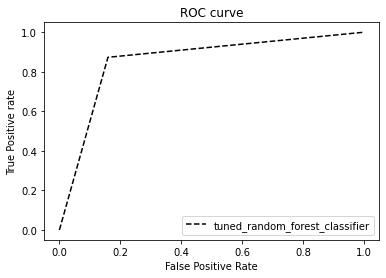

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        69
           1       0.85      0.87      0.86        71

    accuracy                           0.86       140
   macro avg       0.86      0.86      0.86       140
weighted avg       0.86      0.86      0.86       140



'precision score 0.8493150684931506  recall score 0.8732394366197183'

In [9]:
tuned_rfc_analysis.visualise_confusion_matrix()
tuned_rfc_analysis.reciever_operator_curve()
tuned_rfc_analysis.metrics()

In [17]:
tuned_rfc_analysis.incorrect_model_probabilities()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,actual_outcome,predicted_outcome,prediction_prob
11,5,136,84,41,88,35.000000,0.286000,35,1,0,"[0.6011903951853977, 0.3988096048146022]"
38,0,165,76,43,255,47.900000,0.259000,26,0,1,"[0.32709989051264826, 0.6729001094873515]"
40,2,128,64,42,0,40.000000,1.101000,24,0,1,"[0.2744548586771309, 0.7255451413228695]"
51,0,105,63,34,67,34.755293,0.605119,23,1,0,"[0.5658041233897212, 0.43419587661027853]"
57,7,179,95,31,0,34.200000,0.164000,60,0,1,"[0.31068676713310167, 0.6893132328668983]"
75,5,0,80,32,0,41.000000,0.346000,37,1,0,"[0.5342052913959191, 0.46579470860408095]"
80,2,90,58,25,89,32.057922,0.592660,27,1,0,"[0.725933101477715, 0.27406689852228505]"
81,3,163,70,18,105,31.600000,0.268000,28,1,0,"[0.5256785825547649, 0.4743214174452352]"
83,8,105,100,36,0,43.300000,0.239000,45,1,0,"[0.6238764119157594, 0.3761235880842408]"
107,8,126,88,36,108,38.500000,0.349000,49,0,1,"[0.3742185513918184, 0.6257814486081816]"


When looking at the incorrect model probababilites, for a few of the prediction the probabilities are relative close in terms of the outcome (index: 81, 119, 122 to name a few)


Minor improvement in performance when looking at accuracy and precision when compared to baseline model. This can be seen in the confusion matrix where there noew is a minor increase in TP and decrease FP. 

The number of FN/TP has not changed however. Finally lets test both models on the validation set of data we held onto from the pre-processing stage

In [15]:
# fiting the baseline model with the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=22)

In [16]:
validation_data['baseline_rfc'] = list(rfc.predict(validation_data.loc[:, 'pregnancies': 'age']))
validation_data['tuned_rfc'] = list(tuned_rfc.predict(validation_data.loc[:, 'pregnancies': 'age']))

validation_data

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,baseline_rfc,tuned_rfc
0,1,144,82,40,0,41.300000,0.607000,28,0,1,1
1,1,0,74,20,23,27.700000,0.299000,21,0,0,0
2,0,94,70,27,115,43.500000,0.347000,21,0,0,0
3,1,111,86,19,0,30.100000,0.143000,23,0,0,0
4,2,83,66,23,50,32.200000,0.497000,22,0,0,0
5,2,84,50,23,76,30.400000,0.968000,21,0,0,0
6,1,140,74,26,180,24.100000,0.828000,23,0,0,0
7,4,123,80,15,176,32.000000,0.443000,34,0,1,1
8,8,74,70,40,49,35.300000,0.705000,39,0,0,0
9,11,141,80,41,325,38.824555,0.509329,55,1,1,1


when looking at the holdout set, that we have. While the performance of the model improved on the training data and we saw a minor benefit on the testing data. When we trained both the baseline model and tuned model, they both predicted the same outcomes. This suggests that there is not much performance benefit to tuning the model

## Training/predicting Neural Networks by tuning hyperpatameters<a id='mlp_clf'></a>

There are many hyper-parameters that you can tune for the MLPClassifer, below are some examples:

- hidden_layer_sizes
- activation
- solver
- learning_rate_init
- max_iter
- early_stopp

Initally I want to tune, learning_rate_init and test different learning rates as well as look at altering number of iterationa and set early stopping as True since that would prevent overfitting data

Finally once we have used parameter tuning to identify the ideal model, I will train on the validation data that I generated to test wheether there has been an tangible performance benefit in hyperparameter tuning.

We will use recall as our scoring method within our gridsearch since that will allow as to find a model that reduces false negatives where possible

In [26]:
param_grid = {
    'hidden_layer_sizes': [(50,), (50,50), (100,100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive']
#     'learning_rate_init': [0.0001, 0.001, 0.01],
#     'max_iter': [100,1000, 2000],
}

mlp_clf = MLPClassifier(random_state=22, verbose=True)


grid_search = GridSearchCV(estimator=mlp_clf,param_grid=param_grid,
#                            scoring='recall', refit='f1_score',
                           cv=5, verbose=4)
GridSearchModel = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Iteration 1, loss = 0.77594026
Iteration 2, loss = 0.76763652
Iteration 3, loss = 0.75533113
Iteration 4, loss = 0.74148192
Iteration 5, loss = 0.72752789
Iteration 6, loss = 0.71613053
Iteration 7, loss = 0.70605548
Iteration 8, loss = 0.69828647
Iteration 9, loss = 0.69182540
Iteration 10, loss = 0.68576520
Iteration 11, loss = 0.68189853
Iteration 12, loss = 0.67957826
Iteration 13, loss = 0.67774908
Iteration 14, loss = 0.67593401
Iteration 15, loss = 0.67451156
Iteration 16, loss = 0.67315632
Iteration 17, loss = 0.67126170
Iteration 18, loss = 0.66954789
Iteration 19, loss = 0.66799687
Iteration 20, loss = 0.66655215
Iteration 21, loss = 0.66477564
Iteration 22, loss = 0.66367027
Iteration 23, loss = 0.66248257
Iteration 24, loss = 0.66164360
Iteration 25, loss = 0.66081655
Iteration 26, loss = 0.65993577
Iteration 27, loss = 0.65917101
Iteration 28, loss = 0.65817794
Iteration 29, loss = 0.65724152
Iteration 30, loss 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.64804385
Iteration 46, loss = 0.64750286
Iteration 47, loss = 0.64696212
Iteration 48, loss = 0.64643898
Iteration 49, loss = 0.64600237
Iteration 50, loss = 0.64555930
Iteration 51, loss = 0.64520162
Iteration 52, loss = 0.64496980
Iteration 53, loss = 0.64459608
Iteration 54, loss = 0.64413455
Iteration 55, loss = 0.64378104
Iteration 56, loss = 0.64322551
Iteration 57, loss = 0.64289889
Iteration 58, loss = 0.64250301
Iteration 59, loss = 0.64215889
Iteration 60, loss = 0.64188164
Iteration 61, loss = 0.64161261
Iteration 62, loss = 0.64116842
Iteration 63, loss = 0.64088235
Iteration 64, loss = 0.64051776
Iteration 65, loss = 0.64022369
Iteration 66, loss = 0.63985841
Iteration 67, loss = 0.63955685
Iteration 68, loss = 0.63912117
Iteration 69, loss = 0.63876428
Iteration 70, loss = 0.63844400
Iteration 71, loss = 0.63803717
Iteration 72, loss = 0.63787936
Iteration 73, loss = 0.63776807
Iteration 74, loss = 0.63708624
Iteration 75, loss = 0.63664632
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.76090124
Iteration 3, loss = 0.75108711
Iteration 4, loss = 0.73987966
Iteration 5, loss = 0.72905303
Iteration 6, loss = 0.71879337
Iteration 7, loss = 0.70885037
Iteration 8, loss = 0.69949042
Iteration 9, loss = 0.69288297
Iteration 10, loss = 0.68717503
Iteration 11, loss = 0.68321232
Iteration 12, loss = 0.67936652
Iteration 13, loss = 0.67703069
Iteration 14, loss = 0.67542935
Iteration 15, loss = 0.67441171
Iteration 16, loss = 0.67410347
Iteration 17, loss = 0.67302384
Iteration 18, loss = 0.67168285
Iteration 19, loss = 0.67023326
Iteration 20, loss = 0.66875113
Iteration 21, loss = 0.66721634
Iteration 22, loss = 0.66662973
Iteration 23, loss = 0.66582675
Iteration 24, loss = 0.66475135
Iteration 25, loss = 0.66393262
Iteration 26, loss = 0.66297136
Iteration 27, loss = 0.66222025
Iteration 28, loss = 0.66136169
Iteration 29, loss = 0.66067647
Iteration 30, loss = 0.65968547
Iteration 31, loss = 0.65892543
Iteration 32, loss = 0.65794666
Iteration 33, lo

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 0.65928383
Iteration 35, loss = 0.65851080
Iteration 36, loss = 0.65786295
Iteration 37, loss = 0.65703341
Iteration 38, loss = 0.65640025
Iteration 39, loss = 0.65566244
Iteration 40, loss = 0.65501847
Iteration 41, loss = 0.65455379
Iteration 42, loss = 0.65382612
Iteration 43, loss = 0.65316154
Iteration 44, loss = 0.65255774
Iteration 45, loss = 0.65209135
Iteration 46, loss = 0.65168557
Iteration 47, loss = 0.65115736
Iteration 48, loss = 0.65078643
Iteration 49, loss = 0.65053077
Iteration 50, loss = 0.65014181
Iteration 51, loss = 0.64971404
Iteration 52, loss = 0.64943583
Iteration 53, loss = 0.64903352
Iteration 54, loss = 0.64870323
Iteration 55, loss = 0.64858314
Iteration 56, loss = 0.64829964
Iteration 57, loss = 0.64790369
Iteration 58, loss = 0.64756491
Iteration 59, loss = 0.64717574
Iteration 60, loss = 0.64685654
Iteration 61, loss = 0.64672490
Iteration 62, loss = 0.64602704
Iteration 63, loss = 0.64585847
Iteration 64, loss = 0.64546748
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.67271138
Iteration 19, loss = 0.67155255
Iteration 20, loss = 0.67045646
Iteration 21, loss = 0.66952474
Iteration 22, loss = 0.66899736
Iteration 23, loss = 0.66785954
Iteration 24, loss = 0.66694329
Iteration 25, loss = 0.66613299
Iteration 26, loss = 0.66535083
Iteration 27, loss = 0.66463607
Iteration 28, loss = 0.66370914
Iteration 29, loss = 0.66301162
Iteration 30, loss = 0.66239713
Iteration 31, loss = 0.66168293
Iteration 32, loss = 0.66098354
Iteration 33, loss = 0.66025829
Iteration 34, loss = 0.65956277
Iteration 35, loss = 0.65883975
Iteration 36, loss = 0.65826490
Iteration 37, loss = 0.65758821
Iteration 38, loss = 0.65693605
Iteration 39, loss = 0.65635322
Iteration 40, loss = 0.65554551
Iteration 41, loss = 0.65493295
Iteration 42, loss = 0.65447093
Iteration 43, loss = 0.65393731
Iteration 44, loss = 0.65328038
Iteration 45, loss = 0.65277559
Iteration 46, loss = 0.65230930
Iteration 47, loss = 0.65173722
Iteration 48, loss = 0.65138231
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 0.61537925
Iteration 44, loss = 0.61415530
Iteration 45, loss = 0.61271821
Iteration 46, loss = 0.61139319
Iteration 47, loss = 0.61040874
Iteration 48, loss = 0.60942505
Iteration 49, loss = 0.60860669
Iteration 50, loss = 0.60731978
Iteration 51, loss = 0.60605042
Iteration 52, loss = 0.60436550
Iteration 53, loss = 0.60183014
Iteration 54, loss = 0.60052720
Iteration 55, loss = 0.59933502
Iteration 56, loss = 0.59769684
Iteration 57, loss = 0.59657201
Iteration 58, loss = 0.59566057
Iteration 59, loss = 0.59415051
Iteration 60, loss = 0.59428897
Iteration 61, loss = 0.59499379
Iteration 62, loss = 0.59172663
Iteration 63, loss = 0.59060754
Iteration 64, loss = 0.58945934
Iteration 65, loss = 0.58812863
Iteration 66, loss = 0.58766614
Iteration 67, loss = 0.58659948
Iteration 68, loss = 0.58567805
Iteration 69, loss = 0.58509137
Iteration 70, loss = 0.58449767
Iteration 71, loss = 0.58340962
Iteration 72, loss = 0.58305661
Iteration 73, loss = 0.58201022
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.74200186
Iteration 3, loss = 0.72347924
Iteration 4, loss = 0.70680601
Iteration 5, loss = 0.69337847
Iteration 6, loss = 0.68262501
Iteration 7, loss = 0.67492861
Iteration 8, loss = 0.66899001
Iteration 9, loss = 0.66467611
Iteration 10, loss = 0.66105363
Iteration 11, loss = 0.65926997
Iteration 12, loss = 0.65756481
Iteration 13, loss = 0.65589061
Iteration 14, loss = 0.65422072
Iteration 15, loss = 0.65206191
Iteration 16, loss = 0.65047320
Iteration 17, loss = 0.64871724
Iteration 18, loss = 0.64683587
Iteration 19, loss = 0.64546301
Iteration 20, loss = 0.64430389
Iteration 21, loss = 0.64288914
Iteration 22, loss = 0.64207366
Iteration 23, loss = 0.64082191
Iteration 24, loss = 0.63951310
Iteration 25, loss = 0.63821744
Iteration 26, loss = 0.63677477
Iteration 27, loss = 0.63509998
Iteration 28, loss = 0.63328751
Iteration 29, loss = 0.63179849
Iteration 30, loss = 0.63090272
Iteration 31, loss = 0.62922008
Iteration 32, loss = 0.62763766
Iteration 33, lo

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.64241484
Iteration 26, loss = 0.64122681
Iteration 27, loss = 0.64041835
Iteration 28, loss = 0.63894636
Iteration 29, loss = 0.63788360
Iteration 30, loss = 0.63692923
Iteration 31, loss = 0.63609536
Iteration 32, loss = 0.63470982
Iteration 33, loss = 0.63362652
Iteration 34, loss = 0.63245852
Iteration 35, loss = 0.63168619
Iteration 36, loss = 0.63124467
Iteration 37, loss = 0.63028688
Iteration 38, loss = 0.62877123
Iteration 39, loss = 0.62780007
Iteration 40, loss = 0.62761008
Iteration 41, loss = 0.62688388
Iteration 42, loss = 0.62531499
Iteration 43, loss = 0.62344881
Iteration 44, loss = 0.62352622
Iteration 45, loss = 0.62261968
Iteration 46, loss = 0.62086467
Iteration 47, loss = 0.62012928
Iteration 48, loss = 0.61926297
Iteration 49, loss = 0.61820240
Iteration 50, loss = 0.61755402
Iteration 51, loss = 0.61712855
Iteration 52, loss = 0.61675290
Iteration 53, loss = 0.61576968
Iteration 54, loss = 0.61454465
Iteration 55, loss = 0.61374866
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 0.62356269
Iteration 40, loss = 0.62227490
Iteration 41, loss = 0.62075909
Iteration 42, loss = 0.61945116
Iteration 43, loss = 0.61814764
Iteration 44, loss = 0.61736123
Iteration 45, loss = 0.61622353
Iteration 46, loss = 0.61487086
Iteration 47, loss = 0.61389199
Iteration 48, loss = 0.61257566
Iteration 49, loss = 0.61232204
Iteration 50, loss = 0.61149336
Iteration 51, loss = 0.60994700
Iteration 52, loss = 0.60905380
Iteration 53, loss = 0.60850718
Iteration 54, loss = 0.60748464
Iteration 55, loss = 0.60655280
Iteration 56, loss = 0.60678548
Iteration 57, loss = 0.60629767
Iteration 58, loss = 0.60429182
Iteration 59, loss = 0.60314595
Iteration 60, loss = 0.60333997
Iteration 61, loss = 0.60261332
Iteration 62, loss = 0.60067882
Iteration 63, loss = 0.60086242
Iteration 64, loss = 0.60034251
Iteration 65, loss = 0.59926429
Iteration 66, loss = 0.59830961
Iteration 67, loss = 0.59719125
Iteration 68, loss = 0.59664771
Iteration 69, loss = 0.59616102
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.60919297
Iteration 50, loss = 0.60721533
Iteration 51, loss = 0.60585789
Iteration 52, loss = 0.60492098
Iteration 53, loss = 0.60335919
Iteration 54, loss = 0.60401197
Iteration 55, loss = 0.60533945
Iteration 56, loss = 0.60387070
Iteration 57, loss = 0.60120676
Iteration 58, loss = 0.60076913
Iteration 59, loss = 0.59909266
Iteration 60, loss = 0.59664645
Iteration 61, loss = 0.59568633
Iteration 62, loss = 0.59488025
Iteration 63, loss = 0.59389324
Iteration 64, loss = 0.59237825
Iteration 65, loss = 0.59048205
Iteration 66, loss = 0.58850342
Iteration 67, loss = 0.58778855
Iteration 68, loss = 0.58709400
Iteration 69, loss = 0.58671401
Iteration 70, loss = 0.58592280
Iteration 71, loss = 0.58431430
Iteration 72, loss = 0.58360040
Iteration 73, loss = 0.58272364
Iteration 74, loss = 0.58128690
Iteration 75, loss = 0.58031115
Iteration 76, loss = 0.58062333
Iteration 77, loss = 0.57812296
Iteration 78, loss = 0.57821957
Iteration 79, loss = 0.57917319
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.66954789
Iteration 19, loss = 0.66799687
Iteration 20, loss = 0.66655215
Iteration 21, loss = 0.66477564
Iteration 22, loss = 0.66367027
Iteration 23, loss = 0.66248257
Iteration 24, loss = 0.66164360
Iteration 25, loss = 0.66081655
Iteration 26, loss = 0.65993577
Iteration 27, loss = 0.65917101
Iteration 28, loss = 0.65817794
Iteration 29, loss = 0.65724152
Iteration 30, loss = 0.65616765
Iteration 31, loss = 0.65521320
Iteration 32, loss = 0.65441148
Iteration 33, loss = 0.65372386
Iteration 34, loss = 0.65303695
Iteration 35, loss = 0.65241111
Iteration 36, loss = 0.65180849
Iteration 37, loss = 0.65114747
Iteration 38, loss = 0.65047288
Iteration 39, loss = 0.64979238
Iteration 40, loss = 0.64913320
Iteration 41, loss = 0.64847439
Iteration 42, loss = 0.64799831
Iteration 43, loss = 0.64742384
Iteration 44, loss = 0.64693140
Iteration 45, loss = 0.64644537
Iteration 46, loss = 0.64594383
Iteration 47, loss = 0.64554962
Iteration 48, loss = 0.64514104
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 51, loss = 0.64520162
Iteration 52, loss = 0.64496980
Iteration 53, loss = 0.64459608
Iteration 54, loss = 0.64413455
Iteration 55, loss = 0.64378104
Iteration 56, loss = 0.64322551
Iteration 57, loss = 0.64289889
Iteration 58, loss = 0.64250301
Iteration 59, loss = 0.64215889
Iteration 60, loss = 0.64188164
Iteration 61, loss = 0.64161261
Iteration 62, loss = 0.64116842
Iteration 63, loss = 0.64088235
Iteration 64, loss = 0.64051776
Iteration 65, loss = 0.64022369
Iteration 66, loss = 0.63985841
Iteration 67, loss = 0.63955685
Iteration 68, loss = 0.63912117
Iteration 69, loss = 0.63876428
Iteration 70, loss = 0.63844400
Iteration 71, loss = 0.63803717
Iteration 72, loss = 0.63787936
Iteration 73, loss = 0.63776807
Iteration 74, loss = 0.63708624
Iteration 75, loss = 0.63664632
Iteration 76, loss = 0.63651922
Iteration 77, loss = 0.63647729
Iteration 78, loss = 0.63622419
Iteration 79, loss = 0.63609575
Iteration 80, loss = 0.63543074
Iteration 81, loss = 0.63493350
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.67023326
Iteration 20, loss = 0.66875113
Iteration 21, loss = 0.66721634
Iteration 22, loss = 0.66662973
Iteration 23, loss = 0.66582675
Iteration 24, loss = 0.66475135
Iteration 25, loss = 0.66393262
Iteration 26, loss = 0.66297136
Iteration 27, loss = 0.66222025
Iteration 28, loss = 0.66136169
Iteration 29, loss = 0.66067647
Iteration 30, loss = 0.65968547
Iteration 31, loss = 0.65892543
Iteration 32, loss = 0.65794666
Iteration 33, loss = 0.65724026
Iteration 34, loss = 0.65666050
Iteration 35, loss = 0.65608179
Iteration 36, loss = 0.65562511
Iteration 37, loss = 0.65511862
Iteration 38, loss = 0.65451203
Iteration 39, loss = 0.65397876
Iteration 40, loss = 0.65364613
Iteration 41, loss = 0.65348676
Iteration 42, loss = 0.65292510
Iteration 43, loss = 0.65232662
Iteration 44, loss = 0.65194897
Iteration 45, loss = 0.65148723
Iteration 46, loss = 0.65099903
Iteration 47, loss = 0.65064536
Iteration 48, loss = 0.65027116
Iteration 49, loss = 0.64999226
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 57, loss = 0.64790369
Iteration 58, loss = 0.64756491
Iteration 59, loss = 0.64717574
Iteration 60, loss = 0.64685654
Iteration 61, loss = 0.64672490
Iteration 62, loss = 0.64602704
Iteration 63, loss = 0.64585847
Iteration 64, loss = 0.64546748
Iteration 65, loss = 0.64512723
Iteration 66, loss = 0.64481771
Iteration 67, loss = 0.64462271
Iteration 68, loss = 0.64421868
Iteration 69, loss = 0.64397832
Iteration 70, loss = 0.64382602
Iteration 71, loss = 0.64338197
Iteration 72, loss = 0.64299694
Iteration 73, loss = 0.64254232
Iteration 74, loss = 0.64230410
Iteration 75, loss = 0.64192159
Iteration 76, loss = 0.64166718
Iteration 77, loss = 0.64145181
Iteration 78, loss = 0.64094458
Iteration 79, loss = 0.64091566
Iteration 80, loss = 0.64064710
Iteration 81, loss = 0.64017863
Iteration 82, loss = 0.63985305
Iteration 83, loss = 0.63933458
Iteration 84, loss = 0.63874882
Iteration 85, loss = 0.63837979
Iteration 86, loss = 0.63845222
Iteration 87, loss = 0.63817548
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 0.66098354
Iteration 33, loss = 0.66025829
Iteration 34, loss = 0.65956277
Iteration 35, loss = 0.65883975
Iteration 36, loss = 0.65826490
Iteration 37, loss = 0.65758821
Iteration 38, loss = 0.65693605
Iteration 39, loss = 0.65635322
Iteration 40, loss = 0.65554551
Iteration 41, loss = 0.65493295
Iteration 42, loss = 0.65447093
Iteration 43, loss = 0.65393731
Iteration 44, loss = 0.65328038
Iteration 45, loss = 0.65277559
Iteration 46, loss = 0.65230930
Iteration 47, loss = 0.65173722
Iteration 48, loss = 0.65138231
Iteration 49, loss = 0.65094366
Iteration 50, loss = 0.65042017
Iteration 51, loss = 0.64997275
Iteration 52, loss = 0.64946829
Iteration 53, loss = 0.64909885
Iteration 54, loss = 0.64882282
Iteration 55, loss = 0.64873155
Iteration 56, loss = 0.64854317
Iteration 57, loss = 0.64809757
Iteration 58, loss = 0.64758631
Iteration 59, loss = 0.64686335
Iteration 60, loss = 0.64637985
Iteration 61, loss = 0.64585617
Iteration 62, loss = 0.64528036
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd;, score=0.643 total time=   0.6s
Iteration 1, loss = 0.77150996
Iteration 2, loss = 0.74754631
Iteration 3, loss = 0.72681857
Iteration 4, loss = 0.70978827
Iteration 5, loss = 0.69555885
Iteration 6, loss = 0.68388469
Iteration 7, loss = 0.67589014
Iteration 8, loss = 0.67029244
Iteration 9, loss = 0.66569107
Iteration 10, loss = 0.66167934
Iteration 11, loss = 0.65932640
Iteration 12, loss = 0.65777919
Iteration 13, loss = 0.65613544
Iteration 14, loss = 0.65441457
Iteration 15, loss = 0.65263130
Iteration 16, loss = 0.65101798
Iteration 17, loss = 0.64913568
Iteration 18, loss = 0.64723578
Iteration 19, loss = 0.64580682
Iteration 20, loss = 0.64442207
Iteration 21, loss = 0.64293283
Iteration 22, loss = 0.64240543
Iteration 23, loss = 0.64151200
Iteration 24, loss = 0.64018829
Iteration 25, loss = 0.63877587
Iteration 26, loss = 0.63766064
Iteration 27, loss = 0.63633892
Iteration 28, los

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.64288914
Iteration 22, loss = 0.64207366
Iteration 23, loss = 0.64082191
Iteration 24, loss = 0.63951310
Iteration 25, loss = 0.63821744
Iteration 26, loss = 0.63677477
Iteration 27, loss = 0.63509998
Iteration 28, loss = 0.63328751
Iteration 29, loss = 0.63179849
Iteration 30, loss = 0.63090272
Iteration 31, loss = 0.62922008
Iteration 32, loss = 0.62763766
Iteration 33, loss = 0.62626301
Iteration 34, loss = 0.62490227
Iteration 35, loss = 0.62383531
Iteration 36, loss = 0.62323293
Iteration 37, loss = 0.62164685
Iteration 38, loss = 0.62035598
Iteration 39, loss = 0.61916384
Iteration 40, loss = 0.61805081
Iteration 41, loss = 0.61724564
Iteration 42, loss = 0.61494951
Iteration 43, loss = 0.61262413
Iteration 44, loss = 0.61224978
Iteration 45, loss = 0.61090878
Iteration 46, loss = 0.60915957
Iteration 47, loss = 0.60769804
Iteration 48, loss = 0.60649795
Iteration 49, loss = 0.60548365
Iteration 50, loss = 0.60469354
Iteration 51, loss = 0.60421393
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 0.63245852
Iteration 35, loss = 0.63168619
Iteration 36, loss = 0.63124467
Iteration 37, loss = 0.63028688
Iteration 38, loss = 0.62877123
Iteration 39, loss = 0.62780007
Iteration 40, loss = 0.62761008
Iteration 41, loss = 0.62688388
Iteration 42, loss = 0.62531499
Iteration 43, loss = 0.62344881
Iteration 44, loss = 0.62352622
Iteration 45, loss = 0.62261968
Iteration 46, loss = 0.62086467
Iteration 47, loss = 0.62012928
Iteration 48, loss = 0.61926297
Iteration 49, loss = 0.61820240
Iteration 50, loss = 0.61755402
Iteration 51, loss = 0.61712855
Iteration 52, loss = 0.61675290
Iteration 53, loss = 0.61576968
Iteration 54, loss = 0.61454465
Iteration 55, loss = 0.61374866
Iteration 56, loss = 0.61273953
Iteration 57, loss = 0.61173554
Iteration 58, loss = 0.61122623
Iteration 59, loss = 0.61026217
Iteration 60, loss = 0.60906739
Iteration 61, loss = 0.60982540
Iteration 62, loss = 0.60726185
Iteration 63, loss = 0.60526731
Iteration 64, loss = 0.60365797
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.61487086
Iteration 47, loss = 0.61389199
Iteration 48, loss = 0.61257566
Iteration 49, loss = 0.61232204
Iteration 50, loss = 0.61149336
Iteration 51, loss = 0.60994700
Iteration 52, loss = 0.60905380
Iteration 53, loss = 0.60850718
Iteration 54, loss = 0.60748464
Iteration 55, loss = 0.60655280
Iteration 56, loss = 0.60678548
Iteration 57, loss = 0.60629767
Iteration 58, loss = 0.60429182
Iteration 59, loss = 0.60314595
Iteration 60, loss = 0.60333997
Iteration 61, loss = 0.60261332
Iteration 62, loss = 0.60067882
Iteration 63, loss = 0.60086242
Iteration 64, loss = 0.60034251
Iteration 65, loss = 0.59926429
Iteration 66, loss = 0.59830961
Iteration 67, loss = 0.59719125
Iteration 68, loss = 0.59664771
Iteration 69, loss = 0.59616102
Iteration 70, loss = 0.59745370
Iteration 71, loss = 0.59595024
Iteration 72, loss = 0.59359943
Iteration 73, loss = 0.59347313
Iteration 74, loss = 0.59347934
Iteration 75, loss = 0.59168559
Iteration 76, loss = 0.59197261
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.67955418
Iteration 8, loss = 0.67391150
Iteration 9, loss = 0.67095762
Iteration 10, loss = 0.66816866
Iteration 11, loss = 0.66557243
Iteration 12, loss = 0.66357190
Iteration 13, loss = 0.66156525
Iteration 14, loss = 0.66026169
Iteration 15, loss = 0.65894686
Iteration 16, loss = 0.65786941
Iteration 17, loss = 0.65662959
Iteration 18, loss = 0.65490052
Iteration 19, loss = 0.65315600
Iteration 20, loss = 0.65156674
Iteration 21, loss = 0.65030803
Iteration 22, loss = 0.64991598
Iteration 23, loss = 0.64824285
Iteration 24, loss = 0.64667023
Iteration 25, loss = 0.64512273
Iteration 26, loss = 0.64322870
Iteration 27, loss = 0.64172501
Iteration 28, loss = 0.63954213
Iteration 29, loss = 0.63793961
Iteration 30, loss = 0.63663338
Iteration 31, loss = 0.63506334
Iteration 32, loss = 0.63280395
Iteration 33, loss = 0.63106139
Iteration 34, loss = 0.63008885
Iteration 35, loss = 0.62888053
Iteration 36, loss = 0.62740360
Iteration 37, loss = 0.62516401
Iteration 3

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.69354287
Iteration 19, loss = 0.69329797
Iteration 20, loss = 0.69311211
Iteration 21, loss = 0.69292664
Iteration 22, loss = 0.69280714
Iteration 23, loss = 0.69270963
Iteration 24, loss = 0.69260139
Iteration 25, loss = 0.69249371
Iteration 26, loss = 0.69239372
Iteration 27, loss = 0.69226981
Iteration 28, loss = 0.69216180
Iteration 29, loss = 0.69202689
Iteration 30, loss = 0.69190027
Iteration 31, loss = 0.69177196
Iteration 32, loss = 0.69164822
Iteration 33, loss = 0.69152948
Iteration 34, loss = 0.69145351
Iteration 35, loss = 0.69128473
Iteration 36, loss = 0.69113689
Iteration 37, loss = 0.69098299
Iteration 38, loss = 0.69084591
Iteration 39, loss = 0.69071860
Iteration 40, loss = 0.69060447
Iteration 41, loss = 0.69053028
Iteration 42, loss = 0.69045299
Iteration 43, loss = 0.69031291
Iteration 44, loss = 0.69024404
Iteration 45, loss = 0.69014172
Iteration 46, loss = 0.69014339
Iteration 47, loss = 0.69002967
Iteration 48, loss = 0.68992349
Iteratio

Iteration 19, loss = 0.69390511
Iteration 20, loss = 0.69355832
Iteration 21, loss = 0.69333492
Iteration 22, loss = 0.69327559
Iteration 23, loss = 0.69303148
Iteration 24, loss = 0.69289650
Iteration 25, loss = 0.69275827
Iteration 26, loss = 0.69261674
Iteration 27, loss = 0.69245884
Iteration 28, loss = 0.69233823
Iteration 29, loss = 0.69222652
Iteration 30, loss = 0.69211741
Iteration 31, loss = 0.69206042
Iteration 32, loss = 0.69197350
Iteration 33, loss = 0.69187357
Iteration 34, loss = 0.69179242
Iteration 35, loss = 0.69170279
Iteration 36, loss = 0.69167113
Iteration 37, loss = 0.69148259
Iteration 38, loss = 0.69136667
Iteration 39, loss = 0.69128186
Iteration 40, loss = 0.69118821
Iteration 41, loss = 0.69106355
Iteration 42, loss = 0.69094962
Iteration 43, loss = 0.69084113
Iteration 44, loss = 0.69081499
Iteration 45, loss = 0.69072321
Iteration 46, loss = 0.69061367
Iteration 47, loss = 0.69053762
Iteration 48, loss = 0.69047060
Iteration 49, loss = 0.69040929
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.71777422
Iteration 3, loss = 0.70267517
Iteration 4, loss = 0.69245549
Iteration 5, loss = 0.68920494
Iteration 6, loss = 0.68712501
Iteration 7, loss = 0.68710701
Iteration 8, loss = 0.68646230
Iteration 9, loss = 0.68494296
Iteration 10, loss = 0.68295803
Iteration 11, loss = 0.68083146
Iteration 12, loss = 0.67862311
Iteration 13, loss = 0.67719731
Iteration 14, loss = 0.67520549
Iteration 15, loss = 0.67354942
Iteration 16, loss = 0.67214383
Iteration 17, loss = 0.67103296
Iteration 18, loss = 0.66965234
Iteration 19, loss = 0.66779241
Iteration 20, loss = 0.66614792
Iteration 21, loss = 0.66452886
Iteration 22, loss = 0.66322143
Iteration 23, loss = 0.66176266
Iteration 24, loss = 0.66035454
Iteration 25, loss = 0.65867082
Iteration 26, loss = 0.65717073
Iteration 27, loss = 0.65555489
Iteration 28, loss = 0.65433353
Iteration 29, loss = 0.65234554
Iteration 30, loss = 0.65045112
Iteration 31, loss = 0.64927371
Iteration 32, loss = 0.64822180
Iteration 33, lo

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.71705087
Iteration 3, loss = 0.70250068
Iteration 4, loss = 0.69290477
Iteration 5, loss = 0.69043283
Iteration 6, loss = 0.68873508
Iteration 7, loss = 0.68845621
Iteration 8, loss = 0.68782692
Iteration 9, loss = 0.68611332
Iteration 10, loss = 0.68397251
Iteration 11, loss = 0.68210294
Iteration 12, loss = 0.67999098
Iteration 13, loss = 0.67861971
Iteration 14, loss = 0.67722617
Iteration 15, loss = 0.67624561
Iteration 16, loss = 0.67532180
Iteration 17, loss = 0.67425576
Iteration 18, loss = 0.67264368
Iteration 19, loss = 0.67079006
Iteration 20, loss = 0.66900203
Iteration 21, loss = 0.66769053
Iteration 22, loss = 0.66690779
Iteration 23, loss = 0.66562668
Iteration 24, loss = 0.66415512
Iteration 25, loss = 0.66242311
Iteration 26, loss = 0.66101898
Iteration 27, loss = 0.65990651
Iteration 28, loss = 0.65835716
Iteration 29, loss = 0.65649249
Iteration 30, loss = 0.65491247
Iteration 31, loss = 0.65394480
Iteration 32, loss = 0.65263115
Iteration 33, lo

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.68948390
Iteration 7, loss = 0.69003099
Iteration 8, loss = 0.68990592
Iteration 9, loss = 0.68851557
Iteration 10, loss = 0.68640581
Iteration 11, loss = 0.68429615
Iteration 12, loss = 0.68247318
Iteration 13, loss = 0.68123971
Iteration 14, loss = 0.68035839
Iteration 15, loss = 0.68014060
Iteration 16, loss = 0.67943809
Iteration 17, loss = 0.67840316
Iteration 18, loss = 0.67640270
Iteration 19, loss = 0.67474533
Iteration 20, loss = 0.67277176
Iteration 21, loss = 0.67130265
Iteration 22, loss = 0.67038664
Iteration 23, loss = 0.66852168
Iteration 24, loss = 0.66711793
Iteration 25, loss = 0.66567076
Iteration 26, loss = 0.66419233
Iteration 27, loss = 0.66243783
Iteration 28, loss = 0.66057424
Iteration 29, loss = 0.65910973
Iteration 30, loss = 0.65800524
Iteration 31, loss = 0.65702938
Iteration 32, loss = 0.65577654
Iteration 33, loss = 0.65391446
Iteration 34, loss = 0.65160068
Iteration 35, loss = 0.64985802
Iteration 36, loss = 0.64816678
Iteration 37

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.67530076
Iteration 15, loss = 0.67422009
Iteration 16, loss = 0.67249436
Iteration 17, loss = 0.67080206
Iteration 18, loss = 0.66885102
Iteration 19, loss = 0.66722376
Iteration 20, loss = 0.66547310
Iteration 21, loss = 0.66391695
Iteration 22, loss = 0.66277369
Iteration 23, loss = 0.66085155
Iteration 24, loss = 0.65922805
Iteration 25, loss = 0.65739039
Iteration 26, loss = 0.65568493
Iteration 27, loss = 0.65399675
Iteration 28, loss = 0.65245912
Iteration 29, loss = 0.65062272
Iteration 30, loss = 0.64873109
Iteration 31, loss = 0.64722401
Iteration 32, loss = 0.64518027
Iteration 33, loss = 0.64336910
Iteration 34, loss = 0.64045062
Iteration 35, loss = 0.63821985
Iteration 36, loss = 0.63667285
Iteration 37, loss = 0.63373102
Iteration 38, loss = 0.63168279
Iteration 39, loss = 0.62975626
Iteration 40, loss = 0.62753830
Iteration 41, loss = 0.62526445
Iteration 42, loss = 0.62413426
Iteration 43, loss = 0.62189424
Iteration 44, loss = 0.61883552
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.69202689
Iteration 30, loss = 0.69190027
Iteration 31, loss = 0.69177196
Iteration 32, loss = 0.69164822
Iteration 33, loss = 0.69152948
Iteration 34, loss = 0.69145351
Iteration 35, loss = 0.69128473
Iteration 36, loss = 0.69113689
Iteration 37, loss = 0.69098299
Iteration 38, loss = 0.69084591
Iteration 39, loss = 0.69071860
Iteration 40, loss = 0.69060447
Iteration 41, loss = 0.69053028
Iteration 42, loss = 0.69045299
Iteration 43, loss = 0.69031291
Iteration 44, loss = 0.69024404
Iteration 45, loss = 0.69014172
Iteration 46, loss = 0.69014339
Iteration 47, loss = 0.69002967
Iteration 48, loss = 0.68992349
Iteration 49, loss = 0.68982183
Iteration 50, loss = 0.68974006
Iteration 51, loss = 0.68963706
Iteration 52, loss = 0.68956106
Iteration 53, loss = 0.68945966
Iteration 54, loss = 0.68937056
Iteration 55, loss = 0.68930020
Iteration 56, loss = 0.68921069
Iteration 57, loss = 0.68914001
Iteration 58, loss = 0.68907400
Iteration 59, loss = 0.68899184
Iteratio

Iteration 23, loss = 0.69321757
Iteration 24, loss = 0.69309204
Iteration 25, loss = 0.69302556
Iteration 26, loss = 0.69299453
Iteration 27, loss = 0.69288905
Iteration 28, loss = 0.69282044
Iteration 29, loss = 0.69273452
Iteration 30, loss = 0.69265185
Iteration 31, loss = 0.69258510
Iteration 32, loss = 0.69251955
Iteration 33, loss = 0.69245687
Iteration 34, loss = 0.69243267
Iteration 35, loss = 0.69235886
Iteration 36, loss = 0.69229625
Iteration 37, loss = 0.69218477
Iteration 38, loss = 0.69209281
Iteration 39, loss = 0.69199491
Iteration 40, loss = 0.69189604
Iteration 41, loss = 0.69181917
Iteration 42, loss = 0.69173350
Iteration 43, loss = 0.69166953
Iteration 44, loss = 0.69155404
Iteration 45, loss = 0.69145854
Iteration 46, loss = 0.69135770
Iteration 47, loss = 0.69123724
Iteration 48, loss = 0.69111751
Iteration 49, loss = 0.69098338
Iteration 50, loss = 0.69084367
Iteration 51, loss = 0.69069663
Iteration 52, loss = 0.69058512
Iteration 53, loss = 0.69042446
Iteratio

Iteration 39, loss = 0.69128186
Iteration 40, loss = 0.69118821
Iteration 41, loss = 0.69106355
Iteration 42, loss = 0.69094962
Iteration 43, loss = 0.69084113
Iteration 44, loss = 0.69081499
Iteration 45, loss = 0.69072321
Iteration 46, loss = 0.69061367
Iteration 47, loss = 0.69053762
Iteration 48, loss = 0.69047060
Iteration 49, loss = 0.69040929
Iteration 50, loss = 0.69034653
Iteration 51, loss = 0.69028864
Iteration 52, loss = 0.69023655
Iteration 53, loss = 0.69026766
Iteration 54, loss = 0.69017855
Iteration 55, loss = 0.69013296
Iteration 56, loss = 0.69010050
Iteration 57, loss = 0.69003608
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 58, loss = 0.68996929
Iteration 59, loss = 0.68987095
Iteration 60, loss = 0.68982008
Iteration 61, loss = 0.68974962
Iteration 62, loss = 0.68975150
Iteration 63, loss = 0.68971924
Iteration 64, loss = 0.68969734
Iteration 65, loss = 0.68968624
Iteration 66, loss = 0

Iteration 171, loss = 0.49639974
Iteration 172, loss = 0.49774419
Iteration 173, loss = 0.49644723
Iteration 174, loss = 0.49572374
Iteration 175, loss = 0.49416918
Iteration 176, loss = 0.49179181
Iteration 177, loss = 0.49490122
Iteration 178, loss = 0.49268068
Iteration 179, loss = 0.49104010
Iteration 180, loss = 0.49276451
Iteration 181, loss = 0.49151057
Iteration 182, loss = 0.49196825
Iteration 183, loss = 0.48748688
Iteration 184, loss = 0.48775107
Iteration 185, loss = 0.48773217
Iteration 186, loss = 0.48558952
Iteration 187, loss = 0.48684930
Iteration 188, loss = 0.48819180
Iteration 189, loss = 0.48730657
Iteration 190, loss = 0.48587397
Iteration 191, loss = 0.48425471
Iteration 192, loss = 0.48269683
Iteration 193, loss = 0.48773851
Iteration 194, loss = 0.48908047
Iteration 195, loss = 0.48745447
Iteration 196, loss = 0.48466540
Iteration 197, loss = 0.48160839
Iteration 198, loss = 0.48376009
Iteration 199, loss = 0.47946837
Iteration 200, loss = 0.48273611
[CV 1/5] E

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.69245549
Iteration 5, loss = 0.68920494
Iteration 6, loss = 0.68712501
Iteration 7, loss = 0.68710701
Iteration 8, loss = 0.68646230
Iteration 9, loss = 0.68494296
Iteration 10, loss = 0.68295803
Iteration 11, loss = 0.68083146
Iteration 12, loss = 0.67862311
Iteration 13, loss = 0.67719731
Iteration 14, loss = 0.67520549
Iteration 15, loss = 0.67354942
Iteration 16, loss = 0.67214383
Iteration 17, loss = 0.67103296
Iteration 18, loss = 0.66965234
Iteration 19, loss = 0.66779241
Iteration 20, loss = 0.66614792
Iteration 21, loss = 0.66452886
Iteration 22, loss = 0.66322143
Iteration 23, loss = 0.66176266
Iteration 24, loss = 0.66035454
Iteration 25, loss = 0.65867082
Iteration 26, loss = 0.65717073
Iteration 27, loss = 0.65555489
Iteration 28, loss = 0.65433353
Iteration 29, loss = 0.65234554
Iteration 30, loss = 0.65045112
Iteration 31, loss = 0.64927371
Iteration 32, loss = 0.64822180
Iteration 33, loss = 0.64683748
Iteration 34, loss = 0.64495920
Iteration 35, 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.67861971
Iteration 14, loss = 0.67722617
Iteration 15, loss = 0.67624561
Iteration 16, loss = 0.67532180
Iteration 17, loss = 0.67425576
Iteration 18, loss = 0.67264368
Iteration 19, loss = 0.67079006
Iteration 20, loss = 0.66900203
Iteration 21, loss = 0.66769053
Iteration 22, loss = 0.66690779
Iteration 23, loss = 0.66562668
Iteration 24, loss = 0.66415512
Iteration 25, loss = 0.66242311
Iteration 26, loss = 0.66101898
Iteration 27, loss = 0.65990651
Iteration 28, loss = 0.65835716
Iteration 29, loss = 0.65649249
Iteration 30, loss = 0.65491247
Iteration 31, loss = 0.65394480
Iteration 32, loss = 0.65263115
Iteration 33, loss = 0.65081301
Iteration 34, loss = 0.64875625
Iteration 35, loss = 0.64710518
Iteration 36, loss = 0.64504564
Iteration 37, loss = 0.64288756
Iteration 38, loss = 0.64145674
Iteration 39, loss = 0.64015227
Iteration 40, loss = 0.63867585
Iteration 41, loss = 0.63674949
Iteration 42, loss = 0.63493932
Iteration 43, loss = 0.63381436
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.67277176
Iteration 21, loss = 0.67130265
Iteration 22, loss = 0.67038664
Iteration 23, loss = 0.66852168
Iteration 24, loss = 0.66711793
Iteration 25, loss = 0.66567076
Iteration 26, loss = 0.66419233
Iteration 27, loss = 0.66243783
Iteration 28, loss = 0.66057424
Iteration 29, loss = 0.65910973
Iteration 30, loss = 0.65800524
Iteration 31, loss = 0.65702938
Iteration 32, loss = 0.65577654
Iteration 33, loss = 0.65391446
Iteration 34, loss = 0.65160068
Iteration 35, loss = 0.64985802
Iteration 36, loss = 0.64816678
Iteration 37, loss = 0.64584720
Iteration 38, loss = 0.64366151
Iteration 39, loss = 0.64220480
Iteration 40, loss = 0.64052099
Iteration 41, loss = 0.63867559
Iteration 42, loss = 0.63708734
Iteration 43, loss = 0.63541053
Iteration 44, loss = 0.63364726
Iteration 45, loss = 0.63305099
Iteration 46, loss = 0.63067070
Iteration 47, loss = 0.62871223
Iteration 48, loss = 0.62668527
Iteration 49, loss = 0.62576491
Iteration 50, loss = 0.62411196
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.64722401
Iteration 32, loss = 0.64518027
Iteration 33, loss = 0.64336910
Iteration 34, loss = 0.64045062
Iteration 35, loss = 0.63821985
Iteration 36, loss = 0.63667285
Iteration 37, loss = 0.63373102
Iteration 38, loss = 0.63168279
Iteration 39, loss = 0.62975626
Iteration 40, loss = 0.62753830
Iteration 41, loss = 0.62526445
Iteration 42, loss = 0.62413426
Iteration 43, loss = 0.62189424
Iteration 44, loss = 0.61883552
Iteration 45, loss = 0.61821087
Iteration 46, loss = 0.61577851
Iteration 47, loss = 0.61213517
Iteration 48, loss = 0.60973632
Iteration 49, loss = 0.60804356
Iteration 50, loss = 0.60566014
Iteration 51, loss = 0.60381965
Iteration 52, loss = 0.60372401
Iteration 53, loss = 0.60463885
Iteration 54, loss = 0.59934988
Iteration 55, loss = 0.59729850
Iteration 56, loss = 0.59610786
Iteration 57, loss = 0.59296827
Iteration 58, loss = 0.59085980
Iteration 59, loss = 0.59022294
Iteration 60, loss = 0.58784511
Iteration 61, loss = 0.58751114
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.69568173
Iteration 6, loss = 0.69461959
Iteration 7, loss = 0.69373268
Iteration 8, loss = 0.69308567
Iteration 9, loss = 0.69278525
Iteration 10, loss = 0.69256924
Iteration 11, loss = 0.69242937
Iteration 12, loss = 0.69236263
Iteration 13, loss = 0.69236453
Iteration 14, loss = 0.69255900
Iteration 15, loss = 0.69241365
Iteration 16, loss = 0.69210197
Iteration 17, loss = 0.69184911
Iteration 18, loss = 0.69151870
Iteration 19, loss = 0.69138446
Iteration 20, loss = 0.69122627
Iteration 21, loss = 0.69117023
Iteration 22, loss = 0.69092761
Iteration 23, loss = 0.69084669
Iteration 24, loss = 0.69087804
Iteration 25, loss = 0.69064384
Iteration 26, loss = 0.69048051
Iteration 27, loss = 0.69032260
Iteration 28, loss = 0.69015413
Iteration 29, loss = 0.69002419
Iteration 30, loss = 0.68991132
Iteration 31, loss = 0.68980085
Iteration 32, loss = 0.68968166
Iteration 33, loss = 0.68959923
Iteration 34, loss = 0.68949713
Iteration 35, loss = 0.68938825
Iteration 36,

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.69275791
Iteration 13, loss = 0.69286376
Iteration 14, loss = 0.69312130
Iteration 15, loss = 0.69298469
Iteration 16, loss = 0.69273489
Iteration 17, loss = 0.69227920
Iteration 18, loss = 0.69184744
Iteration 19, loss = 0.69177958
Iteration 20, loss = 0.69147779
Iteration 21, loss = 0.69148339
Iteration 22, loss = 0.69121878
Iteration 23, loss = 0.69109527
Iteration 24, loss = 0.69104995
Iteration 25, loss = 0.69086091
Iteration 26, loss = 0.69077831
Iteration 27, loss = 0.69056029
Iteration 28, loss = 0.69045203
Iteration 29, loss = 0.69033566
Iteration 30, loss = 0.69022594
Iteration 31, loss = 0.69008916
Iteration 32, loss = 0.69006090
Iteration 33, loss = 0.68986831
Iteration 34, loss = 0.68985500
Iteration 35, loss = 0.68965592
Iteration 36, loss = 0.68953420
Iteration 37, loss = 0.68944225
Iteration 38, loss = 0.68935111
Iteration 39, loss = 0.68926299
Iteration 40, loss = 0.68914909
Iteration 41, loss = 0.68902639
Iteration 42, loss = 0.68893241
Iteratio

Iteration 44, loss = 0.68933517
Iteration 45, loss = 0.68928322
Iteration 46, loss = 0.68929199
Iteration 47, loss = 0.68921924
Iteration 48, loss = 0.68905512
Iteration 49, loss = 0.68890330
Iteration 50, loss = 0.68875265
Iteration 51, loss = 0.68870775
Iteration 52, loss = 0.68860404
Iteration 53, loss = 0.68858337
Iteration 54, loss = 0.68857190
Iteration 55, loss = 0.68840017
Iteration 56, loss = 0.68838304
Iteration 57, loss = 0.68833089
Iteration 58, loss = 0.68822402
Iteration 59, loss = 0.68830900
Iteration 60, loss = 0.68812661
Iteration 61, loss = 0.68811332
Iteration 62, loss = 0.68793115
Iteration 63, loss = 0.68785574
Iteration 64, loss = 0.68777515
Iteration 65, loss = 0.68780977
Iteration 66, loss = 0.68767461
Iteration 67, loss = 0.68766557
Iteration 68, loss = 0.68761552
Iteration 69, loss = 0.68763996
Iteration 70, loss = 0.68752095
Iteration 71, loss = 0.68748097
Iteration 72, loss = 0.68742768
Iteration 73, loss = 0.68743643
Iteration 74, loss = 0.68755694
Iteratio

Iteration 191, loss = 0.67648759
Iteration 192, loss = 0.67650519
Iteration 193, loss = 0.67637391
Iteration 194, loss = 0.67633648
Iteration 195, loss = 0.67635365
Iteration 196, loss = 0.67625031
Iteration 197, loss = 0.67606623
Iteration 198, loss = 0.67608581
Iteration 199, loss = 0.67582809
Iteration 200, loss = 0.67580522
[CV 5/5] END activation=logistic, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd;, score=0.616 total time=   1.4s
Iteration 1, loss = 0.69786178
Iteration 2, loss = 0.68918730
Iteration 3, loss = 0.68545407
Iteration 4, loss = 0.68022596
Iteration 5, loss = 0.67689886
Iteration 6, loss = 0.67259336
Iteration 7, loss = 0.66726102
Iteration 8, loss = 0.66278708
Iteration 9, loss = 0.66116219
Iteration 10, loss = 0.65702362
Iteration 11, loss = 0.65143791
Iteration 12, loss = 0.64874990


C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.64281679
Iteration 14, loss = 0.63984209
Iteration 15, loss = 0.63622847
Iteration 16, loss = 0.63078244
Iteration 17, loss = 0.63064228
Iteration 18, loss = 0.62803926
Iteration 19, loss = 0.62190334
Iteration 20, loss = 0.61804346
Iteration 21, loss = 0.61528991
Iteration 22, loss = 0.61126051
Iteration 23, loss = 0.60911202
Iteration 24, loss = 0.60883134
Iteration 25, loss = 0.60503430
Iteration 26, loss = 0.60061081
Iteration 27, loss = 0.60061172
Iteration 28, loss = 0.59701786
Iteration 29, loss = 0.59258364
Iteration 30, loss = 0.58910257
Iteration 31, loss = 0.58612803
Iteration 32, loss = 0.58306255
Iteration 33, loss = 0.58162220
Iteration 34, loss = 0.57833899
Iteration 35, loss = 0.57662549
Iteration 36, loss = 0.57305364
Iteration 37, loss = 0.57129482
Iteration 38, loss = 0.56869713
Iteration 39, loss = 0.56849598
Iteration 40, loss = 0.56517046
Iteration 41, loss = 0.56676239
Iteration 42, loss = 0.56110711
Iteration 43, loss = 0.55980040
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.67728765
Iteration 6, loss = 0.67418335
Iteration 7, loss = 0.67104190
Iteration 8, loss = 0.66601681
Iteration 9, loss = 0.66208351
Iteration 10, loss = 0.65893647
Iteration 11, loss = 0.65480457
Iteration 12, loss = 0.65251887
Iteration 13, loss = 0.64769477
Iteration 14, loss = 0.64470040
Iteration 15, loss = 0.64123967
Iteration 16, loss = 0.63719918
Iteration 17, loss = 0.63413145
Iteration 18, loss = 0.63123416
Iteration 19, loss = 0.62769294
Iteration 20, loss = 0.62367269
Iteration 21, loss = 0.62096799
Iteration 22, loss = 0.61690054
Iteration 23, loss = 0.61509994
Iteration 24, loss = 0.61373048
Iteration 25, loss = 0.61034911
Iteration 26, loss = 0.60721982
Iteration 27, loss = 0.60304316
Iteration 28, loss = 0.59897597
Iteration 29, loss = 0.59841154
Iteration 30, loss = 0.59566471
Iteration 31, loss = 0.59092806
Iteration 32, loss = 0.58969731
Iteration 33, loss = 0.58604849
Iteration 34, loss = 0.58550495
Iteration 35, loss = 0.58156922
Iteration 36,

Iteration 133, loss = 0.48122270
Iteration 134, loss = 0.48824701
Iteration 135, loss = 0.49501139
Iteration 136, loss = 0.48816219
Iteration 137, loss = 0.48588894
Iteration 138, loss = 0.47142911
Iteration 139, loss = 0.50424343
Iteration 140, loss = 0.48712637
Iteration 141, loss = 0.47903341
Iteration 142, loss = 0.48087695
Iteration 143, loss = 0.48060898
Iteration 144, loss = 0.46700523
Iteration 145, loss = 0.46703972
Iteration 146, loss = 0.46469951
Iteration 147, loss = 0.46132428
Iteration 148, loss = 0.46544343
Iteration 149, loss = 0.46167529
Iteration 150, loss = 0.45749855
Iteration 151, loss = 0.45875605
Iteration 152, loss = 0.45726264
Iteration 153, loss = 0.45588430
Iteration 154, loss = 0.45439806
Iteration 155, loss = 0.45323853
Iteration 156, loss = 0.45072166
Iteration 157, loss = 0.45227435
Iteration 158, loss = 0.45007576
Iteration 159, loss = 0.45278778
Iteration 160, loss = 0.45011856
Iteration 161, loss = 0.44905095
Iteration 162, loss = 0.45395574
Iteration 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.67595173
Iteration 7, loss = 0.67235397
Iteration 8, loss = 0.66864388
Iteration 9, loss = 0.66561218
Iteration 10, loss = 0.66223755
Iteration 11, loss = 0.65917625
Iteration 12, loss = 0.65716016
Iteration 13, loss = 0.65409972
Iteration 14, loss = 0.64963554
Iteration 15, loss = 0.64736841
Iteration 16, loss = 0.64338070
Iteration 17, loss = 0.64090388
Iteration 18, loss = 0.63661278
Iteration 19, loss = 0.63492820
Iteration 20, loss = 0.63208680
Iteration 21, loss = 0.62844577
Iteration 22, loss = 0.62483605
Iteration 23, loss = 0.62160297
Iteration 24, loss = 0.61944538
Iteration 25, loss = 0.61636792
Iteration 26, loss = 0.61427998
Iteration 27, loss = 0.61060490
Iteration 28, loss = 0.60690654
Iteration 29, loss = 0.60355428
Iteration 30, loss = 0.60090020
Iteration 31, loss = 0.59977263
Iteration 32, loss = 0.59642778
Iteration 33, loss = 0.59367266
Iteration 34, loss = 0.59241608
Iteration 35, loss = 0.58698853
Iteration 36, loss = 0.59193404
Iteration 37

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.62516339
Iteration 20, loss = 0.62197071
Iteration 21, loss = 0.61706321
Iteration 22, loss = 0.61403682
Iteration 23, loss = 0.61000339
Iteration 24, loss = 0.60704222
Iteration 25, loss = 0.60454382
Iteration 26, loss = 0.60071798
Iteration 27, loss = 0.59762005
Iteration 28, loss = 0.59419604
Iteration 29, loss = 0.59073842
Iteration 30, loss = 0.59190501
Iteration 31, loss = 0.58747801
Iteration 32, loss = 0.58266275
Iteration 33, loss = 0.58335804
Iteration 34, loss = 0.57553105
Iteration 35, loss = 0.57697902
Iteration 36, loss = 0.57581933
Iteration 37, loss = 0.56894503
Iteration 38, loss = 0.56867446
Iteration 39, loss = 0.56900478
Iteration 40, loss = 0.56243156
Iteration 41, loss = 0.56445572
Iteration 42, loss = 0.56924248
Iteration 43, loss = 0.56028429
Iteration 44, loss = 0.55761112
Iteration 45, loss = 0.55435315
Iteration 46, loss = 0.55908493
Iteration 47, loss = 0.55013162
Iteration 48, loss = 0.56141439
Iteration 49, loss = 0.56021884
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.69117023
Iteration 22, loss = 0.69092761
Iteration 23, loss = 0.69084669
Iteration 24, loss = 0.69087804
Iteration 25, loss = 0.69064384
Iteration 26, loss = 0.69048051
Iteration 27, loss = 0.69032260
Iteration 28, loss = 0.69015413
Iteration 29, loss = 0.69002419
Iteration 30, loss = 0.68991132
Iteration 31, loss = 0.68980085
Iteration 32, loss = 0.68968166
Iteration 33, loss = 0.68959923
Iteration 34, loss = 0.68949713
Iteration 35, loss = 0.68938825
Iteration 36, loss = 0.68930280
Iteration 37, loss = 0.68924805
Iteration 38, loss = 0.68917945
Iteration 39, loss = 0.68916704
Iteration 40, loss = 0.68899570
Iteration 41, loss = 0.68881236
Iteration 42, loss = 0.68867971
Iteration 43, loss = 0.68853429
Iteration 44, loss = 0.68842691
Iteration 45, loss = 0.68831382
Iteration 46, loss = 0.68821770
Iteration 47, loss = 0.68808087
Iteration 48, loss = 0.68796866
Iteration 49, loss = 0.68795453
Iteration 50, loss = 0.68794846
Iteration 51, loss = 0.68786945
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.69293554
Iteration 9, loss = 0.69277912
Iteration 10, loss = 0.69268400
Iteration 11, loss = 0.69268046
Iteration 12, loss = 0.69275791
Iteration 13, loss = 0.69286376
Iteration 14, loss = 0.69312130
Iteration 15, loss = 0.69298469
Iteration 16, loss = 0.69273489
Iteration 17, loss = 0.69227920
Iteration 18, loss = 0.69184744
Iteration 19, loss = 0.69177958
Iteration 20, loss = 0.69147779
Iteration 21, loss = 0.69148339
Iteration 22, loss = 0.69121878
Iteration 23, loss = 0.69109527
Iteration 24, loss = 0.69104995
Iteration 25, loss = 0.69086091
Iteration 26, loss = 0.69077831
Iteration 27, loss = 0.69056029
Iteration 28, loss = 0.69045203
Iteration 29, loss = 0.69033566
Iteration 30, loss = 0.69022594
Iteration 31, loss = 0.69008916
Iteration 32, loss = 0.69006090
Iteration 33, loss = 0.68986831
Iteration 34, loss = 0.68985500
Iteration 35, loss = 0.68965592
Iteration 36, loss = 0.68953420
Iteration 37, loss = 0.68944225
Iteration 38, loss = 0.68935111
Iteration 

Iteration 69, loss = 0.68617475
Iteration 70, loss = 0.68601388
Iteration 71, loss = 0.68594600
Iteration 72, loss = 0.68579295
Iteration 73, loss = 0.68571377
Iteration 74, loss = 0.68575489
Iteration 75, loss = 0.68560893
Iteration 76, loss = 0.68540497
Iteration 77, loss = 0.68530525
Iteration 78, loss = 0.68515833
Iteration 79, loss = 0.68504727
Iteration 80, loss = 0.68497307
Iteration 81, loss = 0.68485151
Iteration 82, loss = 0.68477602
Iteration 83, loss = 0.68468135
Iteration 84, loss = 0.68458118
Iteration 85, loss = 0.68450117
Iteration 86, loss = 0.68441280
Iteration 87, loss = 0.68438385
Iteration 88, loss = 0.68425899
Iteration 89, loss = 0.68416710
Iteration 90, loss = 0.68409361
Iteration 91, loss = 0.68399200
Iteration 92, loss = 0.68392398
Iteration 93, loss = 0.68383506
Iteration 94, loss = 0.68378729
Iteration 95, loss = 0.68369115
Iteration 96, loss = 0.68361564
Iteration 97, loss = 0.68353165
Iteration 98, loss = 0.68351538
Iteration 99, loss = 0.68338518
Iteratio

Iteration 133, loss = 0.68435971
Iteration 134, loss = 0.68435438
Iteration 135, loss = 0.68435269
Iteration 136, loss = 0.68435127
Iteration 137, loss = 0.68434835
Iteration 138, loss = 0.68434719
Iteration 139, loss = 0.68434581
Iteration 140, loss = 0.68434496
Iteration 141, loss = 0.68434392
Iteration 142, loss = 0.68434264
Iteration 143, loss = 0.68434179
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 144, loss = 0.68434092
Iteration 145, loss = 0.68434033
Iteration 146, loss = 0.68433977
Iteration 147, loss = 0.68433911
Iteration 148, loss = 0.68433878
Iteration 149, loss = 0.68433865
Iteration 150, loss = 0.68433817
Iteration 151, loss = 0.68433788
Iteration 152, loss = 0.68433763
Iteration 153, loss = 0.68433753
Iteration 154, loss = 0.68433730
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 155, loss = 0.68433717
Iteration 156

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.61804346
Iteration 21, loss = 0.61528991
Iteration 22, loss = 0.61126051
Iteration 23, loss = 0.60911202
Iteration 24, loss = 0.60883134
Iteration 25, loss = 0.60503430
Iteration 26, loss = 0.60061081
Iteration 27, loss = 0.60061172
Iteration 28, loss = 0.59701786
Iteration 29, loss = 0.59258364
Iteration 30, loss = 0.58910257
Iteration 31, loss = 0.58612803
Iteration 32, loss = 0.58306255
Iteration 33, loss = 0.58162220
Iteration 34, loss = 0.57833899
Iteration 35, loss = 0.57662549
Iteration 36, loss = 0.57305364
Iteration 37, loss = 0.57129482
Iteration 38, loss = 0.56869713
Iteration 39, loss = 0.56849598
Iteration 40, loss = 0.56517046
Iteration 41, loss = 0.56676239
Iteration 42, loss = 0.56110711
Iteration 43, loss = 0.55980040
Iteration 44, loss = 0.55669168
Iteration 45, loss = 0.55497162
Iteration 46, loss = 0.55379308
Iteration 47, loss = 0.55028051
Iteration 48, loss = 0.55359436
Iteration 49, loss = 0.55096795
Iteration 50, loss = 0.54718569
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.63123416
Iteration 19, loss = 0.62769294
Iteration 20, loss = 0.62367269
Iteration 21, loss = 0.62096799
Iteration 22, loss = 0.61690054
Iteration 23, loss = 0.61509994
Iteration 24, loss = 0.61373048
Iteration 25, loss = 0.61034911
Iteration 26, loss = 0.60721982
Iteration 27, loss = 0.60304316
Iteration 28, loss = 0.59897597
Iteration 29, loss = 0.59841154
Iteration 30, loss = 0.59566471
Iteration 31, loss = 0.59092806
Iteration 32, loss = 0.58969731
Iteration 33, loss = 0.58604849
Iteration 34, loss = 0.58550495
Iteration 35, loss = 0.58156922
Iteration 36, loss = 0.57786891
Iteration 37, loss = 0.57579983
Iteration 38, loss = 0.57345646
Iteration 39, loss = 0.57043794
Iteration 40, loss = 0.57150974
Iteration 41, loss = 0.56742218
Iteration 42, loss = 0.56957671
Iteration 43, loss = 0.56532115
Iteration 44, loss = 0.56314899
Iteration 45, loss = 0.55797505
Iteration 46, loss = 0.56431785
Iteration 47, loss = 0.55569662
Iteration 48, loss = 0.56427883
Iteratio

Iteration 139, loss = 0.50424343
Iteration 140, loss = 0.48712637
Iteration 141, loss = 0.47903341
Iteration 142, loss = 0.48087695
Iteration 143, loss = 0.48060898
Iteration 144, loss = 0.46700523
Iteration 145, loss = 0.46703972
Iteration 146, loss = 0.46469951
Iteration 147, loss = 0.46132428
Iteration 148, loss = 0.46544343
Iteration 149, loss = 0.46167529
Iteration 150, loss = 0.45749855
Iteration 151, loss = 0.45875605
Iteration 152, loss = 0.45726264
Iteration 153, loss = 0.45588430
Iteration 154, loss = 0.45439806
Iteration 155, loss = 0.45323853
Iteration 156, loss = 0.45072166
Iteration 157, loss = 0.45227435
Iteration 158, loss = 0.45007576
Iteration 159, loss = 0.45278778
Iteration 160, loss = 0.45011856
Iteration 161, loss = 0.44905095
Iteration 162, loss = 0.45395574
Iteration 163, loss = 0.44860345
Iteration 164, loss = 0.45811706
Iteration 165, loss = 0.44639671
Iteration 166, loss = 0.44364276
Iteration 167, loss = 0.44848557
Iteration 168, loss = 0.44342933
Iteration 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.66561218
Iteration 10, loss = 0.66223755
Iteration 11, loss = 0.65917625
Iteration 12, loss = 0.65716016
Iteration 13, loss = 0.65409972
Iteration 14, loss = 0.64963554
Iteration 15, loss = 0.64736841
Iteration 16, loss = 0.64338070
Iteration 17, loss = 0.64090388
Iteration 18, loss = 0.63661278
Iteration 19, loss = 0.63492820
Iteration 20, loss = 0.63208680
Iteration 21, loss = 0.62844577
Iteration 22, loss = 0.62483605
Iteration 23, loss = 0.62160297
Iteration 24, loss = 0.61944538
Iteration 25, loss = 0.61636792
Iteration 26, loss = 0.61427998
Iteration 27, loss = 0.61060490
Iteration 28, loss = 0.60690654
Iteration 29, loss = 0.60355428
Iteration 30, loss = 0.60090020
Iteration 31, loss = 0.59977263
Iteration 32, loss = 0.59642778
Iteration 33, loss = 0.59367266
Iteration 34, loss = 0.59241608
Iteration 35, loss = 0.58698853
Iteration 36, loss = 0.59193404
Iteration 37, loss = 0.58439101
Iteration 38, loss = 0.58014636
Iteration 39, loss = 0.58330909
Iteration

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.63743195
Iteration 17, loss = 0.63441936
Iteration 18, loss = 0.63104119
Iteration 19, loss = 0.62516339
Iteration 20, loss = 0.62197071
Iteration 21, loss = 0.61706321
Iteration 22, loss = 0.61403682
Iteration 23, loss = 0.61000339
Iteration 24, loss = 0.60704222
Iteration 25, loss = 0.60454382
Iteration 26, loss = 0.60071798
Iteration 27, loss = 0.59762005
Iteration 28, loss = 0.59419604
Iteration 29, loss = 0.59073842
Iteration 30, loss = 0.59190501
Iteration 31, loss = 0.58747801
Iteration 32, loss = 0.58266275
Iteration 33, loss = 0.58335804
Iteration 34, loss = 0.57553105
Iteration 35, loss = 0.57697902
Iteration 36, loss = 0.57581933
Iteration 37, loss = 0.56894503
Iteration 38, loss = 0.56867446
Iteration 39, loss = 0.56900478
Iteration 40, loss = 0.56243156
Iteration 41, loss = 0.56445572
Iteration 42, loss = 0.56924248
Iteration 43, loss = 0.56028429
Iteration 44, loss = 0.55761112
Iteration 45, loss = 0.55435315
Iteration 46, loss = 0.55908493
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.61706196
Iteration 21, loss = 0.61464820
Iteration 22, loss = 0.61355165
Iteration 23, loss = 0.61084620
Iteration 24, loss = 0.61004319
Iteration 25, loss = 0.60921171
Iteration 26, loss = 0.60863287
Iteration 27, loss = 0.60884320
Iteration 28, loss = 0.60838176
Iteration 29, loss = 0.60727696
Iteration 30, loss = 0.60554387
Iteration 31, loss = 0.60509573
Iteration 32, loss = 0.60427097
Iteration 33, loss = 0.60372763
Iteration 34, loss = 0.60332103
Iteration 35, loss = 0.60147339
Iteration 36, loss = 0.59983782
Iteration 37, loss = 0.59940090
Iteration 38, loss = 0.59793778
Iteration 39, loss = 0.59699465
Iteration 40, loss = 0.59605305
Iteration 41, loss = 0.59455429
Iteration 42, loss = 0.59369814
Iteration 43, loss = 0.59312389
Iteration 44, loss = 0.59362427
Iteration 45, loss = 0.59270492
Iteration 46, loss = 0.59114392
Iteration 47, loss = 0.59114497
Iteration 48, loss = 0.59003020
Iteration 49, loss = 0.58989565
Iteration 50, loss = 0.58959668
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 0.58792690
Iteration 40, loss = 0.58711885
Iteration 41, loss = 0.58781710
Iteration 42, loss = 0.58683543
Iteration 43, loss = 0.58599899
Iteration 44, loss = 0.58569521
Iteration 45, loss = 0.58249326
Iteration 46, loss = 0.58195391
Iteration 47, loss = 0.58161460
Iteration 48, loss = 0.58223998
Iteration 49, loss = 0.57842782
Iteration 50, loss = 0.57989402
Iteration 51, loss = 0.57881668
Iteration 52, loss = 0.57760788
Iteration 53, loss = 0.57841093
Iteration 54, loss = 0.58083066
Iteration 55, loss = 0.58101822
Iteration 56, loss = 0.57719384
Iteration 57, loss = 0.57629917
Iteration 58, loss = 0.57965930
Iteration 59, loss = 0.57648783
Iteration 60, loss = 0.57228145
Iteration 61, loss = 0.57464776
Iteration 62, loss = 0.57303549
Iteration 63, loss = 0.57129734
Iteration 64, loss = 0.57421049
Iteration 65, loss = 0.57268608
Iteration 66, loss = 0.56943328
Iteration 67, loss = 0.57171033
Iteration 68, loss = 0.57001019
Iteration 69, loss = 0.57158729
Iteratio

Iteration 192, loss = 0.56431173
Iteration 193, loss = 0.56688780
Iteration 194, loss = 0.56470926
Iteration 195, loss = 0.57031470
Iteration 196, loss = 0.56476789
Iteration 197, loss = 0.56477187
Iteration 198, loss = 0.56294188
Iteration 199, loss = 0.56240446
Iteration 200, loss = 0.56154053
[CV 3/5] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd;, score=0.688 total time=   0.6s
Iteration 1, loss = 1.24729955
Iteration 2, loss = 1.15243649
Iteration 3, loss = 1.03205548
Iteration 4, loss = 0.91595688
Iteration 5, loss = 0.83553643
Iteration 6, loss = 0.78106298
Iteration 7, loss = 0.74132620
Iteration 8, loss = 0.70817963
Iteration 9, loss = 0.69393364
Iteration 10, loss = 0.68309253
Iteration 11, loss = 0.67323058
Iteration 12, loss = 0.66529967
Iteration 13, loss = 0.66064351
Iteration 14, loss = 0.65618075
Iteration 15, loss = 0.65074175
Iteration 16, loss = 0.64400998
Iteration 17, loss = 0.64079223
Iteration 18, loss = 0.63828640
Iteration 19

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 0.61135127
Iteration 41, loss = 0.61236771
Iteration 42, loss = 0.61261754
Iteration 43, loss = 0.61043359
Iteration 44, loss = 0.60919642
Iteration 45, loss = 0.60883654
Iteration 46, loss = 0.60754511
Iteration 47, loss = 0.60594202
Iteration 48, loss = 0.60637319
Iteration 49, loss = 0.60615426
Iteration 50, loss = 0.60396278
Iteration 51, loss = 0.60272410
Iteration 52, loss = 0.60332231
Iteration 53, loss = 0.60289405
Iteration 54, loss = 0.60177037
Iteration 55, loss = 0.60209615
Iteration 56, loss = 0.60095362
Iteration 57, loss = 0.59835389
Iteration 58, loss = 0.59621898
Iteration 59, loss = 0.59489584
Iteration 60, loss = 0.59394043
Iteration 61, loss = 0.59408252
Iteration 62, loss = 0.59662804
Iteration 63, loss = 0.59523621
Iteration 64, loss = 0.59314463
Iteration 65, loss = 0.59394759
Iteration 66, loss = 0.59098893
Iteration 67, loss = 0.59076883
Iteration 68, loss = 0.59019173
Iteration 69, loss = 0.59019511
Iteration 70, loss = 0.59145606
Iteratio

Iteration 198, loss = 0.55777910
Iteration 199, loss = 0.55733439
Iteration 200, loss = 0.55761751
[CV 5/5] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd;, score=0.670 total time=   0.6s
Iteration 1, loss = 1.29267526
Iteration 2, loss = 1.20528502
Iteration 3, loss = 1.12712858
Iteration 4, loss = 1.04745664
Iteration 5, loss = 0.97336947
Iteration 6, loss = 0.90365749
Iteration 7, loss = 0.84510830
Iteration 8, loss = 0.79631018
Iteration 9, loss = 0.75677200
Iteration 10, loss = 0.72735509
Iteration 11, loss = 0.70937533
Iteration 12, loss = 0.69694256
Iteration 13, loss = 0.68696254
Iteration 14, loss = 0.67644977
Iteration 15, loss = 0.67068815
Iteration 16, loss = 0.66404511
Iteration 17, loss = 0.65757477
Iteration 18, loss = 0.65150796
Iteration 19, loss = 0.64588560
Iteration 20, loss = 0.64212293
Iteration 21, loss = 0.63771094
Iteration 22, loss = 0.63469510
Iteration 23, loss = 0.63142626
Iteration 24, loss = 0.62880096
Iteration 25, loss

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.58145382
Iteration 48, loss = 0.58048632
Iteration 49, loss = 0.57984601
Iteration 50, loss = 0.57828378
Iteration 51, loss = 0.57645411
Iteration 52, loss = 0.57423809
Iteration 53, loss = 0.57386823
Iteration 54, loss = 0.57229175
Iteration 55, loss = 0.57093591
Iteration 56, loss = 0.56919592
Iteration 57, loss = 0.56892858
Iteration 58, loss = 0.56927536
Iteration 59, loss = 0.56808224
Iteration 60, loss = 0.56679298
Iteration 61, loss = 0.56701396
Iteration 62, loss = 0.56566316
Iteration 63, loss = 0.56415914
Iteration 64, loss = 0.56345985
Iteration 65, loss = 0.56249592
Iteration 66, loss = 0.56164396
Iteration 67, loss = 0.56048881
Iteration 68, loss = 0.55926470
Iteration 69, loss = 0.55832048
Iteration 70, loss = 0.55752936
Iteration 71, loss = 0.55622768
Iteration 72, loss = 0.55547539
Iteration 73, loss = 0.55556036
Iteration 74, loss = 0.55436474
Iteration 75, loss = 0.55176912
Iteration 76, loss = 0.55060655
Iteration 77, loss = 0.54971637
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.59737585
Iteration 29, loss = 0.59551324
Iteration 30, loss = 0.59479352
Iteration 31, loss = 0.59340632
Iteration 32, loss = 0.59198382
Iteration 33, loss = 0.59046736
Iteration 34, loss = 0.58906005
Iteration 35, loss = 0.58776632
Iteration 36, loss = 0.58642175
Iteration 37, loss = 0.58435676
Iteration 38, loss = 0.58332147
Iteration 39, loss = 0.58249367
Iteration 40, loss = 0.58148641
Iteration 41, loss = 0.58061929
Iteration 42, loss = 0.57914020
Iteration 43, loss = 0.57831650
Iteration 44, loss = 0.57745528
Iteration 45, loss = 0.57638756
Iteration 46, loss = 0.57532821
Iteration 47, loss = 0.57473134
Iteration 48, loss = 0.57404254
Iteration 49, loss = 0.57282879
Iteration 50, loss = 0.57151212
Iteration 51, loss = 0.56964355
Iteration 52, loss = 0.56819502
Iteration 53, loss = 0.56785666
Iteration 54, loss = 0.56682064
Iteration 55, loss = 0.56518818
Iteration 56, loss = 0.56443958
Iteration 57, loss = 0.56364113
Iteration 58, loss = 0.56284784
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.63503590
Iteration 22, loss = 0.63368995
Iteration 23, loss = 0.63045772
Iteration 24, loss = 0.62785108
Iteration 25, loss = 0.62574906
Iteration 26, loss = 0.62275017
Iteration 27, loss = 0.62027168
Iteration 28, loss = 0.61771633
Iteration 29, loss = 0.61497909
Iteration 30, loss = 0.61290628
Iteration 31, loss = 0.61084687
Iteration 32, loss = 0.60846415
Iteration 33, loss = 0.60635660
Iteration 34, loss = 0.60425565
Iteration 35, loss = 0.60243346
Iteration 36, loss = 0.60073479
Iteration 37, loss = 0.59953453
Iteration 38, loss = 0.59696429
Iteration 39, loss = 0.59565007
Iteration 40, loss = 0.59493032
Iteration 41, loss = 0.59394390
Iteration 42, loss = 0.59222992
Iteration 43, loss = 0.59058786
Iteration 44, loss = 0.59028478
Iteration 45, loss = 0.58902961
Iteration 46, loss = 0.58777756
Iteration 47, loss = 0.58601324
Iteration 48, loss = 0.58462078
Iteration 49, loss = 0.58328599
Iteration 50, loss = 0.58224563
Iteration 51, loss = 0.58150409
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.95555161
Iteration 6, loss = 0.89002382
Iteration 7, loss = 0.83054043
Iteration 8, loss = 0.78137977
Iteration 9, loss = 0.74407920
Iteration 10, loss = 0.71882012
Iteration 11, loss = 0.70498695
Iteration 12, loss = 0.69166705
Iteration 13, loss = 0.68209010
Iteration 14, loss = 0.67500175
Iteration 15, loss = 0.66929109
Iteration 16, loss = 0.66433689
Iteration 17, loss = 0.65873785
Iteration 18, loss = 0.65342674
Iteration 19, loss = 0.64796892
Iteration 20, loss = 0.64326115
Iteration 21, loss = 0.63852646
Iteration 22, loss = 0.63583004
Iteration 23, loss = 0.63252568
Iteration 24, loss = 0.62950432
Iteration 25, loss = 0.62686518
Iteration 26, loss = 0.62436767
Iteration 27, loss = 0.62234267
Iteration 28, loss = 0.61982205
Iteration 29, loss = 0.61719500
Iteration 30, loss = 0.61514175
Iteration 31, loss = 0.61321024
Iteration 32, loss = 0.61084651
Iteration 33, loss = 0.60930219
Iteration 34, loss = 0.60687062
Iteration 35, loss = 0.60482212
Iteration 36,

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.59353991
Iteration 42, loss = 0.59283312
Iteration 43, loss = 0.59172498
Iteration 44, loss = 0.59009076
Iteration 45, loss = 0.58912921
Iteration 46, loss = 0.58815125
Iteration 47, loss = 0.58729674
Iteration 48, loss = 0.58549061
Iteration 49, loss = 0.58399065
Iteration 50, loss = 0.58275998
Iteration 51, loss = 0.58123314
Iteration 52, loss = 0.58050630
Iteration 53, loss = 0.57908044
Iteration 54, loss = 0.57808161
Iteration 55, loss = 0.57819375
Iteration 56, loss = 0.57767417
Iteration 57, loss = 0.57644574
Iteration 58, loss = 0.57511020
Iteration 59, loss = 0.57380018
Iteration 60, loss = 0.57242136
Iteration 61, loss = 0.57234235
Iteration 62, loss = 0.57148312
Iteration 63, loss = 0.57013320
Iteration 64, loss = 0.56871205
Iteration 65, loss = 0.56788807
Iteration 66, loss = 0.56659942
Iteration 67, loss = 0.56304596
Iteration 68, loss = 0.56016526
Iteration 69, loss = 0.56061366
Iteration 70, loss = 0.56056539
Iteration 71, loss = 0.55996081
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.60509573
Iteration 32, loss = 0.60427097
Iteration 33, loss = 0.60372763
Iteration 34, loss = 0.60332103
Iteration 35, loss = 0.60147339
Iteration 36, loss = 0.59983782
Iteration 37, loss = 0.59940090
Iteration 38, loss = 0.59793778
Iteration 39, loss = 0.59699465
Iteration 40, loss = 0.59605305
Iteration 41, loss = 0.59455429
Iteration 42, loss = 0.59369814
Iteration 43, loss = 0.59312389
Iteration 44, loss = 0.59362427
Iteration 45, loss = 0.59270492
Iteration 46, loss = 0.59114392
Iteration 47, loss = 0.59114497
Iteration 48, loss = 0.59003020
Iteration 49, loss = 0.58989565
Iteration 50, loss = 0.58959668
Iteration 51, loss = 0.58927728
Iteration 52, loss = 0.58822229
Iteration 53, loss = 0.58777233
Iteration 54, loss = 0.58760098
Iteration 55, loss = 0.58713650
Iteration 56, loss = 0.58743772
Iteration 57, loss = 0.58694498
Iteration 58, loss = 0.58598636
Iteration 59, loss = 0.58517742
Iteration 60, loss = 0.58663107
Iteration 61, loss = 0.58419979
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.58195391
Iteration 47, loss = 0.58161460
Iteration 48, loss = 0.58223998
Iteration 49, loss = 0.57842782
Iteration 50, loss = 0.57989402
Iteration 51, loss = 0.57881668
Iteration 52, loss = 0.57760788
Iteration 53, loss = 0.57841093
Iteration 54, loss = 0.58083066
Iteration 55, loss = 0.58101822
Iteration 56, loss = 0.57719384
Iteration 57, loss = 0.57629917
Iteration 58, loss = 0.57965930
Iteration 59, loss = 0.57648783
Iteration 60, loss = 0.57228145
Iteration 61, loss = 0.57464776
Iteration 62, loss = 0.57303549
Iteration 63, loss = 0.57129734
Iteration 64, loss = 0.57421049
Iteration 65, loss = 0.57268608
Iteration 66, loss = 0.56943328
Iteration 67, loss = 0.57171033
Iteration 68, loss = 0.57001019
Iteration 69, loss = 0.57158729
Iteration 70, loss = 0.57011102
Iteration 71, loss = 0.56953210
Iteration 72, loss = 0.56943951
Iteration 73, loss = 0.56899206
Iteration 74, loss = 0.56796653
Iteration 75, loss = 0.56836828
Iteration 76, loss = 0.56799489
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.69478669
Iteration 10, loss = 0.67965690
Iteration 11, loss = 0.66468067
Iteration 12, loss = 0.65428155
Iteration 13, loss = 0.64575960
Iteration 14, loss = 0.63942095
Iteration 15, loss = 0.63666708
Iteration 16, loss = 0.63780263
Iteration 17, loss = 0.63530765
Iteration 18, loss = 0.63082723
Iteration 19, loss = 0.62843956
Iteration 20, loss = 0.62706105
Iteration 21, loss = 0.62537129
Iteration 22, loss = 0.62333328
Iteration 23, loss = 0.62128299
Iteration 24, loss = 0.62037214
Iteration 25, loss = 0.62017042
Iteration 26, loss = 0.61916488
Iteration 27, loss = 0.61658990
Iteration 28, loss = 0.61722506
Iteration 29, loss = 0.61619654
Iteration 30, loss = 0.61459771
Iteration 31, loss = 0.61279680
Iteration 32, loss = 0.61136781
Iteration 33, loss = 0.61030932
Iteration 34, loss = 0.61142373
Iteration 35, loss = 0.61097872
Iteration 36, loss = 0.60921974
Iteration 37, loss = 0.60701432
Iteration 38, loss = 0.60703249
Iteration 39, loss = 0.60697685
Iteration

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.62643255
Iteration 25, loss = 0.62596296
Iteration 26, loss = 0.62753549
Iteration 27, loss = 0.62433770
Iteration 28, loss = 0.62224490
Iteration 29, loss = 0.62063390
Iteration 30, loss = 0.61905803
Iteration 31, loss = 0.61714970
Iteration 32, loss = 0.61745017
Iteration 33, loss = 0.61653147
Iteration 34, loss = 0.61555475
Iteration 35, loss = 0.61412537
Iteration 36, loss = 0.61286252
Iteration 37, loss = 0.61229612
Iteration 38, loss = 0.61280156
Iteration 39, loss = 0.61228352
Iteration 40, loss = 0.61135127
Iteration 41, loss = 0.61236771
Iteration 42, loss = 0.61261754
Iteration 43, loss = 0.61043359
Iteration 44, loss = 0.60919642
Iteration 45, loss = 0.60883654
Iteration 46, loss = 0.60754511
Iteration 47, loss = 0.60594202
Iteration 48, loss = 0.60637319
Iteration 49, loss = 0.60615426
Iteration 50, loss = 0.60396278
Iteration 51, loss = 0.60272410
Iteration 52, loss = 0.60332231
Iteration 53, loss = 0.60289405
Iteration 54, loss = 0.60177037
Iteratio

Iteration 96, loss = 0.58142408
Iteration 97, loss = 0.58145867
Iteration 98, loss = 0.58125459
Iteration 99, loss = 0.58126069
Iteration 100, loss = 0.58170041
Iteration 101, loss = 0.58141458
Iteration 102, loss = 0.58069501
Iteration 103, loss = 0.57978336
Iteration 104, loss = 0.57949165
Iteration 105, loss = 0.57943602
Iteration 106, loss = 0.57968224
Iteration 107, loss = 0.57886684
Iteration 108, loss = 0.57935857
Iteration 109, loss = 0.57873893
Iteration 110, loss = 0.57897555
Iteration 111, loss = 0.57978280
Iteration 112, loss = 0.57877570
Iteration 113, loss = 0.57788201
Iteration 114, loss = 0.57881309
Iteration 115, loss = 0.57746793
Iteration 116, loss = 0.57684132
Iteration 117, loss = 0.57767323
Iteration 118, loss = 0.57877868
Iteration 119, loss = 0.57566447
Iteration 120, loss = 0.57739550
Iteration 121, loss = 0.57520101
Iteration 122, loss = 0.57572278
Iteration 123, loss = 0.57519047
Iteration 124, loss = 0.57440301
Iteration 125, loss = 0.57425146
Iteration 126,

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.20528502
Iteration 3, loss = 1.12712858
Iteration 4, loss = 1.04745664
Iteration 5, loss = 0.97336947
Iteration 6, loss = 0.90365749
Iteration 7, loss = 0.84510830
Iteration 8, loss = 0.79631018
Iteration 9, loss = 0.75677200
Iteration 10, loss = 0.72735509
Iteration 11, loss = 0.70937533
Iteration 12, loss = 0.69694256
Iteration 13, loss = 0.68696254
Iteration 14, loss = 0.67644977
Iteration 15, loss = 0.67068815
Iteration 16, loss = 0.66404511
Iteration 17, loss = 0.65757477
Iteration 18, loss = 0.65150796
Iteration 19, loss = 0.64588560
Iteration 20, loss = 0.64212293
Iteration 21, loss = 0.63771094
Iteration 22, loss = 0.63469510
Iteration 23, loss = 0.63142626
Iteration 24, loss = 0.62880096
Iteration 25, loss = 0.62707833
Iteration 26, loss = 0.62524874
Iteration 27, loss = 0.62289564
Iteration 28, loss = 0.62017936
Iteration 29, loss = 0.61740147
Iteration 30, loss = 0.61443558
Iteration 31, loss = 0.61078538
Iteration 32, loss = 0.60769289
Iteration 33, lo

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.58061929
Iteration 42, loss = 0.57914020
Iteration 43, loss = 0.57831650
Iteration 44, loss = 0.57745528
Iteration 45, loss = 0.57638756
Iteration 46, loss = 0.57532821
Iteration 47, loss = 0.57473134
Iteration 48, loss = 0.57404254
Iteration 49, loss = 0.57282879
Iteration 50, loss = 0.57151212
Iteration 51, loss = 0.56964355
Iteration 52, loss = 0.56819502
Iteration 53, loss = 0.56785666
Iteration 54, loss = 0.56682064
Iteration 55, loss = 0.56518818
Iteration 56, loss = 0.56443958
Iteration 57, loss = 0.56364113
Iteration 58, loss = 0.56284784
Iteration 59, loss = 0.56169395
Iteration 60, loss = 0.56027311
Iteration 61, loss = 0.55988478
Iteration 62, loss = 0.55851784
Iteration 63, loss = 0.55812816
Iteration 64, loss = 0.55781137
Iteration 65, loss = 0.55599402
Iteration 66, loss = 0.55510983
Iteration 67, loss = 0.55350280
Iteration 68, loss = 0.55272532
Iteration 69, loss = 0.55169192
Iteration 70, loss = 0.55171631
Iteration 71, loss = 0.55049592
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.65799826
Iteration 18, loss = 0.65156290
Iteration 19, loss = 0.64518082
Iteration 20, loss = 0.64068791
Iteration 21, loss = 0.63503590
Iteration 22, loss = 0.63368995
Iteration 23, loss = 0.63045772
Iteration 24, loss = 0.62785108
Iteration 25, loss = 0.62574906
Iteration 26, loss = 0.62275017
Iteration 27, loss = 0.62027168
Iteration 28, loss = 0.61771633
Iteration 29, loss = 0.61497909
Iteration 30, loss = 0.61290628
Iteration 31, loss = 0.61084687
Iteration 32, loss = 0.60846415
Iteration 33, loss = 0.60635660
Iteration 34, loss = 0.60425565
Iteration 35, loss = 0.60243346
Iteration 36, loss = 0.60073479
Iteration 37, loss = 0.59953453
Iteration 38, loss = 0.59696429
Iteration 39, loss = 0.59565007
Iteration 40, loss = 0.59493032
Iteration 41, loss = 0.59394390
Iteration 42, loss = 0.59222992
Iteration 43, loss = 0.59058786
Iteration 44, loss = 0.59028478
Iteration 45, loss = 0.58902961
Iteration 46, loss = 0.58777756
Iteration 47, loss = 0.58601324
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.67500175
Iteration 15, loss = 0.66929109
Iteration 16, loss = 0.66433689
Iteration 17, loss = 0.65873785
Iteration 18, loss = 0.65342674
Iteration 19, loss = 0.64796892
Iteration 20, loss = 0.64326115
Iteration 21, loss = 0.63852646
Iteration 22, loss = 0.63583004
Iteration 23, loss = 0.63252568
Iteration 24, loss = 0.62950432
Iteration 25, loss = 0.62686518
Iteration 26, loss = 0.62436767
Iteration 27, loss = 0.62234267
Iteration 28, loss = 0.61982205
Iteration 29, loss = 0.61719500
Iteration 30, loss = 0.61514175
Iteration 31, loss = 0.61321024
Iteration 32, loss = 0.61084651
Iteration 33, loss = 0.60930219
Iteration 34, loss = 0.60687062
Iteration 35, loss = 0.60482212
Iteration 36, loss = 0.60229349
Iteration 37, loss = 0.60141794
Iteration 38, loss = 0.60073188
Iteration 39, loss = 0.59884288
Iteration 40, loss = 0.59830432
Iteration 41, loss = 0.59762870
Iteration 42, loss = 0.59658035
Iteration 43, loss = 0.59540164
Iteration 44, loss = 0.59420626
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.26035431
Iteration 2, loss = 1.17733355
Iteration 3, loss = 1.10670664
Iteration 4, loss = 1.03575000
Iteration 5, loss = 0.96516556
Iteration 6, loss = 0.89515923
Iteration 7, loss = 0.83823146
Iteration 8, loss = 0.79171464
Iteration 9, loss = 0.75935659
Iteration 10, loss = 0.73531601
Iteration 11, loss = 0.71704957
Iteration 12, loss = 0.70365457
Iteration 13, loss = 0.69300659
Iteration 14, loss = 0.68531520
Iteration 15, loss = 0.67705920
Iteration 16, loss = 0.67107059
Iteration 17, loss = 0.66639578
Iteration 18, loss = 0.66093586
Iteration 19, loss = 0.65456911
Iteration 20, loss = 0.64850053
Iteration 21, loss = 0.64106886
Iteration 22, loss = 0.63541105
Iteration 23, loss = 0.63013030
Iteration 24, loss = 0.62683083
Iteration 25, loss = 0.62540407
Iteration 26, loss = 0.62250729
Iteration 27, loss = 0.61995046
Iteration 28, loss = 0.61649020
Iteration 29, loss = 0.61471286
Iteration 30, loss = 0.61355661
Iteration 31, loss = 0.61125479
Iteration 32, los

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.61498060
Iteration 30, loss = 0.61386099
Iteration 31, loss = 0.61294434
Iteration 32, loss = 0.61214256
Iteration 33, loss = 0.61068568
Iteration 34, loss = 0.61014026
Iteration 35, loss = 0.60879116
Iteration 36, loss = 0.60827675
Iteration 37, loss = 0.60812056
Iteration 38, loss = 0.60726425
Iteration 39, loss = 0.60495061
Iteration 40, loss = 0.60395550
Iteration 41, loss = 0.60343840
Iteration 42, loss = 0.60299232
Iteration 43, loss = 0.60242002
Iteration 44, loss = 0.60505453
Iteration 45, loss = 0.60781761
Iteration 46, loss = 0.60422309
Iteration 47, loss = 0.59947253
Iteration 48, loss = 0.60116846
Iteration 49, loss = 0.60111154
Iteration 50, loss = 0.59828142
Iteration 51, loss = 0.59765471
Iteration 52, loss = 0.59721549
Iteration 53, loss = 0.59679928
Iteration 54, loss = 0.59595923
Iteration 55, loss = 0.59547492
Iteration 56, loss = 0.59450868
Iteration 57, loss = 0.59319087
Iteration 58, loss = 0.59382735
Iteration 59, loss = 0.59376565
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.61726395
Iteration 26, loss = 0.61669336
Iteration 27, loss = 0.61520337
Iteration 28, loss = 0.61411556
Iteration 29, loss = 0.61316658
Iteration 30, loss = 0.61226366
Iteration 31, loss = 0.61180612
Iteration 32, loss = 0.61024446
Iteration 33, loss = 0.60872000
Iteration 34, loss = 0.60754250
Iteration 35, loss = 0.60733330
Iteration 36, loss = 0.60569836
Iteration 37, loss = 0.60379124
Iteration 38, loss = 0.60464896
Iteration 39, loss = 0.60298462
Iteration 40, loss = 0.60331000
Iteration 41, loss = 0.60090970
Iteration 42, loss = 0.60034791
Iteration 43, loss = 0.59978052
Iteration 44, loss = 0.59875010
Iteration 45, loss = 0.59878233
Iteration 46, loss = 0.59788496
Iteration 47, loss = 0.59714099
Iteration 48, loss = 0.59608564
Iteration 49, loss = 0.59720531
Iteration 50, loss = 0.59692401
Iteration 51, loss = 0.59458142
Iteration 52, loss = 0.59505579
Iteration 53, loss = 0.59370778
Iteration 54, loss = 0.59284156
Iteration 55, loss = 0.59231442
Iteratio

Iteration 129, loss = 0.57489128
Iteration 130, loss = 0.57416676
Iteration 131, loss = 0.57402269
Iteration 132, loss = 0.57570607
Iteration 133, loss = 0.57325925
Iteration 134, loss = 0.57135051
Iteration 135, loss = 0.57213725
Iteration 136, loss = 0.57414882
Iteration 137, loss = 0.56958585
Iteration 138, loss = 0.56966973
Iteration 139, loss = 0.57242511
Iteration 140, loss = 0.57230561
Iteration 141, loss = 0.57109371
Iteration 142, loss = 0.56999739
Iteration 143, loss = 0.57001213
Iteration 144, loss = 0.56820514
Iteration 145, loss = 0.56944729
Iteration 146, loss = 0.56941343
Iteration 147, loss = 0.57736746
Iteration 148, loss = 0.56752182
Iteration 149, loss = 0.56939677
Iteration 150, loss = 0.56968332
Iteration 151, loss = 0.56612981
Iteration 152, loss = 0.56645030
Iteration 153, loss = 0.56979596
Iteration 154, loss = 0.57192371
Iteration 155, loss = 0.56552236
Iteration 156, loss = 0.56447294
Iteration 157, loss = 0.57997852
Iteration 158, loss = 0.57894602
Iteration 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.68031253
Iteration 6, loss = 0.66921449
Iteration 7, loss = 0.65871455
Iteration 8, loss = 0.65080344
Iteration 9, loss = 0.64353590
Iteration 10, loss = 0.63987954
Iteration 11, loss = 0.63963065
Iteration 12, loss = 0.63862215
Iteration 13, loss = 0.63639961
Iteration 14, loss = 0.63470366
Iteration 15, loss = 0.63243493
Iteration 16, loss = 0.63081242
Iteration 17, loss = 0.62966765
Iteration 18, loss = 0.62899004
Iteration 19, loss = 0.62791053
Iteration 20, loss = 0.62602424
Iteration 21, loss = 0.62497124
Iteration 22, loss = 0.62421128
Iteration 23, loss = 0.62245117
Iteration 24, loss = 0.62081455
Iteration 25, loss = 0.62014361
Iteration 26, loss = 0.61887833
Iteration 27, loss = 0.61738447
Iteration 28, loss = 0.61606814
Iteration 29, loss = 0.61434863
Iteration 30, loss = 0.61446163
Iteration 31, loss = 0.61399836
Iteration 32, loss = 0.61093734
Iteration 33, loss = 0.61182656
Iteration 34, loss = 0.61117737
Iteration 35, loss = 0.61083062
Iteration 36,

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.57162683
Iteration 26, loss = 0.56810156
Iteration 27, loss = 0.56601395
Iteration 28, loss = 0.56535330
Iteration 29, loss = 0.56367136
Iteration 30, loss = 0.56466150
Iteration 31, loss = 0.56211584
Iteration 32, loss = 0.55657971
Iteration 33, loss = 0.55372771
Iteration 34, loss = 0.55251510
Iteration 35, loss = 0.55133432
Iteration 36, loss = 0.54934285
Iteration 37, loss = 0.54828845
Iteration 38, loss = 0.54864380
Iteration 39, loss = 0.54938440
Iteration 40, loss = 0.54609184
Iteration 41, loss = 0.54354977
Iteration 42, loss = 0.54348429
Iteration 43, loss = 0.54294456
Iteration 44, loss = 0.54243556
Iteration 45, loss = 0.54277432
Iteration 46, loss = 0.53994672
Iteration 47, loss = 0.53689775
Iteration 48, loss = 0.53661493
Iteration 49, loss = 0.53725350
Iteration 50, loss = 0.53501661
Iteration 51, loss = 0.53287864
Iteration 52, loss = 0.53306897
Iteration 53, loss = 0.53284307
Iteration 54, loss = 0.53134686
Iteration 55, loss = 0.52951749
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.62712812
Iteration 9, loss = 0.62310988
Iteration 10, loss = 0.61804055
Iteration 11, loss = 0.61474624
Iteration 12, loss = 0.61623486
Iteration 13, loss = 0.61312640
Iteration 14, loss = 0.60473494
Iteration 15, loss = 0.60266028
Iteration 16, loss = 0.60316434
Iteration 17, loss = 0.59906539
Iteration 18, loss = 0.59542034
Iteration 19, loss = 0.59422833
Iteration 20, loss = 0.59155427
Iteration 21, loss = 0.58856143
Iteration 22, loss = 0.58643350
Iteration 23, loss = 0.58431256
Iteration 24, loss = 0.58219833
Iteration 25, loss = 0.57973031
Iteration 26, loss = 0.57803810
Iteration 27, loss = 0.57465259
Iteration 28, loss = 0.57723162
Iteration 29, loss = 0.57382988
Iteration 30, loss = 0.57160988
Iteration 31, loss = 0.57416719
Iteration 32, loss = 0.57153914
Iteration 33, loss = 0.56757553
Iteration 34, loss = 0.56282873
Iteration 35, loss = 0.56063498
Iteration 36, loss = 0.55905269
Iteration 37, loss = 0.55777023
Iteration 38, loss = 0.55565788
Iteration 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.60599057
Iteration 18, loss = 0.60268491
Iteration 19, loss = 0.59995921
Iteration 20, loss = 0.59828188
Iteration 21, loss = 0.59516560
Iteration 22, loss = 0.59246129
Iteration 23, loss = 0.59162589
Iteration 24, loss = 0.59191966
Iteration 25, loss = 0.58934368
Iteration 26, loss = 0.58655843
Iteration 27, loss = 0.58354971
Iteration 28, loss = 0.58227709
Iteration 29, loss = 0.57990934
Iteration 30, loss = 0.57884304
Iteration 31, loss = 0.57768673
Iteration 32, loss = 0.57506185
Iteration 33, loss = 0.57322706
Iteration 34, loss = 0.57212988
Iteration 35, loss = 0.56986796
Iteration 36, loss = 0.56718055
Iteration 37, loss = 0.56541518
Iteration 38, loss = 0.56478613
Iteration 39, loss = 0.56471253
Iteration 40, loss = 0.56337397
Iteration 41, loss = 0.56064824
Iteration 42, loss = 0.55851755
Iteration 43, loss = 0.56026781
Iteration 44, loss = 0.55705418
Iteration 45, loss = 0.55760992
Iteration 46, loss = 0.55577817
Iteration 47, loss = 0.55208654
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.58715459
Iteration 27, loss = 0.58195379
Iteration 28, loss = 0.57619920
Iteration 29, loss = 0.57293500
Iteration 30, loss = 0.57065905
Iteration 31, loss = 0.57089285
Iteration 32, loss = 0.57001416
Iteration 33, loss = 0.56696940
Iteration 34, loss = 0.56393684
Iteration 35, loss = 0.56147585
Iteration 36, loss = 0.55942463
Iteration 37, loss = 0.55832774
Iteration 38, loss = 0.55641078
Iteration 39, loss = 0.55685355
Iteration 40, loss = 0.55625346
Iteration 41, loss = 0.55323535
Iteration 42, loss = 0.55114713
Iteration 43, loss = 0.55104861
Iteration 44, loss = 0.54909152
Iteration 45, loss = 0.54829460
Iteration 46, loss = 0.54558937
Iteration 47, loss = 0.54477446
Iteration 48, loss = 0.54362188
Iteration 49, loss = 0.54324020
Iteration 50, loss = 0.54226246
Iteration 51, loss = 0.54038200
Iteration 52, loss = 0.53881040
Iteration 53, loss = 0.53970202
Iteration 54, loss = 0.54006391
Iteration 55, loss = 0.53704955
Iteration 56, loss = 0.53441739
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.65313838
Iteration 7, loss = 0.64241174
Iteration 8, loss = 0.63589827
Iteration 9, loss = 0.63425643
Iteration 10, loss = 0.62803882
Iteration 11, loss = 0.62091288
Iteration 12, loss = 0.61498566
Iteration 13, loss = 0.61089897
Iteration 14, loss = 0.60581358
Iteration 15, loss = 0.60093019
Iteration 16, loss = 0.59759381
Iteration 17, loss = 0.59420327
Iteration 18, loss = 0.58936688
Iteration 19, loss = 0.58569647
Iteration 20, loss = 0.58371473
Iteration 21, loss = 0.58233451
Iteration 22, loss = 0.58087202
Iteration 23, loss = 0.57702652
Iteration 24, loss = 0.57410434
Iteration 25, loss = 0.57070968
Iteration 26, loss = 0.56833654
Iteration 27, loss = 0.56546968
Iteration 28, loss = 0.56330164
Iteration 29, loss = 0.56029125
Iteration 30, loss = 0.55805818
Iteration 31, loss = 0.55622536
Iteration 32, loss = 0.55441930
Iteration 33, loss = 0.55529925
Iteration 34, loss = 0.55128559
Iteration 35, loss = 0.54860138
Iteration 36, loss = 0.54758871
Iteration 37

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.63754040
Iteration 15, loss = 0.63315362
Iteration 16, loss = 0.63008465
Iteration 17, loss = 0.62847409
Iteration 18, loss = 0.62692530
Iteration 19, loss = 0.62592347
Iteration 20, loss = 0.62509086
Iteration 21, loss = 0.62360210
Iteration 22, loss = 0.62184023
Iteration 23, loss = 0.62077564
Iteration 24, loss = 0.61998962
Iteration 25, loss = 0.61891482
Iteration 26, loss = 0.61758989
Iteration 27, loss = 0.61652089
Iteration 28, loss = 0.61541105
Iteration 29, loss = 0.61498060
Iteration 30, loss = 0.61386099
Iteration 31, loss = 0.61294434
Iteration 32, loss = 0.61214256
Iteration 33, loss = 0.61068568
Iteration 34, loss = 0.61014026
Iteration 35, loss = 0.60879116
Iteration 36, loss = 0.60827675
Iteration 37, loss = 0.60812056
Iteration 38, loss = 0.60726425
Iteration 39, loss = 0.60495061
Iteration 40, loss = 0.60395550
Iteration 41, loss = 0.60343840
Iteration 42, loss = 0.60299232
Iteration 43, loss = 0.60242002
Iteration 44, loss = 0.60505453
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.64918417
Iteration 11, loss = 0.64597022
Iteration 12, loss = 0.64222298
Iteration 13, loss = 0.63857507
Iteration 14, loss = 0.63653892
Iteration 15, loss = 0.63532131
Iteration 16, loss = 0.63221169
Iteration 17, loss = 0.62919166
Iteration 18, loss = 0.62626366
Iteration 19, loss = 0.62159252
Iteration 20, loss = 0.62236698
Iteration 21, loss = 0.62169224
Iteration 22, loss = 0.62027249
Iteration 23, loss = 0.61942440
Iteration 24, loss = 0.61808272
Iteration 25, loss = 0.61726395
Iteration 26, loss = 0.61669336
Iteration 27, loss = 0.61520337
Iteration 28, loss = 0.61411556
Iteration 29, loss = 0.61316658
Iteration 30, loss = 0.61226366
Iteration 31, loss = 0.61180612
Iteration 32, loss = 0.61024446
Iteration 33, loss = 0.60872000
Iteration 34, loss = 0.60754250
Iteration 35, loss = 0.60733330
Iteration 36, loss = 0.60569836
Iteration 37, loss = 0.60379124
Iteration 38, loss = 0.60464896
Iteration 39, loss = 0.60298462
Iteration 40, loss = 0.60331000
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.70927670
Iteration 5, loss = 0.69723573
Iteration 6, loss = 0.68744367
Iteration 7, loss = 0.67871954
Iteration 8, loss = 0.66826347
Iteration 9, loss = 0.65673297
Iteration 10, loss = 0.65058956
Iteration 11, loss = 0.64700719
Iteration 12, loss = 0.64672989
Iteration 13, loss = 0.64487024
Iteration 14, loss = 0.64200775
Iteration 15, loss = 0.63922696
Iteration 16, loss = 0.63832830
Iteration 17, loss = 0.63727315
Iteration 18, loss = 0.63635718
Iteration 19, loss = 0.63371592
Iteration 20, loss = 0.63149226
Iteration 21, loss = 0.63190820
Iteration 22, loss = 0.63159796
Iteration 23, loss = 0.63020572
Iteration 24, loss = 0.62982929
Iteration 25, loss = 0.62819691
Iteration 26, loss = 0.62537242
Iteration 27, loss = 0.62640891
Iteration 28, loss = 0.62455850
Iteration 29, loss = 0.62226326
Iteration 30, loss = 0.62163918
Iteration 31, loss = 0.62093140
Iteration 32, loss = 0.61952402
Iteration 33, loss = 0.61859305
Iteration 34, loss = 0.61838597
Iteration 35, 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.73133013
Iteration 2, loss = 0.72766210
Iteration 3, loss = 0.72201518
Iteration 4, loss = 0.71521890
Iteration 5, loss = 0.70567341
Iteration 6, loss = 0.69635401
Iteration 7, loss = 0.68853118
Iteration 8, loss = 0.68014007
Iteration 9, loss = 0.67196324
Iteration 10, loss = 0.66768492
Iteration 11, loss = 0.66480009
Iteration 12, loss = 0.66279785
Iteration 13, loss = 0.66107790
Iteration 14, loss = 0.65965221
Iteration 15, loss = 0.65813201
Iteration 16, loss = 0.65618346
Iteration 17, loss = 0.65429032
Iteration 18, loss = 0.65184102
Iteration 19, loss = 0.65011375
Iteration 20, loss = 0.64933792
Iteration 21, loss = 0.64841557
Iteration 22, loss = 0.64836240
Iteration 23, loss = 0.64636979
Iteration 24, loss = 0.64530981
Iteration 25, loss = 0.64404701
Iteration 26, loss = 0.64140416
Iteration 27, loss = 0.63828571
Iteration 28, loss = 0.63645255
Iteration 29, loss = 0.63746591
Iteration 30, loss = 0.63674678
Iteration 31, loss = 0.63519562
Iteration 32, los

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.61887833
Iteration 27, loss = 0.61738447
Iteration 28, loss = 0.61606814
Iteration 29, loss = 0.61434863
Iteration 30, loss = 0.61446163
Iteration 31, loss = 0.61399836
Iteration 32, loss = 0.61093734
Iteration 33, loss = 0.61182656
Iteration 34, loss = 0.61117737
Iteration 35, loss = 0.61083062
Iteration 36, loss = 0.60875683
Iteration 37, loss = 0.60679420
Iteration 38, loss = 0.60635857
Iteration 39, loss = 0.60503586
Iteration 40, loss = 0.60381768
Iteration 41, loss = 0.60197715
Iteration 42, loss = 0.60112230
Iteration 43, loss = 0.60028607
Iteration 44, loss = 0.60060753
Iteration 45, loss = 0.60069144
Iteration 46, loss = 0.59787610
Iteration 47, loss = 0.59723483
Iteration 48, loss = 0.59605601
Iteration 49, loss = 0.59543002
Iteration 50, loss = 0.59432759
Iteration 51, loss = 0.59399531
Iteration 52, loss = 0.59346436
Iteration 53, loss = 0.59382271
Iteration 54, loss = 0.59250388
Iteration 55, loss = 0.59139907
Iteration 56, loss = 0.59110437
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.59017750
Iteration 19, loss = 0.58565426
Iteration 20, loss = 0.58368546
Iteration 21, loss = 0.58087843
Iteration 22, loss = 0.57720385
Iteration 23, loss = 0.57533331
Iteration 24, loss = 0.57416964
Iteration 25, loss = 0.57162683
Iteration 26, loss = 0.56810156
Iteration 27, loss = 0.56601395
Iteration 28, loss = 0.56535330
Iteration 29, loss = 0.56367136
Iteration 30, loss = 0.56466150
Iteration 31, loss = 0.56211584
Iteration 32, loss = 0.55657971
Iteration 33, loss = 0.55372771
Iteration 34, loss = 0.55251510
Iteration 35, loss = 0.55133432
Iteration 36, loss = 0.54934285
Iteration 37, loss = 0.54828845
Iteration 38, loss = 0.54864380
Iteration 39, loss = 0.54938440
Iteration 40, loss = 0.54609184
Iteration 41, loss = 0.54354977
Iteration 42, loss = 0.54348429
Iteration 43, loss = 0.54294456
Iteration 44, loss = 0.54243556
Iteration 45, loss = 0.54277432
Iteration 46, loss = 0.53994672
Iteration 47, loss = 0.53689775
Iteration 48, loss = 0.53661493
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.69142378
Iteration 3, loss = 0.67256267
Iteration 4, loss = 0.65753386
Iteration 5, loss = 0.64867631
Iteration 6, loss = 0.64143335
Iteration 7, loss = 0.63303898
Iteration 8, loss = 0.62712812
Iteration 9, loss = 0.62310988
Iteration 10, loss = 0.61804055
Iteration 11, loss = 0.61474624
Iteration 12, loss = 0.61623486
Iteration 13, loss = 0.61312640
Iteration 14, loss = 0.60473494
Iteration 15, loss = 0.60266028
Iteration 16, loss = 0.60316434
Iteration 17, loss = 0.59906539
Iteration 18, loss = 0.59542034
Iteration 19, loss = 0.59422833
Iteration 20, loss = 0.59155427
Iteration 21, loss = 0.58856143
Iteration 22, loss = 0.58643350
Iteration 23, loss = 0.58431256
Iteration 24, loss = 0.58219833
Iteration 25, loss = 0.57973031
Iteration 26, loss = 0.57803810
Iteration 27, loss = 0.57465259
Iteration 28, loss = 0.57723162
Iteration 29, loss = 0.57382988
Iteration 30, loss = 0.57160988
Iteration 31, loss = 0.57416719
Iteration 32, loss = 0.57153914
Iteration 33, lo

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.65483719
Iteration 7, loss = 0.64894026
Iteration 8, loss = 0.64273089
Iteration 9, loss = 0.63605055
Iteration 10, loss = 0.63062855
Iteration 11, loss = 0.62635469
Iteration 12, loss = 0.62280384
Iteration 13, loss = 0.61854209
Iteration 14, loss = 0.61536529
Iteration 15, loss = 0.61231871
Iteration 16, loss = 0.60979799
Iteration 17, loss = 0.60599057
Iteration 18, loss = 0.60268491
Iteration 19, loss = 0.59995921
Iteration 20, loss = 0.59828188
Iteration 21, loss = 0.59516560
Iteration 22, loss = 0.59246129
Iteration 23, loss = 0.59162589
Iteration 24, loss = 0.59191966
Iteration 25, loss = 0.58934368
Iteration 26, loss = 0.58655843
Iteration 27, loss = 0.58354971
Iteration 28, loss = 0.58227709
Iteration 29, loss = 0.57990934
Iteration 30, loss = 0.57884304
Iteration 31, loss = 0.57768673
Iteration 32, loss = 0.57506185
Iteration 33, loss = 0.57322706
Iteration 34, loss = 0.57212988
Iteration 35, loss = 0.56986796
Iteration 36, loss = 0.56718055
Iteration 37

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.62881873
Iteration 13, loss = 0.62481115
Iteration 14, loss = 0.62230149
Iteration 15, loss = 0.62036654
Iteration 16, loss = 0.61776276
Iteration 17, loss = 0.61202024
Iteration 18, loss = 0.60594179
Iteration 19, loss = 0.60353309
Iteration 20, loss = 0.60047982
Iteration 21, loss = 0.59718708
Iteration 22, loss = 0.59683950
Iteration 23, loss = 0.59563738
Iteration 24, loss = 0.59367778
Iteration 25, loss = 0.58856502
Iteration 26, loss = 0.58715459
Iteration 27, loss = 0.58195379
Iteration 28, loss = 0.57619920
Iteration 29, loss = 0.57293500
Iteration 30, loss = 0.57065905
Iteration 31, loss = 0.57089285
Iteration 32, loss = 0.57001416
Iteration 33, loss = 0.56696940
Iteration 34, loss = 0.56393684
Iteration 35, loss = 0.56147585
Iteration 36, loss = 0.55942463
Iteration 37, loss = 0.55832774
Iteration 38, loss = 0.55641078
Iteration 39, loss = 0.55685355
Iteration 40, loss = 0.55625346
Iteration 41, loss = 0.55323535
Iteration 42, loss = 0.55114713
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.58233451
Iteration 22, loss = 0.58087202
Iteration 23, loss = 0.57702652
Iteration 24, loss = 0.57410434
Iteration 25, loss = 0.57070968
Iteration 26, loss = 0.56833654
Iteration 27, loss = 0.56546968
Iteration 28, loss = 0.56330164
Iteration 29, loss = 0.56029125
Iteration 30, loss = 0.55805818
Iteration 31, loss = 0.55622536
Iteration 32, loss = 0.55441930
Iteration 33, loss = 0.55529925
Iteration 34, loss = 0.55128559
Iteration 35, loss = 0.54860138
Iteration 36, loss = 0.54758871
Iteration 37, loss = 0.54547486
Iteration 38, loss = 0.54685212
Iteration 39, loss = 0.54706000
Iteration 40, loss = 0.54453682
Iteration 41, loss = 0.54099719
Iteration 42, loss = 0.53892181
Iteration 43, loss = 0.53961670
Iteration 44, loss = 0.53606032
Iteration 45, loss = 0.53560291
Iteration 46, loss = 0.53517089
Iteration 47, loss = 0.53286047
Iteration 48, loss = 0.52929880
Iteration 49, loss = 0.52651824
Iteration 50, loss = 0.52574718
Iteration 51, loss = 0.52311306
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.62604180
Iteration 15, loss = 0.62469653
Iteration 16, loss = 0.62158167
Iteration 17, loss = 0.61976910
Iteration 18, loss = 0.61756116
Iteration 19, loss = 0.61573202
Iteration 20, loss = 0.61405285
Iteration 21, loss = 0.61175393
Iteration 22, loss = 0.60921296
Iteration 23, loss = 0.60742450
Iteration 24, loss = 0.60704698
Iteration 25, loss = 0.60567209
Iteration 26, loss = 0.60350379
Iteration 27, loss = 0.60327036
Iteration 28, loss = 0.60061037
Iteration 29, loss = 0.60189077
Iteration 30, loss = 0.60066914
Iteration 31, loss = 0.59890513
Iteration 32, loss = 0.59711167
Iteration 33, loss = 0.59625462
Iteration 34, loss = 0.59505661
Iteration 35, loss = 0.59371821
Iteration 36, loss = 0.59244487
Iteration 37, loss = 0.59323465
Iteration 38, loss = 0.59136039
Iteration 39, loss = 0.59140266
Iteration 40, loss = 0.58974616
Iteration 41, loss = 0.58845281
Iteration 42, loss = 0.58806196
Iteration 43, loss = 0.58708394
Iteration 44, loss = 0.58576229
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.61979273
Iteration 17, loss = 0.61732345
Iteration 18, loss = 0.61480700
Iteration 19, loss = 0.61417221
Iteration 20, loss = 0.61373132
Iteration 21, loss = 0.61177234
Iteration 22, loss = 0.60864944
Iteration 23, loss = 0.60727753
Iteration 24, loss = 0.60442308
Iteration 25, loss = 0.60372015
Iteration 26, loss = 0.60241906
Iteration 27, loss = 0.60146973
Iteration 28, loss = 0.59985376
Iteration 29, loss = 0.59893276
Iteration 30, loss = 0.59766753
Iteration 31, loss = 0.59603217
Iteration 32, loss = 0.59535655
Iteration 33, loss = 0.59405389
Iteration 34, loss = 0.59320828
Iteration 35, loss = 0.59171624
Iteration 36, loss = 0.59161396
Iteration 37, loss = 0.59144940
Iteration 38, loss = 0.59086331
Iteration 39, loss = 0.58839167
Iteration 40, loss = 0.58786165
Iteration 41, loss = 0.58726043
Iteration 42, loss = 0.58734431
Iteration 43, loss = 0.58606915
Iteration 44, loss = 0.58508872
Iteration 45, loss = 0.58452984
Iteration 46, loss = 0.58360695
Iteratio

Iteration 100, loss = 0.55066675
Iteration 101, loss = 0.55056266
Iteration 102, loss = 0.54816476
Iteration 103, loss = 0.55390846
Iteration 104, loss = 0.55013147
Iteration 105, loss = 0.54902063
Iteration 106, loss = 0.55344271
Iteration 107, loss = 0.54874564
Iteration 108, loss = 0.54623102
Iteration 109, loss = 0.54868092
Iteration 110, loss = 0.54530598
Iteration 111, loss = 0.54613519
Iteration 112, loss = 0.55293833
Iteration 113, loss = 0.54814060
Iteration 114, loss = 0.54317556
Iteration 115, loss = 0.54294835
Iteration 116, loss = 0.55610846
Iteration 117, loss = 0.54426816
Iteration 118, loss = 0.54671186
Iteration 119, loss = 0.54086631
Iteration 120, loss = 0.54019261
Iteration 121, loss = 0.54428168
Iteration 122, loss = 0.54019656
Iteration 123, loss = 0.54044038
Iteration 124, loss = 0.54331643
Iteration 125, loss = 0.54948518
Iteration 126, loss = 0.53974025
Iteration 127, loss = 0.53746651
Iteration 128, loss = 0.53671861
Iteration 129, loss = 0.54522075
Iteration 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.68030240
Iteration 6, loss = 0.67392510
Iteration 7, loss = 0.66776240
Iteration 8, loss = 0.66243284
Iteration 9, loss = 0.65579697
Iteration 10, loss = 0.65228470
Iteration 11, loss = 0.64867042
Iteration 12, loss = 0.64278109
Iteration 13, loss = 0.63619467
Iteration 14, loss = 0.63204961
Iteration 15, loss = 0.62836692
Iteration 16, loss = 0.62380016
Iteration 17, loss = 0.62071134
Iteration 18, loss = 0.61873228
Iteration 19, loss = 0.61573519
Iteration 20, loss = 0.61256869
Iteration 21, loss = 0.61028925
Iteration 22, loss = 0.60820095
Iteration 23, loss = 0.60579189
Iteration 24, loss = 0.60390912
Iteration 25, loss = 0.60224172
Iteration 26, loss = 0.60040183
Iteration 27, loss = 0.59971259
Iteration 28, loss = 0.59850508
Iteration 29, loss = 0.59664095
Iteration 30, loss = 0.59566616
Iteration 31, loss = 0.59461448
Iteration 32, loss = 0.59350253
Iteration 33, loss = 0.59209888
Iteration 34, loss = 0.59061586
Iteration 35, loss = 0.59039382
Iteration 36,

Iteration 88, loss = 0.39657496
Iteration 89, loss = 0.39658277
Iteration 90, loss = 0.39858753
Iteration 91, loss = 0.39008746
Iteration 92, loss = 0.40583163
Iteration 93, loss = 0.39220882
Iteration 94, loss = 0.39560682
Iteration 95, loss = 0.39085277
Iteration 96, loss = 0.38792359
Iteration 97, loss = 0.38833537
Iteration 98, loss = 0.37849078
Iteration 99, loss = 0.38473186
Iteration 100, loss = 0.37365741
Iteration 101, loss = 0.37119498
Iteration 102, loss = 0.37585130
Iteration 103, loss = 0.37838868
Iteration 104, loss = 0.37853994
Iteration 105, loss = 0.36295293
Iteration 106, loss = 0.38019935
Iteration 107, loss = 0.36623421
Iteration 108, loss = 0.36418158
Iteration 109, loss = 0.36143491
Iteration 110, loss = 0.35972207
Iteration 111, loss = 0.35415082
Iteration 112, loss = 0.35828451
Iteration 113, loss = 0.35257170
Iteration 114, loss = 0.35640391
Iteration 115, loss = 0.35399473
Iteration 116, loss = 0.34505617
Iteration 117, loss = 0.35775443
Iteration 118, loss = 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam;, score=0.696 total time=   2.0s
Iteration 1, loss = 0.78126187
Iteration 2, loss = 0.71334440
Iteration 3, loss = 0.64589304
Iteration 4, loss = 0.64548045
Iteration 5, loss = 0.61913156
Iteration 6, loss = 0.60787020
Iteration 7, loss = 0.60392809
Iteration 8, loss = 0.59710793
Iteration 9, loss = 0.59344354
Iteration 10, loss = 0.58577583
Iteration 11, loss = 0.57867712
Iteration 12, loss = 0.57469752
Iteration 13, loss = 0.57068525
Iteration 14, loss = 0.57098897
Iteration 15, loss = 0.56363388
Iteration 16, loss = 0.56485572
Iteration 17, loss = 0.56098550
Iteration 18, loss = 0.55345564
Iteration 19, loss = 0.55001682
Iteration 20, loss = 0.54601110
Iteration 21, loss = 0.54678088
Iteration 22, loss = 0.54216202
Iteration 23, loss = 0.54262727
Iteration 24, loss = 0.53783276
Iteration 25, loss = 0.53594759
Iteration 26, loss = 0.53024995
Iteration 27, loss = 0.52551118
Iteration 28, l

Iteration 84, loss = 0.41374242
Iteration 85, loss = 0.40872850
Iteration 86, loss = 0.40429039
Iteration 87, loss = 0.41981012
Iteration 88, loss = 0.41008712
Iteration 89, loss = 0.41998960
Iteration 90, loss = 0.40586525
Iteration 91, loss = 0.39886366
Iteration 92, loss = 0.39961561
Iteration 93, loss = 0.39446270
Iteration 94, loss = 0.39176359
Iteration 95, loss = 0.39151750
Iteration 96, loss = 0.39765720
Iteration 97, loss = 0.39712737
Iteration 98, loss = 0.38842224
Iteration 99, loss = 0.39482169
Iteration 100, loss = 0.38811313
Iteration 101, loss = 0.38934537
Iteration 102, loss = 0.37856873
Iteration 103, loss = 0.37934623
Iteration 104, loss = 0.38073586
Iteration 105, loss = 0.37611051
Iteration 106, loss = 0.38778029
Iteration 107, loss = 0.38130124
Iteration 108, loss = 0.36788960
Iteration 109, loss = 0.37584572
Iteration 110, loss = 0.36501005
Iteration 111, loss = 0.37046745
Iteration 112, loss = 0.37043903
Iteration 113, loss = 0.36180811
Iteration 114, loss = 0.36

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.56076175
Iteration 16, loss = 0.55571832
Iteration 17, loss = 0.55266769
Iteration 18, loss = 0.55011590
Iteration 19, loss = 0.54497534
Iteration 20, loss = 0.54128210
Iteration 21, loss = 0.53883528
Iteration 22, loss = 0.53456636
Iteration 23, loss = 0.53416792
Iteration 24, loss = 0.53171706
Iteration 25, loss = 0.52944366
Iteration 26, loss = 0.52176468
Iteration 27, loss = 0.51997926
Iteration 28, loss = 0.52064045
Iteration 29, loss = 0.51682811
Iteration 30, loss = 0.51631421
Iteration 31, loss = 0.51206530
Iteration 32, loss = 0.51029087
Iteration 33, loss = 0.50791797
Iteration 34, loss = 0.50203568
Iteration 35, loss = 0.50192386
Iteration 36, loss = 0.50257248
Iteration 37, loss = 0.49825273
Iteration 38, loss = 0.49434186
Iteration 39, loss = 0.49885040
Iteration 40, loss = 0.49086035
Iteration 41, loss = 0.50162636
Iteration 42, loss = 0.49062727
Iteration 43, loss = 0.48496627
Iteration 44, loss = 0.48520620
Iteration 45, loss = 0.48887614
Iteratio

Iteration 119, loss = 0.37233144
Iteration 120, loss = 0.37601092
Iteration 121, loss = 0.36957727
Iteration 122, loss = 0.36320326
Iteration 123, loss = 0.36909565
Iteration 124, loss = 0.37316987
Iteration 125, loss = 0.36058315
Iteration 126, loss = 0.36511952
Iteration 127, loss = 0.35492137
Iteration 128, loss = 0.35177537
Iteration 129, loss = 0.34682328
Iteration 130, loss = 0.34315995
Iteration 131, loss = 0.34234615
Iteration 132, loss = 0.33739765
Iteration 133, loss = 0.33907384
Iteration 134, loss = 0.33745612
Iteration 135, loss = 0.33007105
Iteration 136, loss = 0.33033655
Iteration 137, loss = 0.33312610
Iteration 138, loss = 0.32857512
Iteration 139, loss = 0.33495669
Iteration 140, loss = 0.32356660
Iteration 141, loss = 0.32445323
Iteration 142, loss = 0.32269546
Iteration 143, loss = 0.32312729
Iteration 144, loss = 0.32667700
Iteration 145, loss = 0.31682408
Iteration 146, loss = 0.34242192
Iteration 147, loss = 0.31857649
Iteration 148, loss = 0.31811979
Iteration 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.62469653
Iteration 16, loss = 0.62158167
Iteration 17, loss = 0.61976910
Iteration 18, loss = 0.61756116
Iteration 19, loss = 0.61573202
Iteration 20, loss = 0.61405285
Iteration 21, loss = 0.61175393
Iteration 22, loss = 0.60921296
Iteration 23, loss = 0.60742450
Iteration 24, loss = 0.60704698
Iteration 25, loss = 0.60567209
Iteration 26, loss = 0.60350379
Iteration 27, loss = 0.60327036
Iteration 28, loss = 0.60061037
Iteration 29, loss = 0.60189077
Iteration 30, loss = 0.60066914
Iteration 31, loss = 0.59890513
Iteration 32, loss = 0.59711167
Iteration 33, loss = 0.59625462
Iteration 34, loss = 0.59505661
Iteration 35, loss = 0.59371821
Iteration 36, loss = 0.59244487
Iteration 37, loss = 0.59323465
Iteration 38, loss = 0.59136039
Iteration 39, loss = 0.59140266
Iteration 40, loss = 0.58974616
Iteration 41, loss = 0.58845281
Iteration 42, loss = 0.58806196
Iteration 43, loss = 0.58708394
Iteration 44, loss = 0.58576229
Iteration 45, loss = 0.58398013
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.69117427
Iteration 5, loss = 0.67490152
Iteration 6, loss = 0.66511806
Iteration 7, loss = 0.65976948
Iteration 8, loss = 0.65102591
Iteration 9, loss = 0.64434132
Iteration 10, loss = 0.64080330
Iteration 11, loss = 0.63851243
Iteration 12, loss = 0.63611824
Iteration 13, loss = 0.63147959
Iteration 14, loss = 0.62776282
Iteration 15, loss = 0.62315530
Iteration 16, loss = 0.61979273
Iteration 17, loss = 0.61732345
Iteration 18, loss = 0.61480700
Iteration 19, loss = 0.61417221
Iteration 20, loss = 0.61373132
Iteration 21, loss = 0.61177234
Iteration 22, loss = 0.60864944
Iteration 23, loss = 0.60727753
Iteration 24, loss = 0.60442308
Iteration 25, loss = 0.60372015
Iteration 26, loss = 0.60241906
Iteration 27, loss = 0.60146973
Iteration 28, loss = 0.59985376
Iteration 29, loss = 0.59893276
Iteration 30, loss = 0.59766753
Iteration 31, loss = 0.59603217
Iteration 32, loss = 0.59535655
Iteration 33, loss = 0.59405389
Iteration 34, loss = 0.59320828
Iteration 35, 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.63860315
Iteration 13, loss = 0.63384419
Iteration 14, loss = 0.62895671
Iteration 15, loss = 0.62638321
Iteration 16, loss = 0.62455332
Iteration 17, loss = 0.62174326
Iteration 18, loss = 0.61924932
Iteration 19, loss = 0.61895483
Iteration 20, loss = 0.61744701
Iteration 21, loss = 0.61535687
Iteration 22, loss = 0.61404988
Iteration 23, loss = 0.61123236
Iteration 24, loss = 0.60818791
Iteration 25, loss = 0.60802314
Iteration 26, loss = 0.60628888
Iteration 27, loss = 0.60337602
Iteration 28, loss = 0.60289649
Iteration 29, loss = 0.60426348
Iteration 30, loss = 0.60245940
Iteration 31, loss = 0.60034750
Iteration 32, loss = 0.59914618
Iteration 33, loss = 0.59845521
Iteration 34, loss = 0.59624853
Iteration 35, loss = 0.59518737
Iteration 36, loss = 0.59403892
Iteration 37, loss = 0.59325861
Iteration 38, loss = 0.59191207
Iteration 39, loss = 0.59133875
Iteration 40, loss = 0.58935008
Iteration 41, loss = 0.58823103
Iteration 42, loss = 0.58890412
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.63303459
Iteration 15, loss = 0.62990020
Iteration 16, loss = 0.62750270
Iteration 17, loss = 0.62541981
Iteration 18, loss = 0.62263055
Iteration 19, loss = 0.62057754
Iteration 20, loss = 0.61767293
Iteration 21, loss = 0.61495183
Iteration 22, loss = 0.61291603
Iteration 23, loss = 0.61075318
Iteration 24, loss = 0.60942774
Iteration 25, loss = 0.60757216
Iteration 26, loss = 0.60632215
Iteration 27, loss = 0.60432690
Iteration 28, loss = 0.60325712
Iteration 29, loss = 0.60155095
Iteration 30, loss = 0.60175039
Iteration 31, loss = 0.60033126
Iteration 32, loss = 0.59859067
Iteration 33, loss = 0.59700690
Iteration 34, loss = 0.59647864
Iteration 35, loss = 0.59442105
Iteration 36, loss = 0.59345818
Iteration 37, loss = 0.59339200
Iteration 38, loss = 0.59290695
Iteration 39, loss = 0.59069805
Iteration 40, loss = 0.59039071
Iteration 41, loss = 0.58944125
Iteration 42, loss = 0.58900080
Iteration 43, loss = 0.58851419
Iteration 44, loss = 0.58717024
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.61873228
Iteration 19, loss = 0.61573519
Iteration 20, loss = 0.61256869
Iteration 21, loss = 0.61028925
Iteration 22, loss = 0.60820095
Iteration 23, loss = 0.60579189
Iteration 24, loss = 0.60390912
Iteration 25, loss = 0.60224172
Iteration 26, loss = 0.60040183
Iteration 27, loss = 0.59971259
Iteration 28, loss = 0.59850508
Iteration 29, loss = 0.59664095
Iteration 30, loss = 0.59566616
Iteration 31, loss = 0.59461448
Iteration 32, loss = 0.59350253
Iteration 33, loss = 0.59209888
Iteration 34, loss = 0.59061586
Iteration 35, loss = 0.59039382
Iteration 36, loss = 0.58928821
Iteration 37, loss = 0.58947310
Iteration 38, loss = 0.58816418
Iteration 39, loss = 0.58811480
Iteration 40, loss = 0.58583959
Iteration 41, loss = 0.58618434
Iteration 42, loss = 0.58692537
Iteration 43, loss = 0.58451287
Iteration 44, loss = 0.58347082
Iteration 45, loss = 0.58450094
Iteration 46, loss = 0.58266893
Iteration 47, loss = 0.58257074
Iteration 48, loss = 0.58150908
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.64839616
Iteration 4, loss = 0.65093107
Iteration 5, loss = 0.62079636
Iteration 6, loss = 0.61835236
Iteration 7, loss = 0.60850363
Iteration 8, loss = 0.59916838
Iteration 9, loss = 0.60383475
Iteration 10, loss = 0.58722445
Iteration 11, loss = 0.58407391
Iteration 12, loss = 0.58041178
Iteration 13, loss = 0.57356744
Iteration 14, loss = 0.57755365
Iteration 15, loss = 0.56767845
Iteration 16, loss = 0.57272427
Iteration 17, loss = 0.56322191
Iteration 18, loss = 0.55712483
Iteration 19, loss = 0.55491084
Iteration 20, loss = 0.55164402
Iteration 21, loss = 0.54684916
Iteration 22, loss = 0.54257801
Iteration 23, loss = 0.54251129
Iteration 24, loss = 0.54633823
Iteration 25, loss = 0.54094789
Iteration 26, loss = 0.53235763
Iteration 27, loss = 0.53892594
Iteration 28, loss = 0.52723476
Iteration 29, loss = 0.52769506
Iteration 30, loss = 0.52341390
Iteration 31, loss = 0.52415973
Iteration 32, loss = 0.51450311
Iteration 33, loss = 0.51477221
Iteration 34, l

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.57867712
Iteration 12, loss = 0.57469752
Iteration 13, loss = 0.57068525
Iteration 14, loss = 0.57098897
Iteration 15, loss = 0.56363388
Iteration 16, loss = 0.56485572
Iteration 17, loss = 0.56098550
Iteration 18, loss = 0.55345564
Iteration 19, loss = 0.55001682
Iteration 20, loss = 0.54601110
Iteration 21, loss = 0.54678088
Iteration 22, loss = 0.54216202
Iteration 23, loss = 0.54262727
Iteration 24, loss = 0.53783276
Iteration 25, loss = 0.53594759
Iteration 26, loss = 0.53024995
Iteration 27, loss = 0.52551118
Iteration 28, loss = 0.52670940
Iteration 29, loss = 0.52571616
Iteration 30, loss = 0.52248474
Iteration 31, loss = 0.52060766
Iteration 32, loss = 0.51742808
Iteration 33, loss = 0.51395701
Iteration 34, loss = 0.51166902
Iteration 35, loss = 0.50699977
Iteration 36, loss = 0.50546465
Iteration 37, loss = 0.50301728
Iteration 38, loss = 0.50285965
Iteration 39, loss = 0.50129297
Iteration 40, loss = 0.50336554
Iteration 41, loss = 0.50422470
Iteratio

Iteration 97, loss = 0.39712737
Iteration 98, loss = 0.38842224
Iteration 99, loss = 0.39482169
Iteration 100, loss = 0.38811313
Iteration 101, loss = 0.38934537
Iteration 102, loss = 0.37856873
Iteration 103, loss = 0.37934623
Iteration 104, loss = 0.38073586
Iteration 105, loss = 0.37611051
Iteration 106, loss = 0.38778029
Iteration 107, loss = 0.38130124
Iteration 108, loss = 0.36788960
Iteration 109, loss = 0.37584572
Iteration 110, loss = 0.36501005
Iteration 111, loss = 0.37046745
Iteration 112, loss = 0.37043903
Iteration 113, loss = 0.36180811
Iteration 114, loss = 0.36297220
Iteration 115, loss = 0.35751131
Iteration 116, loss = 0.35732432
Iteration 117, loss = 0.35609254
Iteration 118, loss = 0.35228533
Iteration 119, loss = 0.35520047
Iteration 120, loss = 0.35903963
Iteration 121, loss = 0.36239563
Iteration 122, loss = 0.35500312
Iteration 123, loss = 0.34523126
Iteration 124, loss = 0.35269506
Iteration 125, loss = 0.35414576
Iteration 126, loss = 0.35481385
Iteration 127

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.58640117
Iteration 10, loss = 0.58315196
Iteration 11, loss = 0.57659475
Iteration 12, loss = 0.57011978
Iteration 13, loss = 0.57238922
Iteration 14, loss = 0.56193606
Iteration 15, loss = 0.56076175
Iteration 16, loss = 0.55571832
Iteration 17, loss = 0.55266769
Iteration 18, loss = 0.55011590
Iteration 19, loss = 0.54497534
Iteration 20, loss = 0.54128210
Iteration 21, loss = 0.53883528
Iteration 22, loss = 0.53456636
Iteration 23, loss = 0.53416792
Iteration 24, loss = 0.53171706
Iteration 25, loss = 0.52944366
Iteration 26, loss = 0.52176468
Iteration 27, loss = 0.51997926
Iteration 28, loss = 0.52064045
Iteration 29, loss = 0.51682811
Iteration 30, loss = 0.51631421
Iteration 31, loss = 0.51206530
Iteration 32, loss = 0.51029087
Iteration 33, loss = 0.50791797
Iteration 34, loss = 0.50203568
Iteration 35, loss = 0.50192386
Iteration 36, loss = 0.50257248
Iteration 37, loss = 0.49825273
Iteration 38, loss = 0.49434186
Iteration 39, loss = 0.49885040
Iteration

Iteration 110, loss = 0.37289938
Iteration 111, loss = 0.38578068
Iteration 112, loss = 0.39371742
Iteration 113, loss = 0.36433342
Iteration 114, loss = 0.38351953
Iteration 115, loss = 0.36549495
Iteration 116, loss = 0.37701655
Iteration 117, loss = 0.37053104
Iteration 118, loss = 0.36898468
Iteration 119, loss = 0.37233144
Iteration 120, loss = 0.37601092
Iteration 121, loss = 0.36957727
Iteration 122, loss = 0.36320326
Iteration 123, loss = 0.36909565
Iteration 124, loss = 0.37316987
Iteration 125, loss = 0.36058315
Iteration 126, loss = 0.36511952
Iteration 127, loss = 0.35492137
Iteration 128, loss = 0.35177537
Iteration 129, loss = 0.34682328
Iteration 130, loss = 0.34315995
Iteration 131, loss = 0.34234615
Iteration 132, loss = 0.33739765
Iteration 133, loss = 0.33907384
Iteration 134, loss = 0.33745612
Iteration 135, loss = 0.33007105
Iteration 136, loss = 0.33033655
Iteration 137, loss = 0.33312610
Iteration 138, loss = 0.32857512
Iteration 139, loss = 0.33495669
Iteration 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 11.54395674
Iteration 3, loss = 4.69562957
Iteration 4, loss = 7.86368087
Iteration 5, loss = 4.58703384
Iteration 6, loss = 3.21599076
Iteration 7, loss = 2.37103136
Iteration 8, loss = 2.52255903
Iteration 9, loss = 1.20771608
Iteration 10, loss = 0.89785718
Iteration 11, loss = 0.81228343
Iteration 12, loss = 0.73713632
Iteration 13, loss = 0.67728990
Iteration 14, loss = 0.64068043
Iteration 15, loss = 0.65124493
Iteration 16, loss = 0.62282744
Iteration 17, loss = 0.61931102
Iteration 18, loss = 0.63120301
Iteration 19, loss = 0.61743717
Iteration 20, loss = 0.62740054
Iteration 21, loss = 0.63807445
Iteration 22, loss = 0.61622946
Iteration 23, loss = 0.60172979
Iteration 24, loss = 0.60932378
Iteration 25, loss = 0.60577562
Iteration 26, loss = 0.60011840
Iteration 27, loss = 0.60049857
Iteration 28, loss = 0.61483747
Iteration 29, loss = 0.59536428
Iteration 30, loss = 0.59659574
Iteration 31, loss = 0.59547085
Iteration 32, loss = 0.60309501
Iteration 33, l

Iteration 44, loss = 0.58773871
Iteration 45, loss = 0.58558255
Iteration 46, loss = 0.58823386
Iteration 47, loss = 0.58433198
Iteration 48, loss = 0.60003668
Iteration 49, loss = 0.58650666
Iteration 50, loss = 0.59509917
Iteration 51, loss = 0.61656954
Iteration 52, loss = 0.58219608
Iteration 53, loss = 0.58445154
Iteration 54, loss = 0.59091554
Iteration 55, loss = 0.58706244
Iteration 56, loss = 0.58251334
Iteration 57, loss = 0.58306325
Iteration 58, loss = 0.58323725
Iteration 59, loss = 0.57742360
Iteration 60, loss = 0.58233251
Iteration 61, loss = 0.58585617
Iteration 62, loss = 0.59539222
Iteration 63, loss = 0.57937496
Iteration 64, loss = 0.57403293
Iteration 65, loss = 0.57823819
Iteration 66, loss = 0.58633687
Iteration 67, loss = 0.58250418
Iteration 68, loss = 0.58566671
Iteration 69, loss = 0.58891529
Iteration 70, loss = 0.59382121
Iteration 71, loss = 0.58010984
Iteration 72, loss = 0.57755987
Iteration 73, loss = 0.58888464
Iteration 74, loss = 0.57466531
Iteratio

Iteration 153, loss = 0.62909345
Iteration 154, loss = 0.62393442
Iteration 155, loss = 0.54431602
Iteration 156, loss = 0.66177311
Iteration 157, loss = 0.57059661
Iteration 158, loss = 0.55739190
Iteration 159, loss = 0.54502932
Iteration 160, loss = 0.60291216
Iteration 161, loss = 0.57110598
Iteration 162, loss = 0.54969643
Iteration 163, loss = 0.55063958
Iteration 164, loss = 0.53992604
Iteration 165, loss = 0.54379730
Iteration 166, loss = 0.53458288
Iteration 167, loss = 0.54254103
Iteration 168, loss = 0.53765399
Iteration 169, loss = 0.53605038
Iteration 170, loss = 0.55401576
Iteration 171, loss = 0.53677480
Iteration 172, loss = 0.54711365
Iteration 173, loss = 0.55382510
Iteration 174, loss = 0.53734735
Iteration 175, loss = 0.54053257
Iteration 176, loss = 0.52959436
Iteration 177, loss = 0.52842900
Iteration 178, loss = 0.53701239
Iteration 179, loss = 0.55050959
Iteration 180, loss = 0.54054597
Iteration 181, loss = 0.57019431
Iteration 182, loss = 0.54454797
Iteration 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 12.45362783
Iteration 3, loss = 10.95497679
Iteration 4, loss = 9.26363306
Iteration 5, loss = 7.56531982
Iteration 6, loss = 6.02237258
Iteration 7, loss = 4.62230665
Iteration 8, loss = 3.25721673
Iteration 9, loss = 2.18991173
Iteration 10, loss = 1.66962517
Iteration 11, loss = 1.86336282
Iteration 12, loss = 2.19254967
Iteration 13, loss = 2.28595856
Iteration 14, loss = 2.11363444
Iteration 15, loss = 1.78793512
Iteration 16, loss = 1.53978348
Iteration 17, loss = 1.45222838
Iteration 18, loss = 1.44838061
Iteration 19, loss = 1.45539767
Iteration 20, loss = 1.40334457
Iteration 21, loss = 1.27691824
Iteration 22, loss = 1.19211688
Iteration 23, loss = 1.14062385
Iteration 24, loss = 1.12158678
Iteration 25, loss = 1.08355811
Iteration 26, loss = 1.02881358
Iteration 27, loss = 1.01152973
Iteration 28, loss = 0.98444292
Iteration 29, loss = 0.96470588
Iteration 30, loss = 0.93075459
Iteration 31, loss = 0.91013916
Iteration 32, loss = 0.88950003
Iteration 33, 

Iteration 94, loss = 0.59613175
Iteration 95, loss = 0.60204993
Iteration 96, loss = 0.59221728
Iteration 97, loss = 0.58832167
Iteration 98, loss = 0.60077973
Iteration 99, loss = 0.59866769
Iteration 100, loss = 0.62420577
Iteration 101, loss = 0.59438096
Iteration 102, loss = 0.62608317
Iteration 103, loss = 0.61312784
Iteration 104, loss = 0.59152318
Iteration 105, loss = 0.59016422
Iteration 106, loss = 0.59297988
Iteration 107, loss = 0.59942594
Iteration 108, loss = 0.58513345
Iteration 109, loss = 0.58488981
Iteration 110, loss = 0.58262983
Iteration 111, loss = 0.59117258
Iteration 112, loss = 0.59392865
Iteration 113, loss = 0.57637281
Iteration 114, loss = 0.60270369
Iteration 115, loss = 0.57637366
Iteration 116, loss = 0.58116637
Iteration 117, loss = 0.59018846
Iteration 118, loss = 0.58197388
Iteration 119, loss = 0.57982053
Iteration 120, loss = 0.57872845
Iteration 121, loss = 0.58593770
Iteration 122, loss = 0.57657135
Iteration 123, loss = 0.57343725
Iteration 124, l

Iteration 25, loss = 1.09636131
Iteration 26, loss = 1.06435820
Iteration 27, loss = 1.02130646
Iteration 28, loss = 0.99389819
Iteration 29, loss = 0.96779043
Iteration 30, loss = 0.93941834
Iteration 31, loss = 0.92010215
Iteration 32, loss = 0.90968985
Iteration 33, loss = 0.88176709
Iteration 34, loss = 0.87231753
Iteration 35, loss = 0.85423799
Iteration 36, loss = 0.83450594
Iteration 37, loss = 0.82815449
Iteration 38, loss = 0.81316455
Iteration 39, loss = 0.81134902
Iteration 40, loss = 0.79136740
Iteration 41, loss = 0.77942190
Iteration 42, loss = 0.77919382
Iteration 43, loss = 0.76621521
Iteration 44, loss = 0.74997844
Iteration 45, loss = 0.75315871
Iteration 46, loss = 0.74449161
Iteration 47, loss = 0.73284940
Iteration 48, loss = 0.72978233
Iteration 49, loss = 0.72030304
Iteration 50, loss = 0.71841721
Iteration 51, loss = 0.71595278
Iteration 52, loss = 0.71073633
Iteration 53, loss = 0.70267778
Iteration 54, loss = 0.70374838
Iteration 55, loss = 0.70035115
Iteratio

Iteration 172, loss = 0.55016777
Iteration 173, loss = 0.55016994
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 174, loss = 0.55016256
Iteration 175, loss = 0.55015972
Iteration 176, loss = 0.55015607
Iteration 177, loss = 0.55015003
Iteration 178, loss = 0.55015136
Iteration 179, loss = 0.55014534
Iteration 180, loss = 0.55014791
Iteration 181, loss = 0.55014661
Iteration 182, loss = 0.55013995
Iteration 183, loss = 0.55013863
Iteration 184, loss = 0.55013689
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
[CV 1/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd;, score=0.670 total time=   0.5s
Iteration 1, loss = 10.86132681
Iteration 2, loss = 11.56809109
Iteration 3, loss = 6.50092982
Iteration 4, loss = 6.27304652
Iteration 5, loss = 4.56608931
Iteration 6, loss = 3.55079416
Iteration 7, loss = 1.69552983

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 10.44314066
Iteration 2, loss = 8.07906819
Iteration 3, loss = 5.90697272
Iteration 4, loss = 8.82898804
Iteration 5, loss = 5.51022865
Iteration 6, loss = 3.10523241
Iteration 7, loss = 1.93833037
Iteration 8, loss = 2.94718445
Iteration 9, loss = 2.06553144
Iteration 10, loss = 1.30699927
Iteration 11, loss = 0.99094385
Iteration 12, loss = 0.86309908
Iteration 13, loss = 1.02580614
Iteration 14, loss = 0.76497837
Iteration 15, loss = 1.19746095
Iteration 16, loss = 0.63842558
Iteration 17, loss = 0.63108970
Iteration 18, loss = 0.62647453
Iteration 19, loss = 0.68487134
Iteration 20, loss = 0.67737971
Iteration 21, loss = 0.66315529
Iteration 22, loss = 0.68233612
Iteration 23, loss = 0.62994283
Iteration 24, loss = 0.65811118
Iteration 25, loss = 0.60894181
Iteration 26, loss = 0.60587666
Iteration 27, loss = 0.60618550
Iteration 28, loss = 0.62518492
Iteration 29, loss = 0.61699087
Iteration 30, loss = 0.60007912
Iteration 31, loss = 0.61123023
Iteration 32, lo

Iteration 80, loss = 0.56842726
Iteration 81, loss = 0.56665544
Iteration 82, loss = 0.56697191
Iteration 83, loss = 0.56729848
Iteration 84, loss = 0.56666978
Iteration 85, loss = 0.56715915
Iteration 86, loss = 0.56742480
Iteration 87, loss = 0.56466591
Iteration 88, loss = 0.56686101
Iteration 89, loss = 0.56558955
Iteration 90, loss = 0.56538606
Iteration 91, loss = 0.56419414
Iteration 92, loss = 0.56431676
Iteration 93, loss = 0.56479635
Iteration 94, loss = 0.56560859
Iteration 95, loss = 0.56467341
Iteration 96, loss = 0.56606163
Iteration 97, loss = 0.56493437
Iteration 98, loss = 0.56403389
Iteration 99, loss = 0.56494757
Iteration 100, loss = 0.56519810
Iteration 101, loss = 0.56472248
Iteration 102, loss = 0.56452938
Iteration 103, loss = 0.56394821
Iteration 104, loss = 0.56369778
Iteration 105, loss = 0.56284909
Iteration 106, loss = 0.56386721
Iteration 107, loss = 0.56465116
Iteration 108, loss = 0.56366525
Iteration 109, loss = 0.56315017
Iteration 110, loss = 0.563285

Iteration 193, loss = 0.54290485
Iteration 194, loss = 0.54290804
Iteration 195, loss = 0.54291452
Iteration 196, loss = 0.54291562
Iteration 197, loss = 0.54291708
Iteration 198, loss = 0.54291417
Iteration 199, loss = 0.54291078
Iteration 200, loss = 0.54290567
[CV 5/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd;, score=0.679 total time=   0.6s
Iteration 1, loss = 14.28029238
Iteration 2, loss = 12.91223655
Iteration 3, loss = 11.25665890
Iteration 4, loss = 9.44722098
Iteration 5, loss = 7.67037903
Iteration 6, loss = 6.12610945
Iteration 7, loss = 4.79411668
Iteration 8, loss = 3.43823337
Iteration 9, loss = 2.30311871
Iteration 10, loss = 1.61355589
Iteration 11, loss = 1.63029384
Iteration 12, loss = 1.94788955
Iteration 13, loss = 2.07512942
Iteration 14, loss = 1.98521495
Iteration 15, loss = 1.73002410
Iteration 16, loss = 1.47108344
Iteration 17, loss = 1.33879150
Iteration 18, loss = 1.32578768
Iteration 19, loss = 1.34157349
Iteration 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 44, loss = 0.75929099
Iteration 45, loss = 0.73176889
Iteration 46, loss = 0.73244996
Iteration 47, loss = 0.72257202
Iteration 48, loss = 0.72289090
Iteration 49, loss = 0.71885298
Iteration 50, loss = 0.70682654
Iteration 51, loss = 0.71905102
Iteration 52, loss = 0.72779042
Iteration 53, loss = 0.69501663
Iteration 54, loss = 0.73856056
Iteration 55, loss = 0.70975482
Iteration 56, loss = 0.69527911
Iteration 57, loss = 0.69078224
Iteration 58, loss = 0.69558358
Iteration 59, loss = 0.68129390
Iteration 60, loss = 0.72884659
Iteration 61, loss = 0.68794465
Iteration 62, loss = 0.68775247
Iteration 63, loss = 0.68933625
Iteration 64, loss = 0.66535541
Iteration 65, loss = 0.66055648
Iteration 66, loss = 0.66173970
Iteration 67, loss = 0.66212540
Iteration 68, loss = 0.65970793
Iteration 69, loss = 0.65430871
Iteration 70, loss = 0.66836443
Iteration 71, loss = 0.65434473
Iteration 72, loss = 0.65013858
Iteration 73, loss = 0.67021447
Iteration 74, loss = 0.66100164
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 13.73366538
Iteration 2, loss = 12.45362783
Iteration 3, loss = 10.95497679
Iteration 4, loss = 9.26363306
Iteration 5, loss = 7.56531982
Iteration 6, loss = 6.02237258
Iteration 7, loss = 4.62230665
Iteration 8, loss = 3.25721673
Iteration 9, loss = 2.18991173
Iteration 10, loss = 1.66962517
Iteration 11, loss = 1.86336282
Iteration 12, loss = 2.19254967
Iteration 13, loss = 2.28595856
Iteration 14, loss = 2.11363444
Iteration 15, loss = 1.78793512
Iteration 16, loss = 1.53978348
Iteration 17, loss = 1.45222838
Iteration 18, loss = 1.44838061
Iteration 19, loss = 1.45539767
Iteration 20, loss = 1.40334457
Iteration 21, loss = 1.27691824
Iteration 22, loss = 1.19211688
Iteration 23, loss = 1.14062385
Iteration 24, loss = 1.12158678
Iteration 25, loss = 1.08355811
Iteration 26, loss = 1.02881358
Iteration 27, loss = 1.01152973
Iteration 28, loss = 0.98444292
Iteration 29, loss = 0.96470588
Iteration 30, loss = 0.93075459
Iteration 31, loss = 0.91013916
Iteration 32, 

Iteration 103, loss = 0.61312784
Iteration 104, loss = 0.59152318
Iteration 105, loss = 0.59016422
Iteration 106, loss = 0.59297988
Iteration 107, loss = 0.59942594
Iteration 108, loss = 0.58513345
Iteration 109, loss = 0.58488981
Iteration 110, loss = 0.58262983
Iteration 111, loss = 0.59117258
Iteration 112, loss = 0.59392865
Iteration 113, loss = 0.57637281
Iteration 114, loss = 0.60270369
Iteration 115, loss = 0.57637366
Iteration 116, loss = 0.58116637
Iteration 117, loss = 0.59018846
Iteration 118, loss = 0.58197388
Iteration 119, loss = 0.57982053
Iteration 120, loss = 0.57872845
Iteration 121, loss = 0.58593770
Iteration 122, loss = 0.57657135
Iteration 123, loss = 0.57343725
Iteration 124, loss = 0.58796632
Iteration 125, loss = 0.56756648
Iteration 126, loss = 0.56972971
Iteration 127, loss = 0.58602930
Iteration 128, loss = 0.58326329
Iteration 129, loss = 0.56927025
Iteration 130, loss = 0.58849700
Iteration 131, loss = 0.60179116
Iteration 132, loss = 0.57061541
Iteration 

Iteration 39, loss = 0.81134902
Iteration 40, loss = 0.79136740
Iteration 41, loss = 0.77942190
Iteration 42, loss = 0.77919382
Iteration 43, loss = 0.76621521
Iteration 44, loss = 0.74997844
Iteration 45, loss = 0.75315871
Iteration 46, loss = 0.74449161
Iteration 47, loss = 0.73284940
Iteration 48, loss = 0.72978233
Iteration 49, loss = 0.72030304
Iteration 50, loss = 0.71841721
Iteration 51, loss = 0.71595278
Iteration 52, loss = 0.71073633
Iteration 53, loss = 0.70267778
Iteration 54, loss = 0.70374838
Iteration 55, loss = 0.70035115
Iteration 56, loss = 0.69211407
Iteration 57, loss = 0.68709727
Iteration 58, loss = 0.68487235
Iteration 59, loss = 0.68252162
Iteration 60, loss = 0.68066489
Iteration 61, loss = 0.68226819
Iteration 62, loss = 0.68181624
Iteration 63, loss = 0.68341804
Iteration 64, loss = 0.70189788
Iteration 65, loss = 0.67774257
Iteration 66, loss = 0.67058790
Iteration 67, loss = 0.67452561
Iteration 68, loss = 0.67253054
Iteration 69, loss = 0.66326983
Iteratio

Iteration 40, loss = 0.55860807
Iteration 41, loss = 0.55135655
Iteration 42, loss = 0.55478279
Iteration 43, loss = 0.55665280
Iteration 44, loss = 0.58751282
Iteration 45, loss = 0.55985750
Iteration 46, loss = 0.55943595
Iteration 47, loss = 0.55946192
Iteration 48, loss = 0.55808317
Iteration 49, loss = 0.54906368
Iteration 50, loss = 0.55275331
Iteration 51, loss = 0.54821947
Iteration 52, loss = 0.55596739
Iteration 53, loss = 0.61042955
Iteration 54, loss = 0.54483606
Iteration 55, loss = 0.54547011
Iteration 56, loss = 0.56220700
Iteration 57, loss = 0.57430994
Iteration 58, loss = 0.54207740
Iteration 59, loss = 0.54462971
Iteration 60, loss = 0.55517182
Iteration 61, loss = 0.54171177
Iteration 62, loss = 0.57894878
Iteration 63, loss = 0.53728393
Iteration 64, loss = 0.54960217
Iteration 65, loss = 0.55410680
Iteration 66, loss = 0.53575949
Iteration 67, loss = 0.54236580
Iteration 68, loss = 0.54114420
Iteration 69, loss = 0.53759827
Iteration 70, loss = 0.56956990
Iteratio

Iteration 23, loss = 0.66237438
Iteration 24, loss = 0.65356806
Iteration 25, loss = 0.63032621
Iteration 26, loss = 0.62254266
Iteration 27, loss = 0.64402413
Iteration 28, loss = 0.60679024
Iteration 29, loss = 0.60612668
Iteration 30, loss = 0.61471512
Iteration 31, loss = 0.60090697
Iteration 32, loss = 0.59568433
Iteration 33, loss = 0.58830578
Iteration 34, loss = 0.60626354
Iteration 35, loss = 0.58585600
Iteration 36, loss = 0.59859665
Iteration 37, loss = 0.58542467
Iteration 38, loss = 0.58979242
Iteration 39, loss = 0.59627696
Iteration 40, loss = 0.58265478
Iteration 41, loss = 0.58313997
Iteration 42, loss = 0.57415775
Iteration 43, loss = 0.56580374
Iteration 44, loss = 0.58046639
Iteration 45, loss = 0.57146324
Iteration 46, loss = 0.57312872
Iteration 47, loss = 0.56964738
Iteration 48, loss = 0.57280318
Iteration 49, loss = 0.55854976
Iteration 50, loss = 0.54443631
Iteration 51, loss = 0.55202158
Iteration 52, loss = 0.55427183
Iteration 53, loss = 0.60501906
Iteratio

Iteration 16, loss = 0.76603703
Iteration 17, loss = 0.76877118
Iteration 18, loss = 0.73045329
Iteration 19, loss = 0.73138027
Iteration 20, loss = 0.76535217
Iteration 21, loss = 0.69447028
Iteration 22, loss = 0.66801115
Iteration 23, loss = 0.78063162
Iteration 24, loss = 0.68959987
Iteration 25, loss = 0.66521188
Iteration 26, loss = 0.68838198
Iteration 27, loss = 0.63562930
Iteration 28, loss = 0.62135562
Iteration 29, loss = 0.60854243
Iteration 30, loss = 0.61769538
Iteration 31, loss = 0.60096817
Iteration 32, loss = 0.59869422
Iteration 33, loss = 0.59919078
Iteration 34, loss = 0.60042592
Iteration 35, loss = 0.59598039
Iteration 36, loss = 0.58575219
Iteration 37, loss = 0.58682363
Iteration 38, loss = 0.60897918
Iteration 39, loss = 0.59011154
Iteration 40, loss = 0.57702720
Iteration 41, loss = 0.57634165
Iteration 42, loss = 0.57644075
Iteration 43, loss = 0.57596731
Iteration 44, loss = 0.57797327
Iteration 45, loss = 0.59389685
Iteration 46, loss = 0.59403940
Iteratio

Iteration 88, loss = 0.52333039
Iteration 89, loss = 0.52412688
Iteration 90, loss = 0.52844971
Iteration 91, loss = 0.52493707
Iteration 92, loss = 0.52337381
Iteration 93, loss = 0.52148131
Iteration 94, loss = 0.52317408
Iteration 95, loss = 0.52228802
Iteration 96, loss = 0.52016072
Iteration 97, loss = 0.52129126
Iteration 98, loss = 0.52127244
Iteration 99, loss = 0.52012675
Iteration 100, loss = 0.51976515
Iteration 101, loss = 0.51970972
Iteration 102, loss = 0.51938308
Iteration 103, loss = 0.51824120
Iteration 104, loss = 0.51873048
Iteration 105, loss = 0.51903423
Iteration 106, loss = 0.51960769
Iteration 107, loss = 0.51985604
Iteration 108, loss = 0.51860657
Iteration 109, loss = 0.51780398
Iteration 110, loss = 0.51745565
Iteration 111, loss = 0.51834206
Iteration 112, loss = 0.51732612
Iteration 113, loss = 0.51879528
Iteration 114, loss = 0.51715543
Iteration 115, loss = 0.52019496
Iteration 116, loss = 0.51856926
Iteration 117, loss = 0.51972853
Iteration 118, loss = 

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd;, score=0.688 total time=   0.9s
Iteration 1, loss = 8.72748805
Iteration 2, loss = 5.88984176
Iteration 3, loss = 2.74613547
Iteration 4, loss = 0.87605215
Iteration 5, loss = 0.81533389
Iteration 6, loss = 0.73652557
Iteration 7, loss = 0.67327180
Iteration 8, loss = 0.64339061
Iteration 9, loss = 0.63631981
Iteration 10, loss = 0.62988109
Iteration 11, loss = 0.62479685
Iteration 12, loss = 0.73624087
Iteration 13, loss = 0.62846845
Iteration 14, loss = 0.60314296
Iteration 15, loss = 0.62842523
Iteration 16, loss = 0.61138817
Iteration 17, loss = 0.59125093
Iteration 18, loss = 0.62356897
Iteration 19, loss = 0.59190335
Iteration 20, loss = 0.58425215
Iteration 21, loss = 0.58743905
Iteration 22, loss = 0.58996165
Iteration 23, loss = 0.64503996
Iteration 24, loss = 0.57887537
Iteration 25, loss = 0.58796163
Iteration 26, loss = 0.58488857
Iteration 27, loss = 0.60888683
Iteration 28, loss

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.59331619
Iteration 32, loss = 0.57696108
Iteration 33, loss = 0.56260170
Iteration 34, loss = 0.56623087
Iteration 35, loss = 0.57522146
Iteration 36, loss = 0.56170010
Iteration 37, loss = 0.58820142
Iteration 38, loss = 0.55793057
Iteration 39, loss = 0.55785531
Iteration 40, loss = 0.55860807
Iteration 41, loss = 0.55135655
Iteration 42, loss = 0.55478279
Iteration 43, loss = 0.55665280
Iteration 44, loss = 0.58751282
Iteration 45, loss = 0.55985750
Iteration 46, loss = 0.55943595
Iteration 47, loss = 0.55946192
Iteration 48, loss = 0.55808317
Iteration 49, loss = 0.54906368
Iteration 50, loss = 0.55275331
Iteration 51, loss = 0.54821947
Iteration 52, loss = 0.55596739
Iteration 53, loss = 0.61042955
Iteration 54, loss = 0.54483606
Iteration 55, loss = 0.54547011
Iteration 56, loss = 0.56220700
Iteration 57, loss = 0.57430994
Iteration 58, loss = 0.54207740
Iteration 59, loss = 0.54462971
Iteration 60, loss = 0.55517182
Iteration 61, loss = 0.54171177
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.61073370
Iteration 17, loss = 0.62903900
Iteration 18, loss = 0.63129463
Iteration 19, loss = 0.60371470
Iteration 20, loss = 0.61993072
Iteration 21, loss = 0.59667759
Iteration 22, loss = 0.61315713
Iteration 23, loss = 0.61297872
Iteration 24, loss = 0.61128184
Iteration 25, loss = 0.60353013
Iteration 26, loss = 0.60999597
Iteration 27, loss = 0.61985877
Iteration 28, loss = 0.60918726
Iteration 29, loss = 0.59139561
Iteration 30, loss = 0.60407432
Iteration 31, loss = 0.62094622
Iteration 32, loss = 0.60156423
Iteration 33, loss = 0.58453265
Iteration 34, loss = 0.59504320
Iteration 35, loss = 0.58200733
Iteration 36, loss = 0.59437010
Iteration 37, loss = 0.59353706
Iteration 38, loss = 0.58596147
Iteration 39, loss = 0.58542923
Iteration 40, loss = 0.58351818
Iteration 41, loss = 0.57801424
Iteration 42, loss = 0.57608836
Iteration 43, loss = 0.59665828
Iteration 44, loss = 0.61566917
Iteration 45, loss = 0.58053424
Iteration 46, loss = 0.57448668
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd;, score=0.705 total time=   0.9s
Iteration 1, loss = 8.04411072
Iteration 2, loss = 5.54600440
Iteration 3, loss = 2.45343160
Iteration 4, loss = 1.94114401
Iteration 5, loss = 0.93597844
Iteration 6, loss = 0.86883222
Iteration 7, loss = 1.16377988
Iteration 8, loss = 0.77944589
Iteration 9, loss = 0.69634949
Iteration 10, loss = 0.64635790
Iteration 11, loss = 0.63301876
Iteration 12, loss = 0.63018733
Iteration 13, loss = 0.62086659
Iteration 14, loss = 0.59322564
Iteration 15, loss = 0.58926431
Iteration 16, loss = 0.58427974
Iteration 17, loss = 0.59171657
Iteration 18, loss = 0.58229449
Iteration 19, loss = 0.57760887
Iteration 20, loss = 0.60642240
Iteration 21, loss = 0.57359074
Iteration 22, loss = 0.57906409
Iteration 23, loss = 0.61371088
Iteration 24, loss = 0.59663316
Iteration 25, loss = 0.58092003
Iteration 26, loss = 0.57549627
Iteration 27, loss = 0.57483402
Iteration 28, loss

Iteration 20, loss = 0.69991974
Iteration 21, loss = 0.68714043
Iteration 22, loss = 0.66707672
Iteration 23, loss = 0.66237438
Iteration 24, loss = 0.65356806
Iteration 25, loss = 0.63032621
Iteration 26, loss = 0.62254266
Iteration 27, loss = 0.64402413
Iteration 28, loss = 0.60679024
Iteration 29, loss = 0.60612668
Iteration 30, loss = 0.61471512
Iteration 31, loss = 0.60090697
Iteration 32, loss = 0.59568433
Iteration 33, loss = 0.58830578
Iteration 34, loss = 0.60626354
Iteration 35, loss = 0.58585600
Iteration 36, loss = 0.59859665
Iteration 37, loss = 0.58542467
Iteration 38, loss = 0.58979242
Iteration 39, loss = 0.59627696
Iteration 40, loss = 0.58265478
Iteration 41, loss = 0.58313997
Iteration 42, loss = 0.57415775
Iteration 43, loss = 0.56580374
Iteration 44, loss = 0.58046639
Iteration 45, loss = 0.57146324
Iteration 46, loss = 0.57312872
Iteration 47, loss = 0.56964738
Iteration 48, loss = 0.57280318
Iteration 49, loss = 0.55854976
Iteration 50, loss = 0.54443631
Iteratio

Iteration 22, loss = 0.66801115
Iteration 23, loss = 0.78063162
Iteration 24, loss = 0.68959987
Iteration 25, loss = 0.66521188
Iteration 26, loss = 0.68838198
Iteration 27, loss = 0.63562930
Iteration 28, loss = 0.62135562
Iteration 29, loss = 0.60854243
Iteration 30, loss = 0.61769538
Iteration 31, loss = 0.60096817
Iteration 32, loss = 0.59869422
Iteration 33, loss = 0.59919078
Iteration 34, loss = 0.60042592
Iteration 35, loss = 0.59598039
Iteration 36, loss = 0.58575219
Iteration 37, loss = 0.58682363
Iteration 38, loss = 0.60897918
Iteration 39, loss = 0.59011154
Iteration 40, loss = 0.57702720
Iteration 41, loss = 0.57634165
Iteration 42, loss = 0.57644075
Iteration 43, loss = 0.57596731
Iteration 44, loss = 0.57797327
Iteration 45, loss = 0.59389685
Iteration 46, loss = 0.59403940
Iteration 47, loss = 0.55649242
Iteration 48, loss = 0.56224200
Iteration 49, loss = 0.56230467
Iteration 50, loss = 0.55972963
Iteration 51, loss = 0.55366843
Iteration 52, loss = 0.55280230
Iteratio

Iteration 12, loss = 0.58795854
Iteration 13, loss = 0.60362422
Iteration 14, loss = 0.57018474
Iteration 15, loss = 0.58430801
Iteration 16, loss = 0.58512916
Iteration 17, loss = 0.61766318
Iteration 18, loss = 0.58061718
Iteration 19, loss = 0.55775340
Iteration 20, loss = 0.58610646
Iteration 21, loss = 0.57997846
Iteration 22, loss = 0.58004398
Iteration 23, loss = 0.55628294
Iteration 24, loss = 0.55718218
Iteration 25, loss = 0.54678203
Iteration 26, loss = 0.54885507
Iteration 27, loss = 0.54313667
Iteration 28, loss = 0.54723756
Iteration 29, loss = 0.56156134
Iteration 30, loss = 0.56018212
Iteration 31, loss = 0.53396588
Iteration 32, loss = 0.53982750
Iteration 33, loss = 0.54800137
Iteration 34, loss = 0.54383656
Iteration 35, loss = 0.56752677
Iteration 36, loss = 0.53312566
Iteration 37, loss = 0.53827097
Iteration 38, loss = 0.53873358
Iteration 39, loss = 0.53380727
Iteration 40, loss = 0.56263557
Iteration 41, loss = 0.53982410
Iteration 42, loss = 0.54076949
Iteratio

Iteration 53, loss = 0.53111198
Iteration 54, loss = 0.53399150
Iteration 55, loss = 0.52501283
Iteration 56, loss = 0.51970498
Iteration 57, loss = 0.51695243
Iteration 58, loss = 0.52777101
Iteration 59, loss = 0.61089631
Iteration 60, loss = 0.53362083
Iteration 61, loss = 0.53107592
Iteration 62, loss = 0.57915086
Iteration 63, loss = 0.52869081
Iteration 64, loss = 0.52668827
Iteration 65, loss = 0.54110244
Iteration 66, loss = 0.51355361
Iteration 67, loss = 0.51942363
Iteration 68, loss = 0.51143346
Iteration 69, loss = 0.52199711
Iteration 70, loss = 0.50958857
Iteration 71, loss = 0.52220674
Iteration 72, loss = 0.53362477
Iteration 73, loss = 0.50893356
Iteration 74, loss = 0.54460145
Iteration 75, loss = 0.51560562
Iteration 76, loss = 0.51656694
Iteration 77, loss = 0.50615276
Iteration 78, loss = 0.50724609
Iteration 79, loss = 0.50693636
Iteration 80, loss = 0.50495996
Iteration 81, loss = 0.49958454
Iteration 82, loss = 0.52365161
Iteration 83, loss = 0.51680251
Iteratio

Iteration 8, loss = 0.75004333
Iteration 9, loss = 0.76137643
Iteration 10, loss = 0.75249419
Iteration 11, loss = 0.68209798
Iteration 12, loss = 0.74484248
Iteration 13, loss = 0.69915991
Iteration 14, loss = 0.70386208
Iteration 15, loss = 0.60287240
Iteration 16, loss = 0.63755573
Iteration 17, loss = 0.73203070
Iteration 18, loss = 0.58927857
Iteration 19, loss = 0.59000659
Iteration 20, loss = 0.65467448
Iteration 21, loss = 0.64107808
Iteration 22, loss = 0.58899622
Iteration 23, loss = 0.61488440
Iteration 24, loss = 0.59838670
Iteration 25, loss = 0.57051060
Iteration 26, loss = 0.57171185
Iteration 27, loss = 0.57626943
Iteration 28, loss = 0.57204275
Iteration 29, loss = 0.69609023
Iteration 30, loss = 0.85294375
Iteration 31, loss = 0.77238190
Iteration 32, loss = 0.69043693
Iteration 33, loss = 0.76392746
Iteration 34, loss = 0.62741557
Iteration 35, loss = 0.76873037
Iteration 36, loss = 0.62662405
Training loss did not improve more than tol=0.000100 for 10 consecutive ep

Iteration 20, loss = 0.56373339
Iteration 21, loss = 0.56513355
Iteration 22, loss = 0.58719183
Iteration 23, loss = 0.55889246
Iteration 24, loss = 0.55437703
Iteration 25, loss = 0.55673602
Iteration 26, loss = 0.54824609
Iteration 27, loss = 0.55000998
Iteration 28, loss = 0.53607955
Iteration 29, loss = 0.53892145
Iteration 30, loss = 0.53802953
Iteration 31, loss = 0.53065240
Iteration 32, loss = 0.53793654
Iteration 33, loss = 0.54821700
Iteration 34, loss = 0.57693015
Iteration 35, loss = 0.56670480
Iteration 36, loss = 0.54289620
Iteration 37, loss = 0.52721028
Iteration 38, loss = 0.53439287
Iteration 39, loss = 0.52610011
Iteration 40, loss = 0.56023768
Iteration 41, loss = 0.54505246
Iteration 42, loss = 0.52957075
Iteration 43, loss = 0.52495785
Iteration 44, loss = 0.52157654
Iteration 45, loss = 0.51672049
Iteration 46, loss = 0.54586988
Iteration 47, loss = 0.51970692
Iteration 48, loss = 0.54428121
Iteration 49, loss = 0.52883274
Iteration 50, loss = 0.52091774
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.58430801
Iteration 16, loss = 0.58512916
Iteration 17, loss = 0.61766318
Iteration 18, loss = 0.58061718
Iteration 19, loss = 0.55775340
Iteration 20, loss = 0.58610646
Iteration 21, loss = 0.57997846
Iteration 22, loss = 0.58004398
Iteration 23, loss = 0.55628294
Iteration 24, loss = 0.55718218
Iteration 25, loss = 0.54678203
Iteration 26, loss = 0.54885507
Iteration 27, loss = 0.54313667
Iteration 28, loss = 0.54723756
Iteration 29, loss = 0.56156134
Iteration 30, loss = 0.56018212
Iteration 31, loss = 0.53396588
Iteration 32, loss = 0.53982750
Iteration 33, loss = 0.54800137
Iteration 34, loss = 0.54383656
Iteration 35, loss = 0.56752677
Iteration 36, loss = 0.53312566
Iteration 37, loss = 0.53827097
Iteration 38, loss = 0.53873358
Iteration 39, loss = 0.53380727
Iteration 40, loss = 0.56263557
Iteration 41, loss = 0.53982410
Iteration 42, loss = 0.54076949
Iteration 43, loss = 0.53062562
Iteration 44, loss = 0.52472619
Iteration 45, loss = 0.52126721
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.60986030
Iteration 11, loss = 0.71152705
Iteration 12, loss = 0.60140228
Iteration 13, loss = 0.60066119
Iteration 14, loss = 0.59639310
Iteration 15, loss = 0.60523216
Iteration 16, loss = 0.58570829
Iteration 17, loss = 0.59670477
Iteration 18, loss = 0.57320364
Iteration 19, loss = 0.56846471
Iteration 20, loss = 0.60334083
Iteration 21, loss = 0.57834059
Iteration 22, loss = 0.64698988
Iteration 23, loss = 0.56547696
Iteration 24, loss = 0.55921078
Iteration 25, loss = 0.56122382
Iteration 26, loss = 0.55763763
Iteration 27, loss = 0.55798022
Iteration 28, loss = 0.55864118
Iteration 29, loss = 0.56222347
Iteration 30, loss = 0.56312031
Iteration 31, loss = 0.55683577
Iteration 32, loss = 0.55462242
Iteration 33, loss = 0.55063239
Iteration 34, loss = 0.55041224
Iteration 35, loss = 0.55565759
Iteration 36, loss = 0.56599243
Iteration 37, loss = 0.55023578
Iteration 38, loss = 0.54832081
Iteration 39, loss = 0.54708340
Iteration 40, loss = 0.54894987
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 8.81995918
Iteration 3, loss = 3.71113407
Iteration 4, loss = 1.33536119
Iteration 5, loss = 1.77682981
Iteration 6, loss = 0.73552619
Iteration 7, loss = 0.67252614
Iteration 8, loss = 0.68707136
Iteration 9, loss = 0.68278639
Iteration 10, loss = 0.61376647
Iteration 11, loss = 0.64795766
Iteration 12, loss = 0.65236052
Iteration 13, loss = 0.59324895
Iteration 14, loss = 0.59206694
Iteration 15, loss = 0.61487304
Iteration 16, loss = 0.59797067
Iteration 17, loss = 0.59671190
Iteration 18, loss = 0.57507870
Iteration 19, loss = 0.59516293
Iteration 20, loss = 0.56819963
Iteration 21, loss = 0.57109325
Iteration 22, loss = 0.58458331
Iteration 23, loss = 0.56219690
Iteration 24, loss = 0.57359680
Iteration 25, loss = 0.57642465
Iteration 26, loss = 0.56961283
Iteration 27, loss = 0.55105779
Iteration 28, loss = 0.56698561
Iteration 29, loss = 0.55801580
Iteration 30, loss = 0.56093307
Iteration 31, loss = 0.55102168
Iteration 32, loss = 0.55301700
Iteration 33, lo

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 0.59113298
Iteration 23, loss = 0.55230906
Iteration 24, loss = 0.55575463
Iteration 25, loss = 0.55582310
Iteration 26, loss = 0.60167397
Iteration 27, loss = 0.54401806
Iteration 28, loss = 0.55225249
Iteration 29, loss = 0.54894191
Iteration 30, loss = 0.55661516
Iteration 31, loss = 0.54321869
Iteration 32, loss = 0.54103122
Iteration 33, loss = 0.55474761
Iteration 34, loss = 0.53541904
Iteration 35, loss = 0.54451615
Iteration 36, loss = 0.54570880
Iteration 37, loss = 0.58978378
Iteration 38, loss = 0.54222131
Iteration 39, loss = 0.55565298
Iteration 40, loss = 0.55239133
Iteration 41, loss = 0.53283755
Iteration 42, loss = 0.54385675
Iteration 43, loss = 0.57118151
Iteration 44, loss = 0.53929394
Iteration 45, loss = 0.52605774
Iteration 46, loss = 0.53174687
Iteration 47, loss = 0.54382429
Iteration 48, loss = 0.56486255
Iteration 49, loss = 0.53016699
Iteration 50, loss = 0.53057670
Iteration 51, loss = 0.52501556
Iteration 52, loss = 0.52155003
Iteratio

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.62566198
Iteration 16, loss = 0.62062747
Iteration 17, loss = 0.72467284
Iteration 18, loss = 0.62268915
Iteration 19, loss = 0.63857876
Iteration 20, loss = 0.58068309
Iteration 21, loss = 0.55973189
Iteration 22, loss = 0.56073271
Iteration 23, loss = 0.55579974
Iteration 24, loss = 0.58283877
Iteration 25, loss = 0.56377081
Iteration 26, loss = 0.54734305
Iteration 27, loss = 0.58058816
Iteration 28, loss = 0.54019039
Iteration 29, loss = 0.54526527
Iteration 30, loss = 0.58771407
Iteration 31, loss = 0.58051814
Iteration 32, loss = 0.53548656
Iteration 33, loss = 0.52685176
Iteration 34, loss = 0.53919894
Iteration 35, loss = 0.52655504
Iteration 36, loss = 0.51157693
Iteration 37, loss = 0.50840331
Iteration 38, loss = 0.52326699
Iteration 39, loss = 0.52348231
Iteration 40, loss = 0.63421070
Iteration 41, loss = 0.61842720
Iteration 42, loss = 0.61171335
Iteration 43, loss = 0.52446017
Iteration 44, loss = 0.51251410
Iteration 45, loss = 0.53744189
Iteratio

Iteration 39, loss = 0.63474964
Iteration 40, loss = 0.66254603
Iteration 41, loss = 0.53696581
Iteration 42, loss = 0.60324861
Iteration 43, loss = 0.60224008
Iteration 44, loss = 0.49990636
Iteration 45, loss = 0.53117190
Iteration 46, loss = 0.49552853
Iteration 47, loss = 0.51675730
Iteration 48, loss = 0.56508336
Iteration 49, loss = 0.51573179
Iteration 50, loss = 0.52085410
Iteration 51, loss = 0.48895316
Iteration 52, loss = 0.48192400
Iteration 53, loss = 0.49732205
Iteration 54, loss = 0.49436055
Iteration 55, loss = 0.49103682
Iteration 56, loss = 0.48958058
Iteration 57, loss = 0.49326128
Iteration 58, loss = 0.52424687
Iteration 59, loss = 0.58250792
Iteration 60, loss = 0.50824750
Iteration 61, loss = 0.64361663
Iteration 62, loss = 0.61187291
Iteration 63, loss = 0.64505583
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
[CV 5/5] END activation=relu, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam;, score=0.723

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
GridSearchModel.best_estimator_

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              random_state=22, verbose=True)

In [62]:
# tuned_mlp_clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50),
#                               learning_rate_init=0.0001, max_iter=100, random_state=22,
#                               solver='sgd', verbose=True)

tuned_mlp_clf=MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              random_state=22, verbose=True)

In [63]:
tuned_mlp_clf_analysis = ClassificationAnalysis(X_test, y_test, tuned_mlp_clf.fit(X_train, y_train), 
                       'tuned_MLP_classifier')


Iteration 1, loss = 0.69531805
Iteration 2, loss = 0.69025644
Iteration 3, loss = 0.68609206
Iteration 4, loss = 0.68234093
Iteration 5, loss = 0.67765263
Iteration 6, loss = 0.67288222
Iteration 7, loss = 0.66841373
Iteration 8, loss = 0.66518882
Iteration 9, loss = 0.66105811
Iteration 10, loss = 0.65688839
Iteration 11, loss = 0.65382210
Iteration 12, loss = 0.64871944
Iteration 13, loss = 0.64488676
Iteration 14, loss = 0.64085115
Iteration 15, loss = 0.63620900
Iteration 16, loss = 0.63227940
Iteration 17, loss = 0.62819932
Iteration 18, loss = 0.62774355
Iteration 19, loss = 0.61961940
Iteration 20, loss = 0.61758177
Iteration 21, loss = 0.61434824
Iteration 22, loss = 0.60981164
Iteration 23, loss = 0.60631675
Iteration 24, loss = 0.60264885
Iteration 25, loss = 0.60065918
Iteration 26, loss = 0.59602937
Iteration 27, loss = 0.59342499
Iteration 28, loss = 0.58916001
Iteration 29, loss = 0.58677167
Iteration 30, loss = 0.58339147
Iteration 31, loss = 0.58039224
Iteration 32, los

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


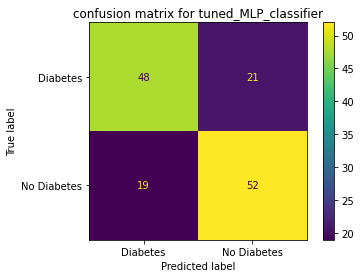

area under curve for tuned_MLP_classifier is 0.7140232700551132


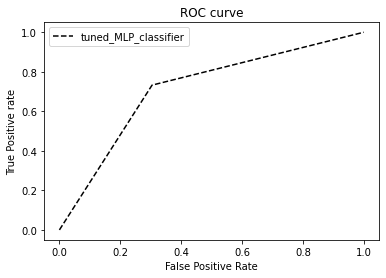

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        69
           1       0.71      0.73      0.72        71

    accuracy                           0.71       140
   macro avg       0.71      0.71      0.71       140
weighted avg       0.71      0.71      0.71       140



'precision score 0.7123287671232876  recall score 0.7323943661971831'

In [64]:
tuned_mlp_clf_analysis.visualise_confusion_matrix()
tuned_mlp_clf_analysis.reciever_operator_curve()
tuned_mlp_clf_analysis.metrics()

SAMPLE LAYERS OF TUNED MLP CLASSIFIER USING UNSCALED DATA


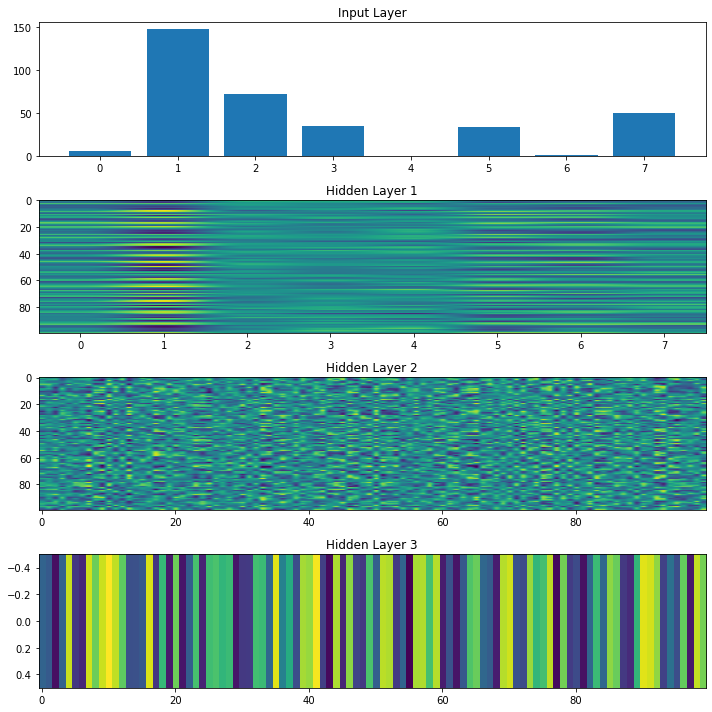

In [66]:
print('\033[1m' + 'SAMPLE LAYERS OF TUNED MLP CLASSIFIER USING UNSCALED DATA' + '\033[0m')
weights = tuned_mlp_clf.coefs_
biases = tuned_mlp_clf.intercepts_
fig, axs = plt.subplots(nrows=len(weights) + 1, figsize=(10, 10))

# Visualize input layer
axs[0].bar(range(X.shape[1]), X.values[0])
axs[0].set_title('Input Layer')

# Visualize weights and biases for hidden layers
for i, (w, b) in enumerate(zip(weights, biases)):
    axs[i + 1].imshow(w.T, cmap='viridis', aspect='auto')
    axs[i + 1].set_title(f'Hidden Layer {i + 1}')

plt.tight_layout()
plt.show()

In [31]:
baseline_mlp_clf =MLPClassifier(random_state=22, verbose=True).fit(X_train, y_train)


validation_data['baseline_mlp'] = list(baseline_mlp_clf.predict(validation_data.loc[:, 'pregnancies': 'age']))
validation_data['tuned_mlp'] = list(tuned_mlp_clf.predict(validation_data.loc[:, 'pregnancies': 'age']))

validation_data

Iteration 1, loss = 5.74244858
Iteration 2, loss = 2.85075710
Iteration 3, loss = 2.79518461
Iteration 4, loss = 2.23014846
Iteration 5, loss = 1.33238199
Iteration 6, loss = 1.65700554
Iteration 7, loss = 1.58043256
Iteration 8, loss = 1.28652564
Iteration 9, loss = 1.30554561
Iteration 10, loss = 1.14444056
Iteration 11, loss = 1.02197069
Iteration 12, loss = 1.04030114
Iteration 13, loss = 0.97146936
Iteration 14, loss = 0.95768101
Iteration 15, loss = 0.87447834
Iteration 16, loss = 0.84652017
Iteration 17, loss = 0.82494264
Iteration 18, loss = 0.79677878
Iteration 19, loss = 0.76996020
Iteration 20, loss = 0.76129823
Iteration 21, loss = 0.74825012
Iteration 22, loss = 0.73742843
Iteration 23, loss = 0.72378759
Iteration 24, loss = 0.70875951
Iteration 25, loss = 0.70101966
Iteration 26, loss = 0.69309031
Iteration 27, loss = 0.69156707
Iteration 28, loss = 0.67834507
Iteration 29, loss = 0.67567636
Iteration 30, loss = 0.67099217
Iteration 31, loss = 0.66027623
Iteration 32, los

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,baseline_rfc,tuned_rfc,baseline_mlp,tuned_mlp
0,1,144,82,40,0,41.300000,0.607000,28,0,1,1,1,1
1,1,0,74,20,23,27.700000,0.299000,21,0,0,0,0,1
2,0,94,70,27,115,43.500000,0.347000,21,0,0,0,0,0
3,1,111,86,19,0,30.100000,0.143000,23,0,0,0,0,0
4,2,83,66,23,50,32.200000,0.497000,22,0,0,0,0,0
5,2,84,50,23,76,30.400000,0.968000,21,0,0,0,0,0
6,1,140,74,26,180,24.100000,0.828000,23,0,0,0,1,1
7,4,123,80,15,176,32.000000,0.443000,34,0,1,1,0,0
8,8,74,70,40,49,35.300000,0.705000,39,0,0,0,0,0
9,11,141,80,41,325,38.824555,0.509329,55,1,1,1,1,1


In [32]:
validation_data.loc[:, ['outcome', 'baseline_mlp', 'tuned_mlp']]

,outcome,baseline_mlp,tuned_mlp
0,0,1,1
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,1,1
7,0,0,0
8,0,0,0
9,1,1,1


As you can see there is a minor improvement of the model. However, there is potential scope to improve the model. This is through further engineering of the dataset. Neural networks are highly sensitive to outliers, therefore we can scale the data using RobustScaler, which limits the impact of the outliers which could impove the performance of the model

## training a base MLPclassifier with scaled data<a id='scaled_mlp_clf'></a>

In [6]:
# scaling the data
scaler = RobustScaler()
df = df.loc[:, 'pregnancies':]
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=list(df.columns))
scaled_df['outcome'] = scaled_df['outcome'].replace(0.5, 1)
scaled_df['outcome'] = scaled_df['outcome'].replace(-0.5, 0)
scaled_df

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,0.6,0.571429,0.0000,0.357143,-0.544180,-0.011683,0.429583,1.3125,1.0
1,-0.4,-0.714286,-0.3750,-0.071429,-0.544180,-0.829496,-0.253788,0.1250,0.0
2,-0.4,-0.632653,-0.3750,-0.500000,-0.016830,-0.654250,-0.709369,-0.5000,0.0
3,-0.6,0.346939,-2.0000,0.357143,0.398317,1.098206,4.542193,0.2500,1.0
4,0.0,-0.857143,-1.3750,0.142857,-0.050491,-0.315442,-0.508815,-0.1875,1.0
...,...,...,...,...,...,...,...,...,...
695,-0.6,1.224490,-0.0625,1.428571,-0.510519,1.922378,4.175688,-0.2500,1.0
696,-0.2,1.265306,0.3750,0.714286,1.049088,0.546544,0.661357,-0.1875,1.0
697,1.4,1.040816,-0.8125,0.142857,-0.544180,0.103520,-0.299545,0.3125,1.0
698,1.0,-0.183673,0.5625,0.142857,0.437588,0.057005,-0.452138,0.3750,1.0


In [45]:
X = scaled_df.loc[:, 'pregnancies': 'age']
y = scaled_df.loc[:, 'outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Users\sskr2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


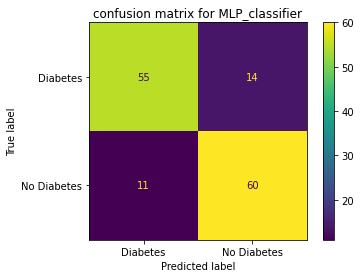

area under curve for MLP_classifier is 0.8210859359052868


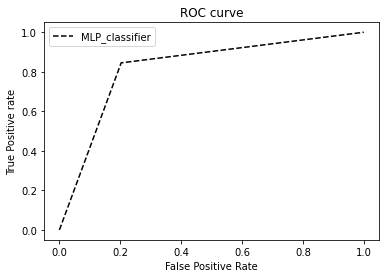

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81        69
         1.0       0.81      0.85      0.83        71

    accuracy                           0.82       140
   macro avg       0.82      0.82      0.82       140
weighted avg       0.82      0.82      0.82       140



'precision score 0.8108108108108109  recall score 0.8450704225352113'

In [11]:
mlp_clf = MLPClassifier(random_state=22)


mlp_clf_analysis = ClassificationAnalysis(X_test, y_test, mlp_clf.fit(X_train, y_train), 
                       'MLP_classifier')

mlp_clf_analysis.visualise_confusion_matrix()
mlp_clf_analysis.reciever_operator_curve()
mlp_clf_analysis.metrics()

### training a hyper-parameter tuned MLPclassifier with scaled data<a id='scaled_tuned_mlp_clf'></a>

using optimal parameters suggested by GridSearchcv for the unscaled data.

Iteration 1, loss = 0.70010747
Iteration 2, loss = 0.69584501
Iteration 3, loss = 0.69598278
Iteration 4, loss = 0.69350597
Iteration 5, loss = 0.69153534
Iteration 6, loss = 0.69030021
Iteration 7, loss = 0.68775758
Iteration 8, loss = 0.68711878
Iteration 9, loss = 0.68572934
Iteration 10, loss = 0.68322787
Iteration 11, loss = 0.68176126
Iteration 12, loss = 0.67908080
Iteration 13, loss = 0.67635174
Iteration 14, loss = 0.67338161
Iteration 15, loss = 0.67043365
Iteration 16, loss = 0.66650101
Iteration 17, loss = 0.66254972
Iteration 18, loss = 0.65984305
Iteration 19, loss = 0.65342317
Iteration 20, loss = 0.64881953
Iteration 21, loss = 0.64392557
Iteration 22, loss = 0.63748066
Iteration 23, loss = 0.63196454
Iteration 24, loss = 0.62518718
Iteration 25, loss = 0.61915472
Iteration 26, loss = 0.61203860
Iteration 27, loss = 0.60573328
Iteration 28, loss = 0.59809967
Iteration 29, loss = 0.59107965
Iteration 30, loss = 0.58478111
Iteration 31, loss = 0.57851374
Iteration 32, los

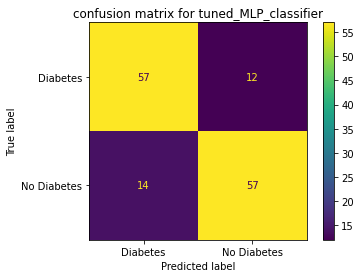

area under curve for tuned_MLP_classifier is 0.814451928965095


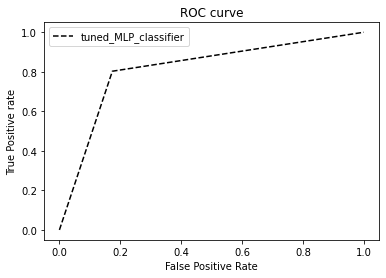

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81        69
         1.0       0.83      0.80      0.81        71

    accuracy                           0.81       140
   macro avg       0.81      0.81      0.81       140
weighted avg       0.81      0.81      0.81       140



'precision score 0.8260869565217391  recall score 0.8028169014084507'

In [12]:
## tuning the model with  the scaled data
tuned_mlp_clf=MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              random_state=22, verbose=True)

tuned_mlp_clf_analysis = ClassificationAnalysis(X_test, y_test, tuned_mlp_clf.fit(X_train, y_train), 
                       'tuned_MLP_classifier')

tuned_mlp_clf_analysis.visualise_confusion_matrix()
tuned_mlp_clf_analysis.reciever_operator_curve()
tuned_mlp_clf_analysis.metrics()


SAMPLE LAYERS OF MLP CLASSIFIER USING SCALED DATA


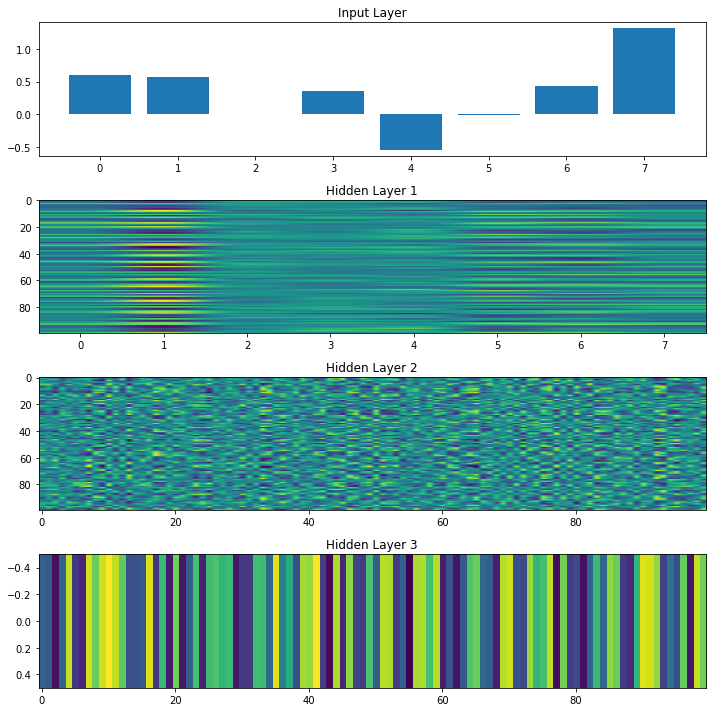

In [60]:
#carrying out layer-wise visualization to understand sample layers behind the decisions
print('\033[1m' + 'SAMPLE LAYERS OF TUNED MLP CLASSIFIER USING SCALED DATA' + '\033[0m')
weights = tuned_mlp_clf.coefs_
biases = tuned_mlp_clf.intercepts_
fig, axs = plt.subplots(nrows=len(weights) + 1, figsize=(10, 10))

# Visualize input layer
axs[0].bar(range(X.shape[1]), X.values[0])
axs[0].set_title('Input Layer')

# Visualize weights and biases for hidden layers
for i, (w, b) in enumerate(zip(weights, biases)):
    axs[i + 1].imshow(w.T, cmap='viridis', aspect='auto')
    axs[i + 1].set_title(f'Hidden Layer {i + 1}')

plt.tight_layout()
plt.show()

### observing the predicted outcomes for the validation data set for the nerual networks trained on scaled data

In [14]:
# testing the validation data on the scaled data model
scaler = RobustScaler()
scaled_validation_data = pd.DataFrame(scaler.fit_transform(validation_data), columns=list(df.columns))


scaled_validation_data['outcome'] = scaled_validation_data['outcome'].replace(0.5, 1)
scaled_validation_data['outcome'] = scaled_validation_data['outcome'].replace(-0.5, 0)
scaled_validation_data

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,-0.666667,0.233333,0.20,0.676471,-1.121951,1.061357,0.100214,0.064516,0.0
1,-0.666667,-2.966667,-0.44,-0.500000,-0.934959,-0.626884,-0.531828,-0.387097,0.0
2,-1.000000,-0.877778,-0.76,-0.088235,-0.186992,1.334455,-0.433328,-0.387097,0.0
3,-0.666667,-0.500000,0.52,-0.558824,-1.121951,-0.328959,-0.851953,-0.258065,0.0
4,-0.333333,-1.122222,-1.08,-0.323529,-0.715447,-0.068274,-0.125515,-0.322581,0.0
5,-0.333333,-1.100000,-2.36,-0.323529,-0.504065,-0.291718,0.841017,-0.387097,0.0
6,-0.666667,0.144444,-0.44,-0.147059,0.341463,-1.073771,0.553725,-0.258065,0.0
7,0.333333,-0.233333,0.04,-0.794118,0.308943,-0.093102,-0.236328,0.451613,0.0
8,1.666667,-1.322222,-0.76,0.676471,-0.723577,0.316545,0.301319,0.774194,0.0
9,2.666667,0.166667,0.04,0.735294,1.520325,0.754067,-0.100214,1.806452,1.0


In [22]:
outcomes = validation_data.loc[:, ['outcome']]
outcomes['baseline_mlp_scaled_data'] = mlp_clf.predict(scaled_validation_data.loc[:, :'age'])
outcomes['tuned_mlp_scaled_data'] = tuned_mlp_clf.predict(scaled_validation_data.loc[:, :'age'])
outcomes.loc[:, ['baseline_mlp_scaled_data', 'tuned_mlp_scaled_data']] = outcomes.loc[:, ['baseline_mlp_scaled_data', 'tuned_mlp_scaled_data']].astype(int)
outcomes

,outcome,baseline_mlp_scaled_data,tuned_mlp_scaled_data
0,0,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,1,0
9,1,1,1


In [16]:
print('scaled data standard mlp classifer',mlp_clf.predict(scaled_validation_data.loc[:, :'age']))
print('scaled data, model tuned mlp classifier',tuned_mlp_clf.predict(scaled_validation_data.loc[:, :'age']))

scaled data standard mlp classifer [1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
scaled data, model tuned mlp classifier [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.]


As you can see with the out of the box MLPClassifier, the classification rate on the validation is pretty good in the sense that there is only one FP. However it should be noted the validation set is alot smaller and may not be representative on larger datasets.

The affects of scaling can be clearly seen in the input layers of the respective neural network models:

| tuned_model **without** scaling | tuned_model **with** scaling |
| --- | ----------- |
| 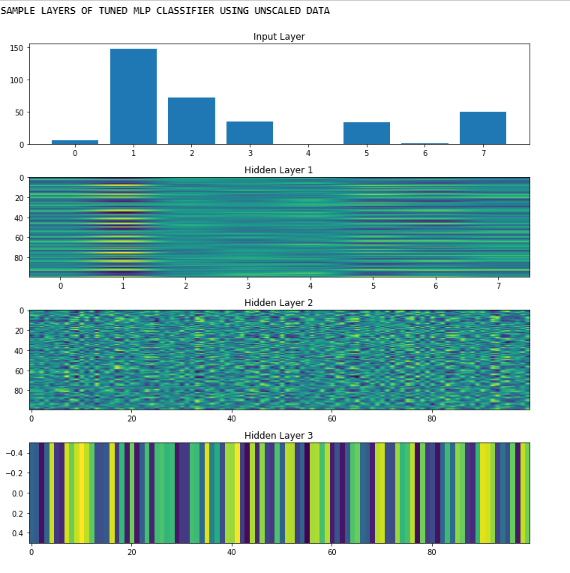 | 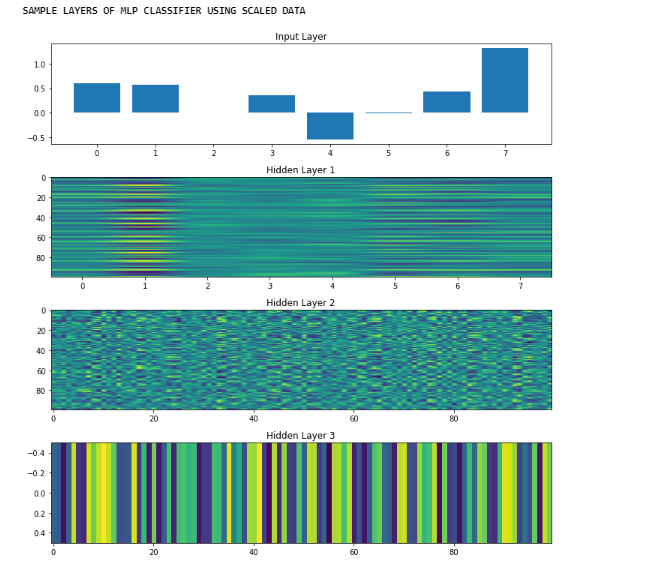 |

Where there are little difference in the hidden layers, a big difference can be seen in the input layer suggesting the scaling of the model has made the model alot more balanced since without the scaling it had a heavy weight on feature 1 which is glucose which while is a contributing factor of diabetes is not a sole indicator of an individual having diabetes.

Finally when you compare this to the baseline model without any scaling. You can see that there is alot more noise and less distinguished boundaries. This means that there is higher chance of misclassification

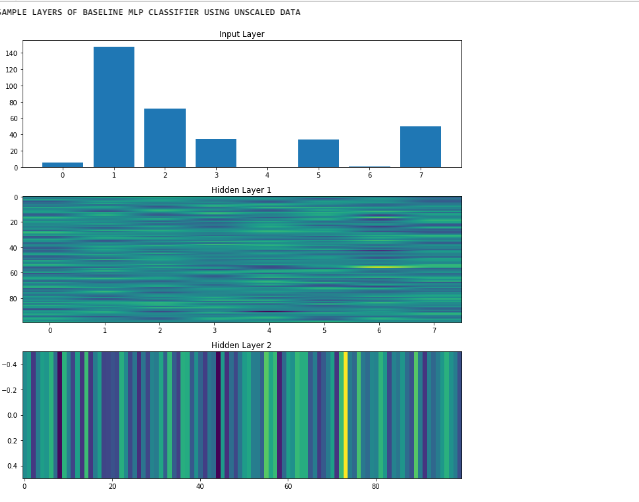